In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/class40.zip", "r") as zip_ref:
    zip_ref.extractall("./")

# ADAm Batch size 16

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                        

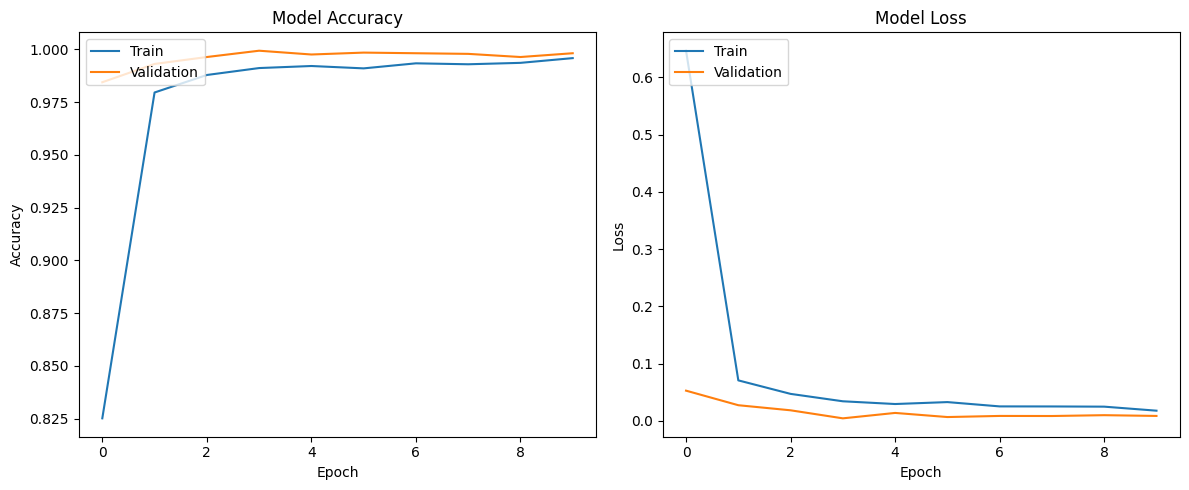

Test Loss: 0.012955978512763977
Test Accuracy: 0.9976296424865723
225/225 [==============================] - 0s 2ms/step


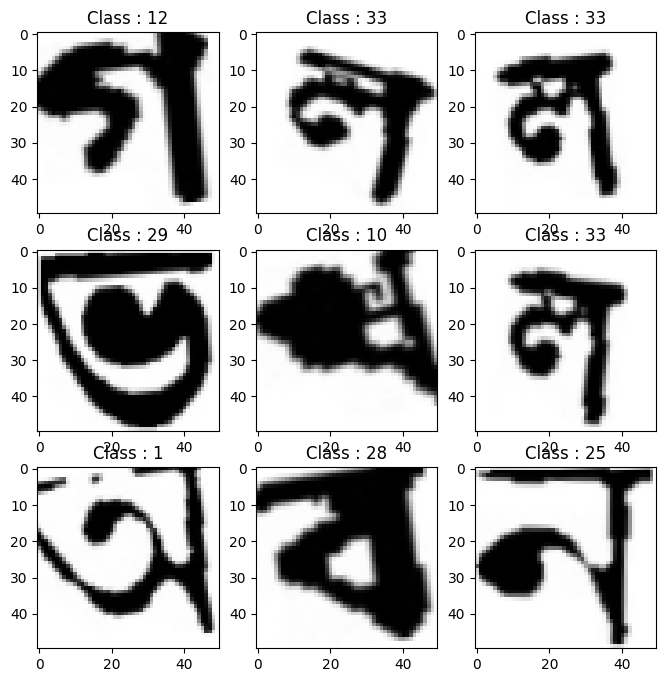

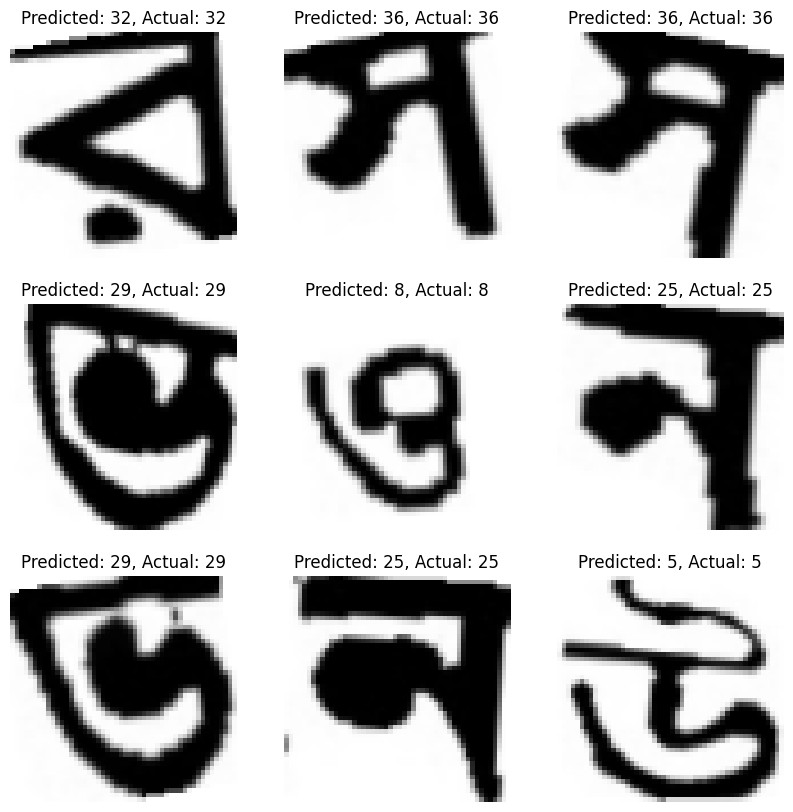

F1 Score: 0.9972890467198801


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns


dataset_dir = '/content/class40'


images = []
labels = []


for class_folder in os.listdir(dataset_dir):

    label = int(class_folder)


    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):

        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (50, 50))

        image = image.astype('float32') / 255.0

        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Reshape the data for compatibility with CNN
x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

# One-hot encode the labels
num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

batch_size = 16
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)


F1 Score: 0.9972890467198801


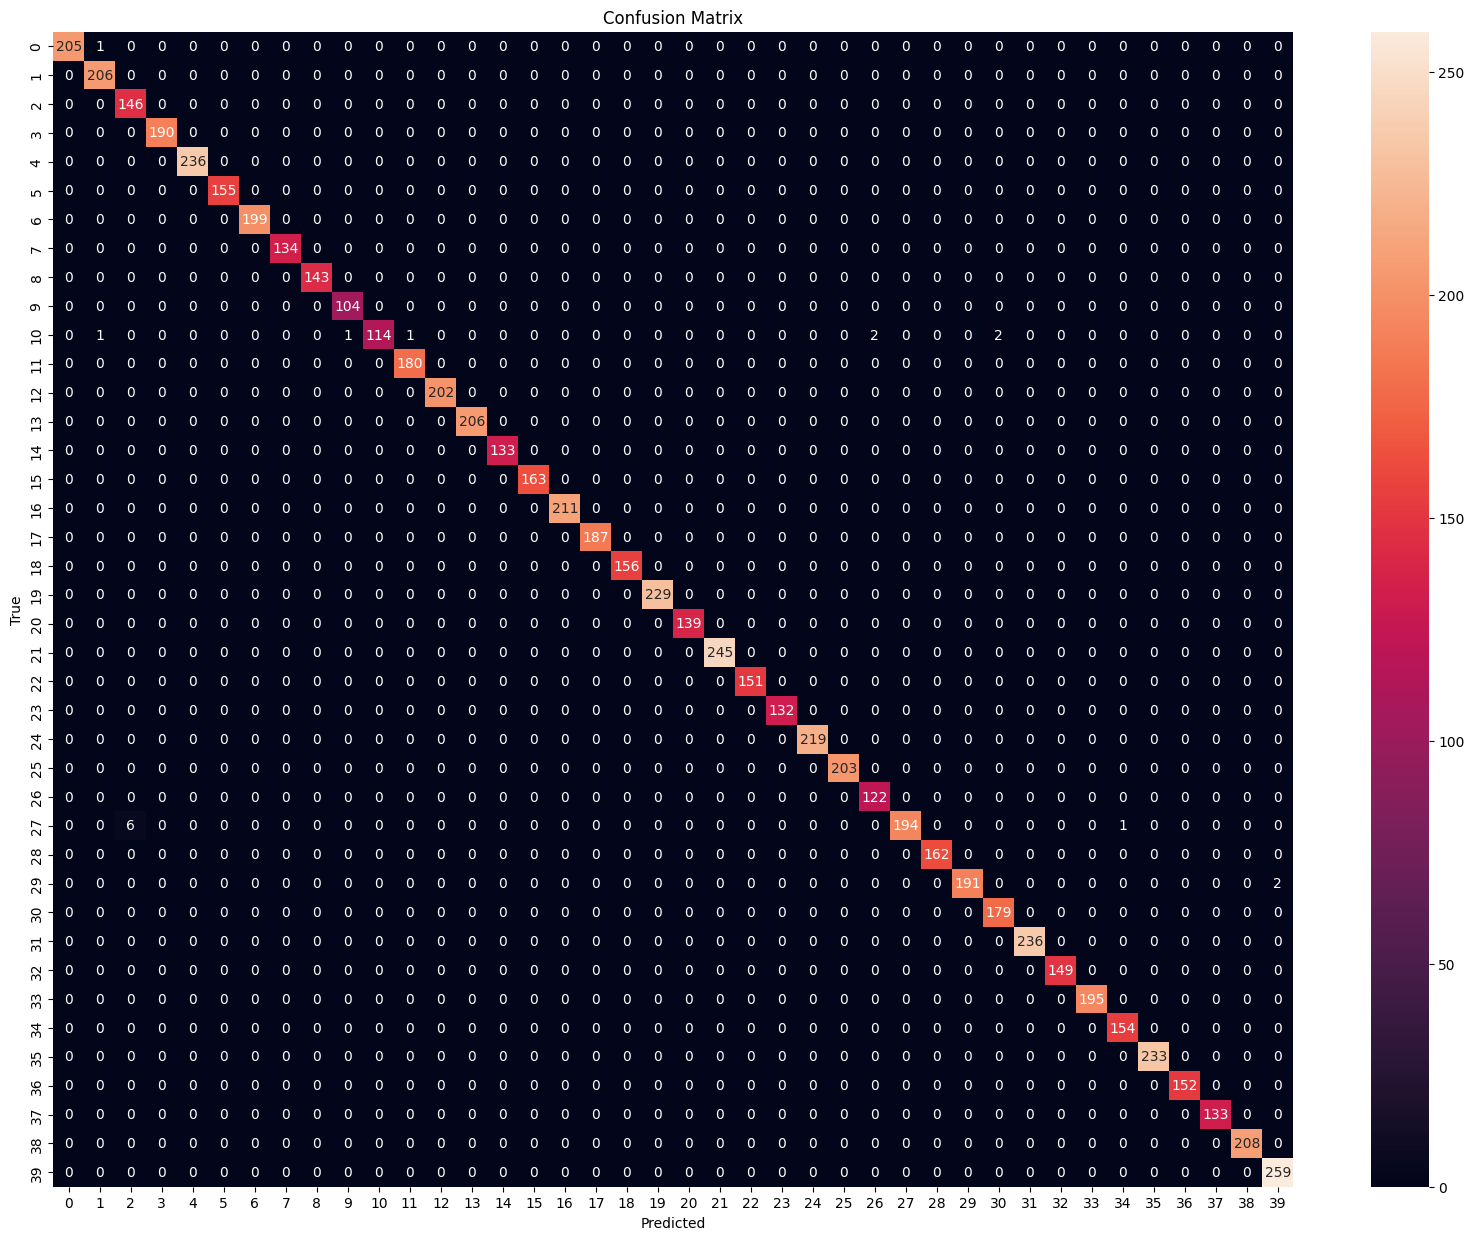

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       206
           2       0.99      1.00      1.00       206
           3       0.96      1.00      0.98       146
           4       1.00      1.00      1.00       190
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       155
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       134
           9       1.00      1.00      1.00       143
          10       0.99      1.00      1.00       104
          11       1.00      0.94      0.97       121
          12       0.99      1.00      1.00       180
          13       1.00      1.00      1.00       202
          14       1.00      1.00      1.00       206
          15       1.00      1.00      1.00       133
          16       1.00      1.00      1.00       163
          17       1.00      1.00      1.00       211
    

In [ ]:

f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)


plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


report = classification_report(y_test, predicted_classes)


print("Classification Report:")
print(report)

# ADAm optimizer batch size 32

Epoch 1/10
419/419 [==============================] - 23s 52ms/step - loss: 0.8873 - accuracy: 0.7646 - val_loss: 0.0373 - val_accuracy: 0.9907
Epoch 2/10
419/419 [==============================] - 21s 51ms/step - loss: 0.0793 - accuracy: 0.9776 - val_loss: 0.0095 - val_accuracy: 0.9979
Epoch 3/10
419/419 [==============================] - 20s 48ms/step - loss: 0.0422 - accuracy: 0.9882 - val_loss: 0.0061 - val_accuracy: 0.9991
Epoch 4/10
419/419 [==============================] - 20s 47ms/step - loss: 0.0380 - accuracy: 0.9904 - val_loss: 0.0058 - val_accuracy: 0.9991
Epoch 5/10
419/419 [==============================] - 20s 47ms/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: 0.0037 - val_accuracy: 0.9985
Epoch 6/10
419/419 [==============================] - 21s 50ms/step - loss: 0.0212 - accuracy: 0.9956 - val_loss: 0.0056 - val_accuracy: 0.9979
Epoch 7/10
419/419 [==============================] - 21s 50ms/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.0046 - val_accuracy:

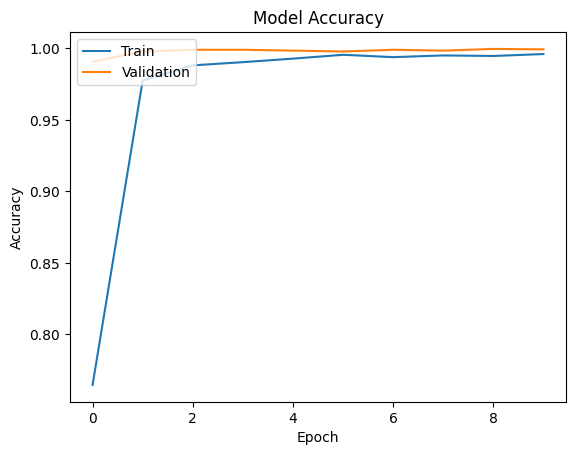

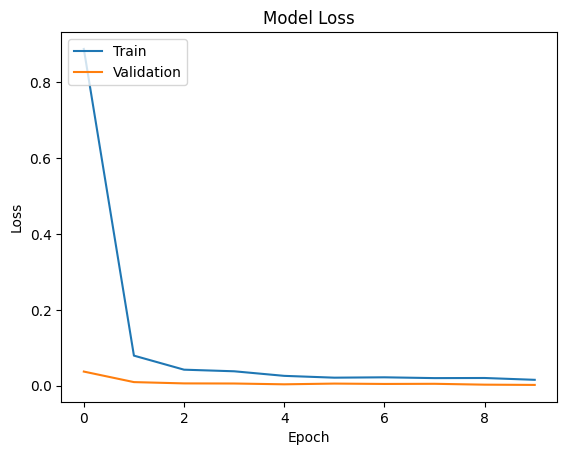

Test Loss: 0.010270641185343266
Test Accuracy: 0.9986056685447693
225/225 [==============================] - 3s 14ms/step


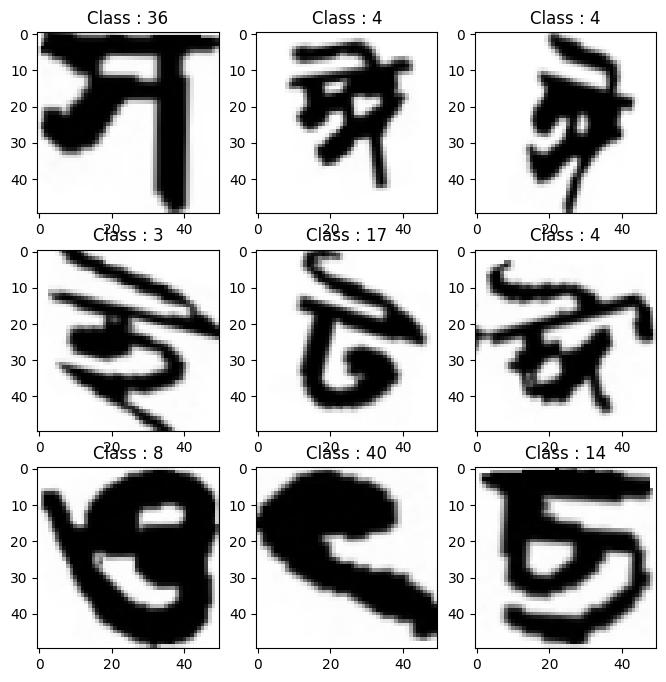

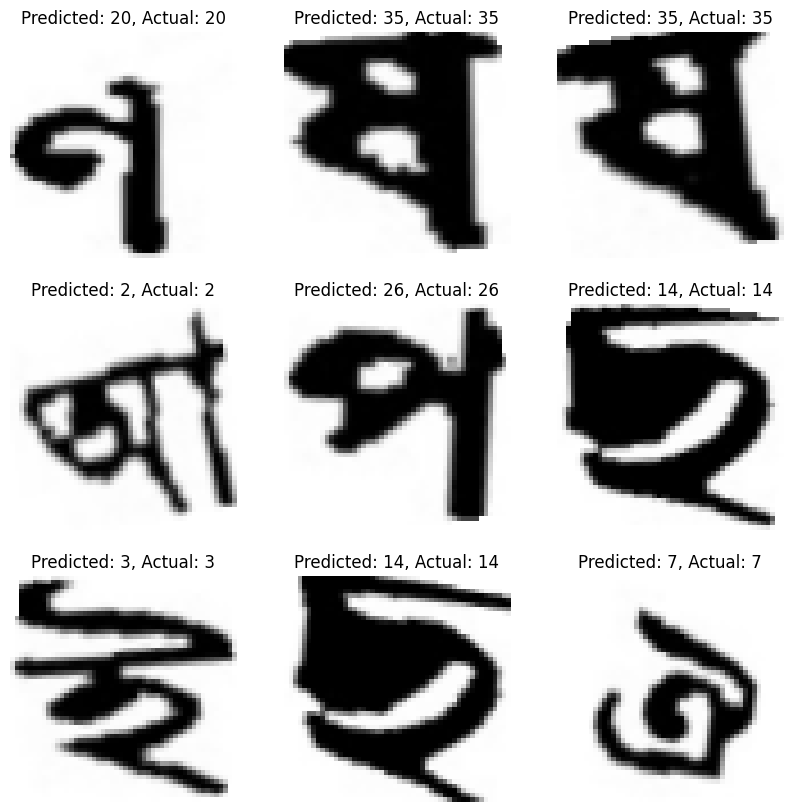

F1 Score: 0.9985627314704022


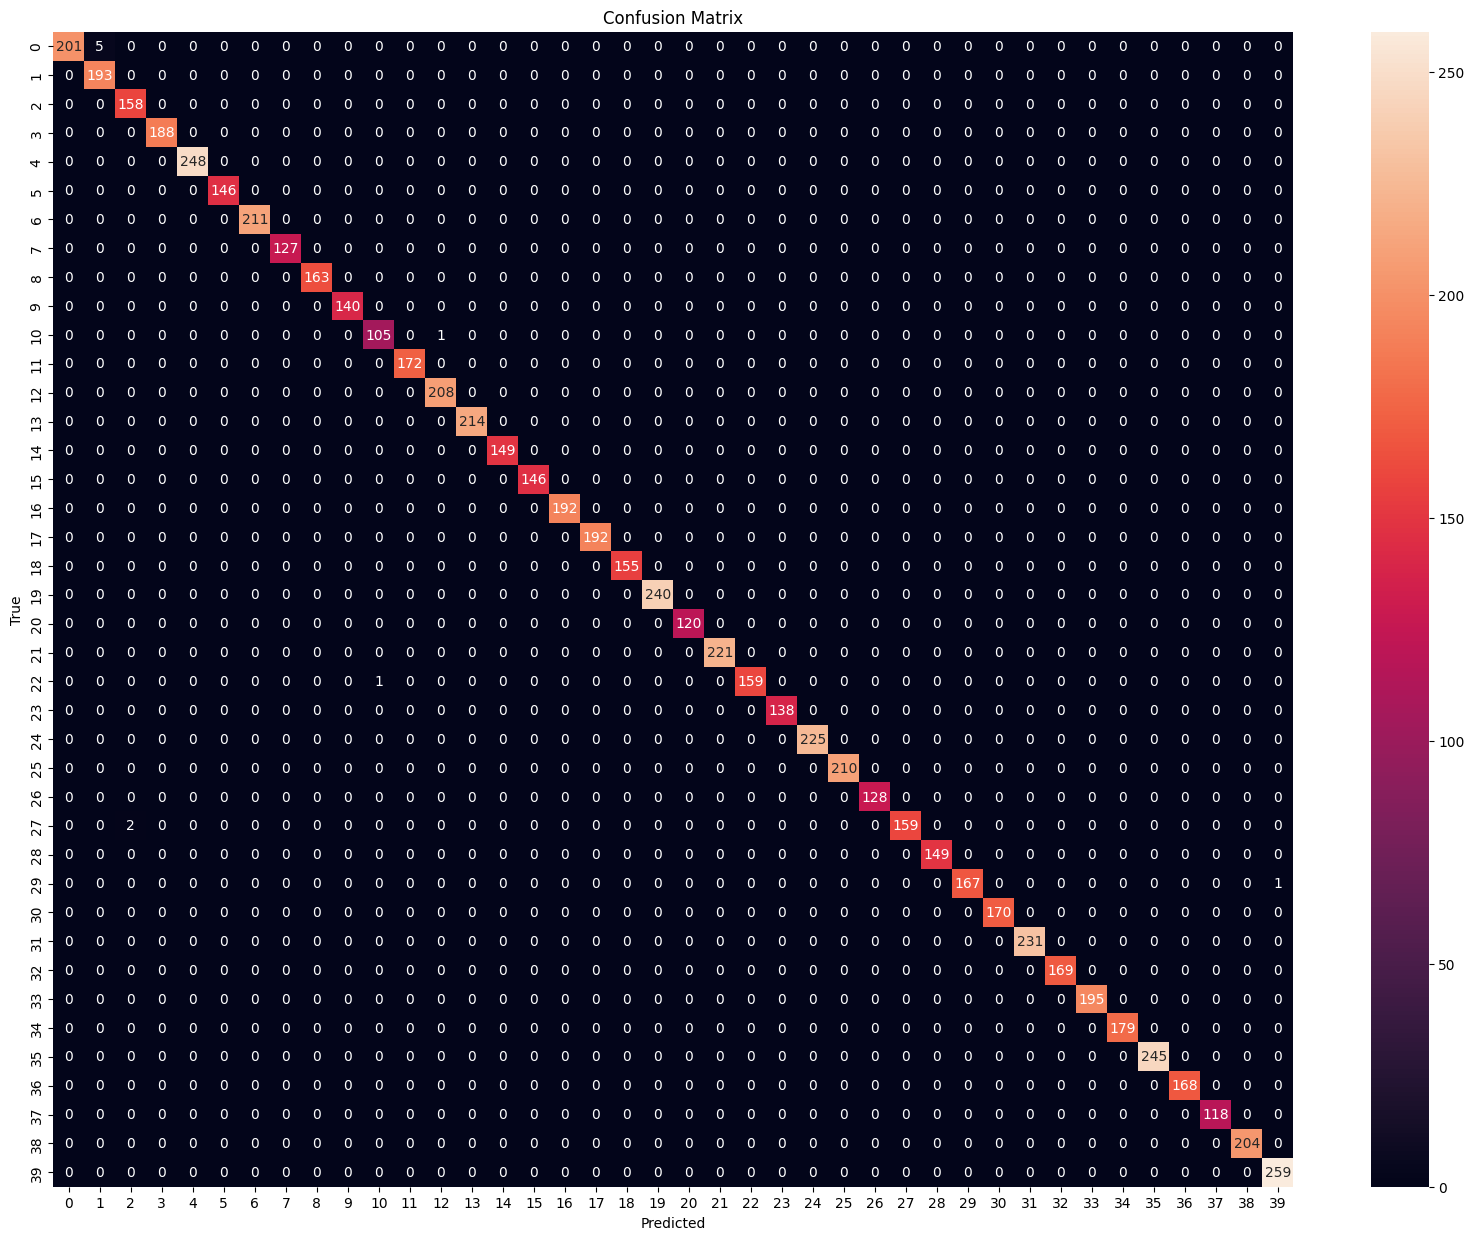

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      1.00      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       0.99      0.99      0.99       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns


dataset_dir = '/content/class40'

images = []
labels = []


for class_folder in os.listdir(dataset_dir):

    label = int(class_folder)


    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):

        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (50, 50))

        image = image.astype('float32') / 255.0

        images.append(image)
        labels.append(label)


images = np.array(images)
labels = np.array(labels)


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)


num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

batch_size = 32
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()


plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_test, predicted_classes)

print("Classification Report:")
print(report)


# adam batch 64

Epoch 1/10
210/210 [==============================] - 20s 91ms/step - loss: 1.0572 - accuracy: 0.7166 - val_loss: 0.0602 - val_accuracy: 0.9842
Epoch 2/10
210/210 [==============================] - 18s 87ms/step - loss: 0.0885 - accuracy: 0.9750 - val_loss: 0.0135 - val_accuracy: 0.9973
Epoch 3/10
210/210 [==============================] - 18s 86ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0084 - val_accuracy: 0.9973
Epoch 4/10
210/210 [==============================] - 19s 90ms/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.0049 - val_accuracy: 0.9982
Epoch 5/10
210/210 [==============================] - 19s 88ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 6/10
210/210 [==============================] - 19s 89ms/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0192 - val_accuracy: 0.9934
Epoch 7/10
210/210 [==============================] - 18s 87ms/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 0.0033 - val_accuracy:

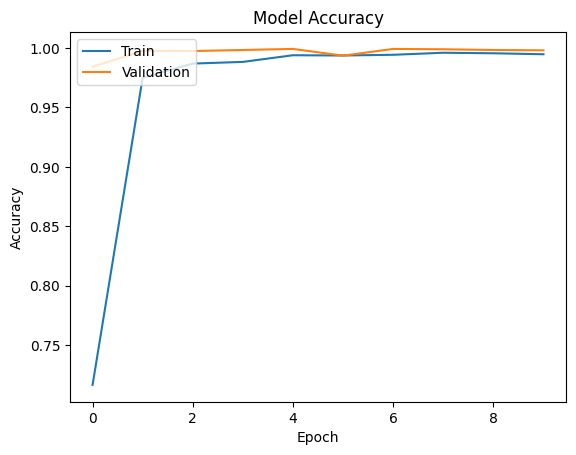

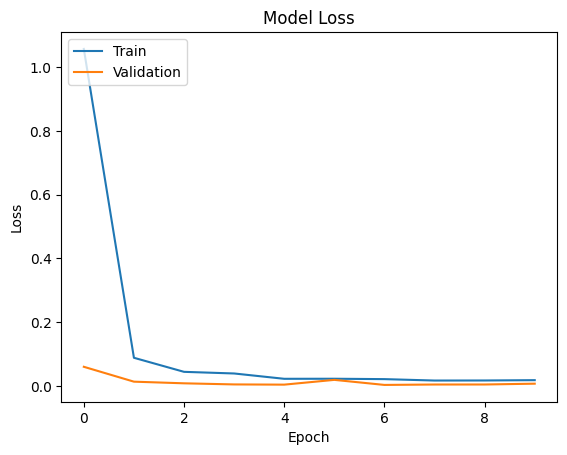

Test Loss: 0.012703385204076767
Test Accuracy: 0.9977691173553467
225/225 [==============================] - 3s 13ms/step


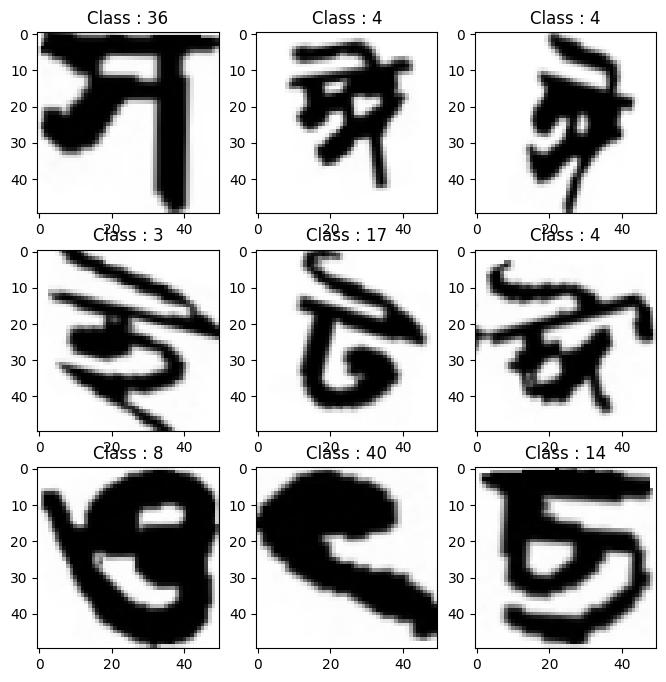

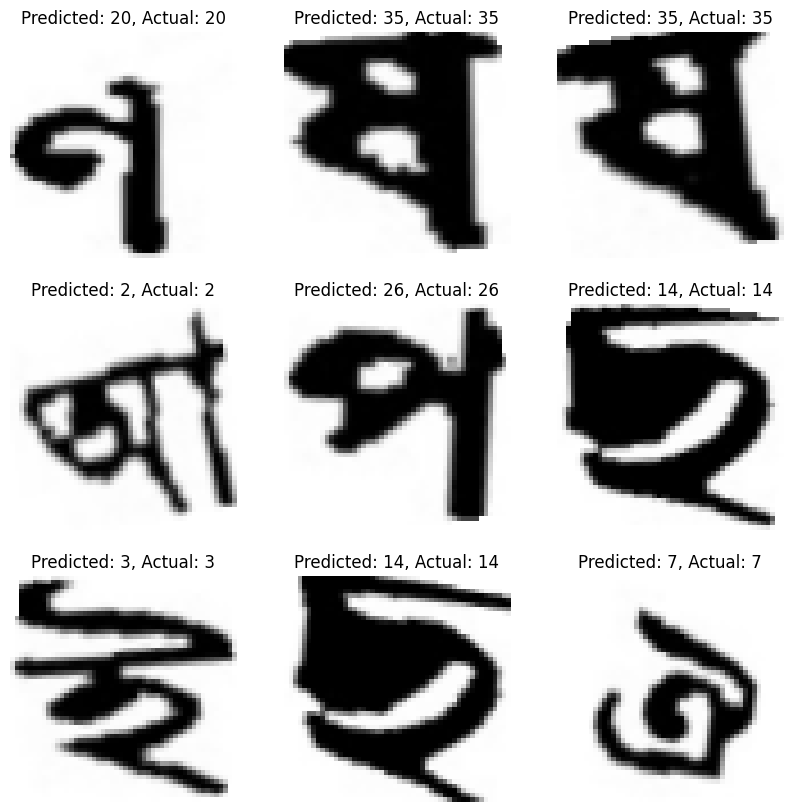

F1 Score: 0.9976412102056734


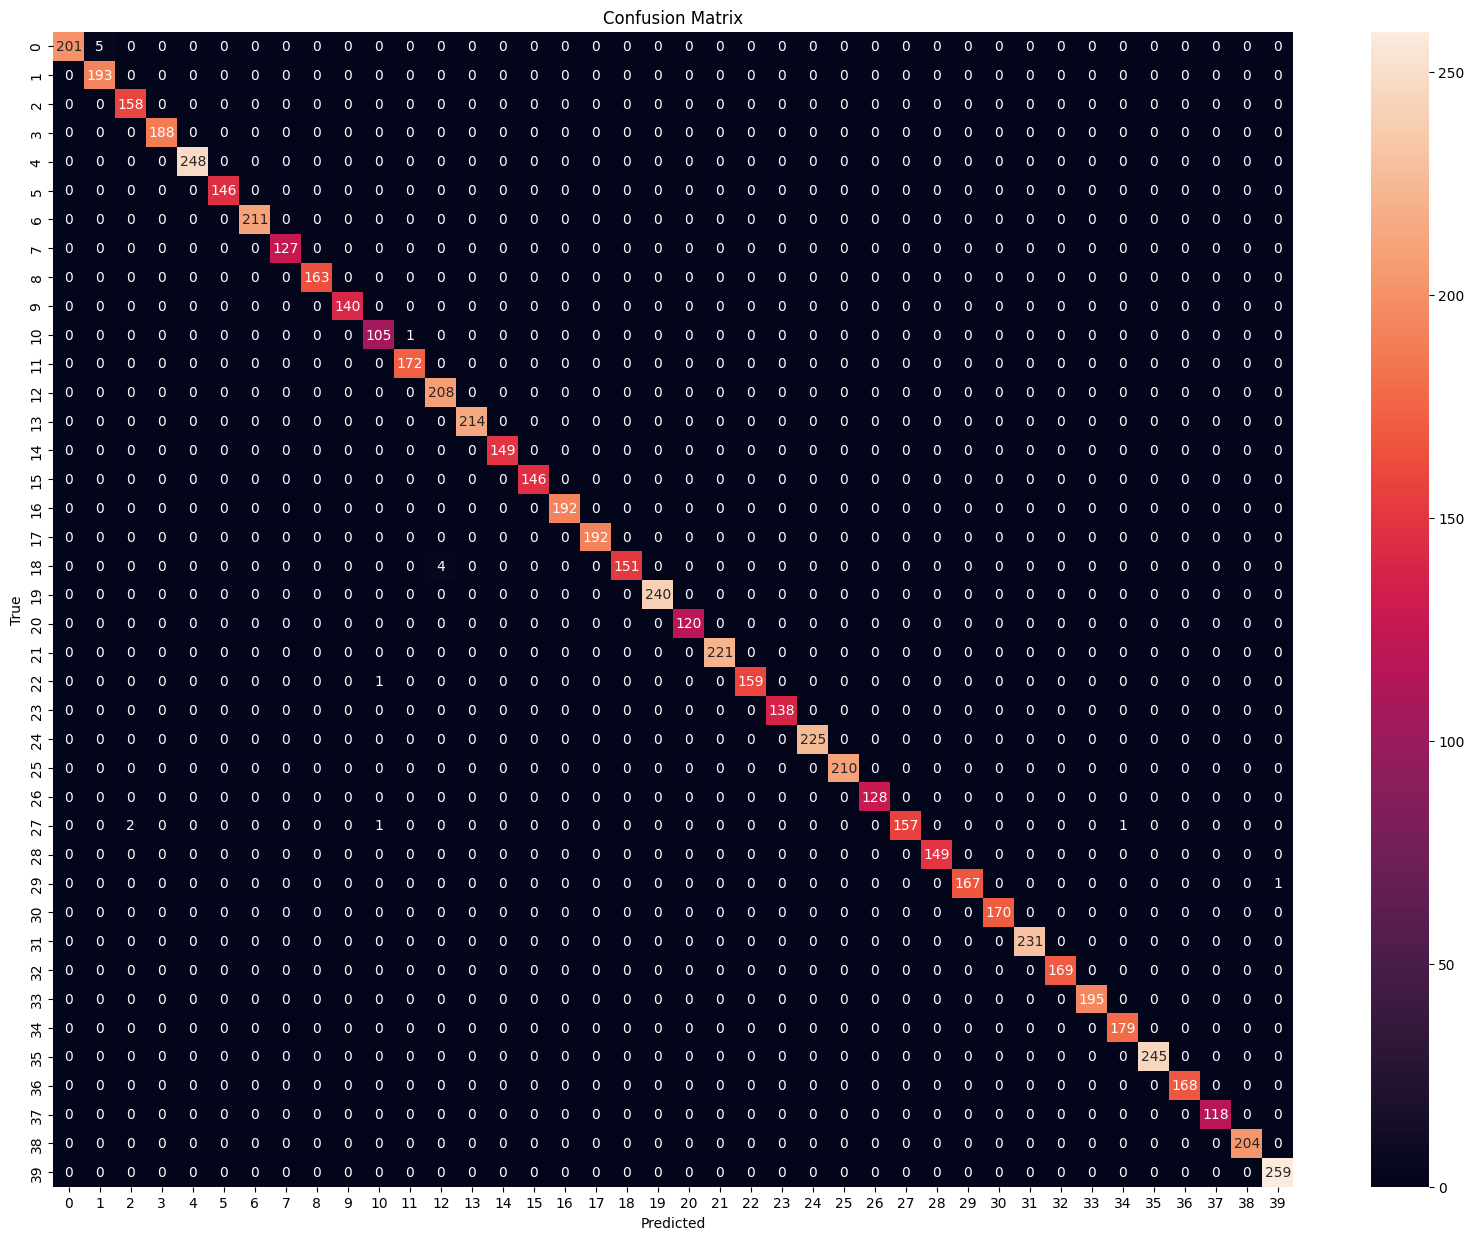

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      1.00      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       0.98      0.99      0.99       106
          12       0.99      1.00      1.00       172
          13       0.98      1.00      0.99       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns


dataset_dir = '/content/class40'


images = []
labels = []


for class_folder in os.listdir(dataset_dir):

    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):

        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (50, 50))

        image = image.astype('float32') / 255.0

        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Reshape the data for compatibility with CNN
x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

# One-hot encode the labels
num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

batch_size = 64
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# ADAM 128

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                      

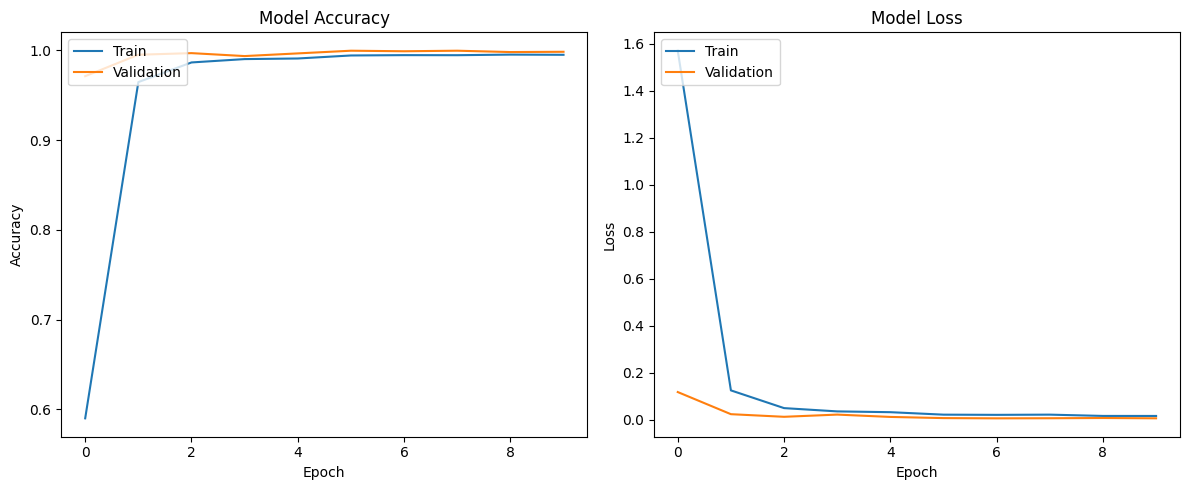

Test Loss: 0.01965104229748249
Test Accuracy: 0.9974902272224426
225/225 [==============================] - 0s 2ms/step


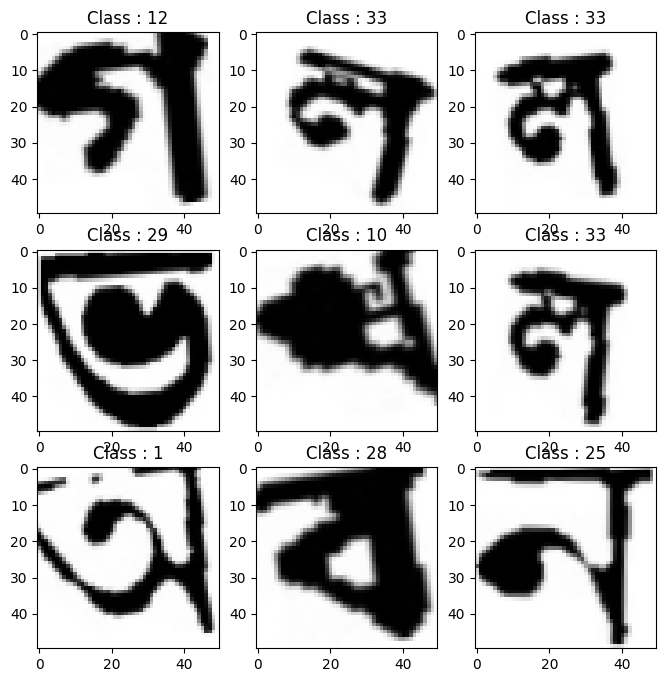

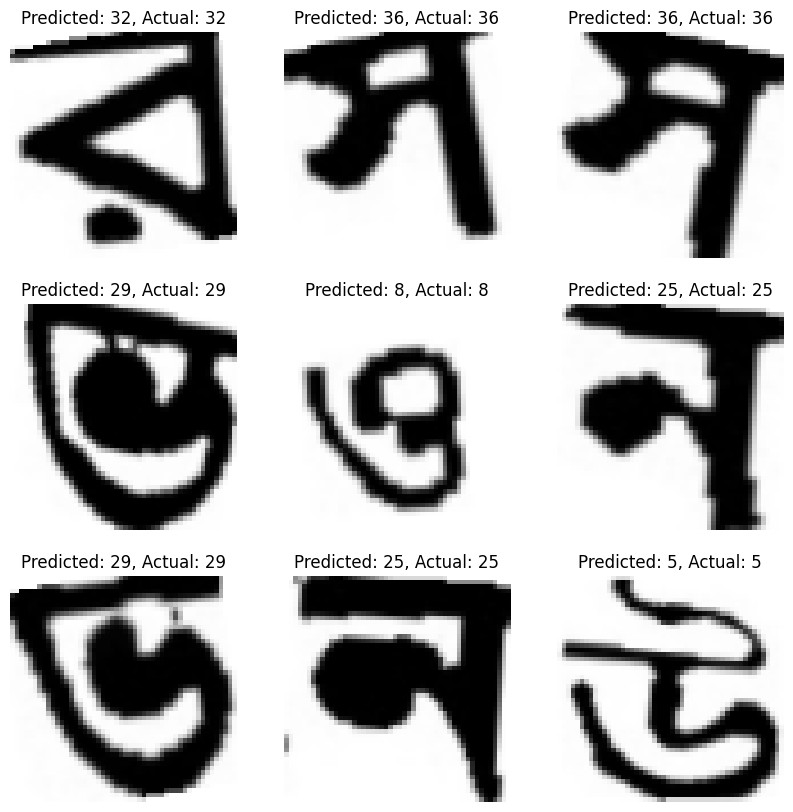

F1 Score: 0.997482158564235


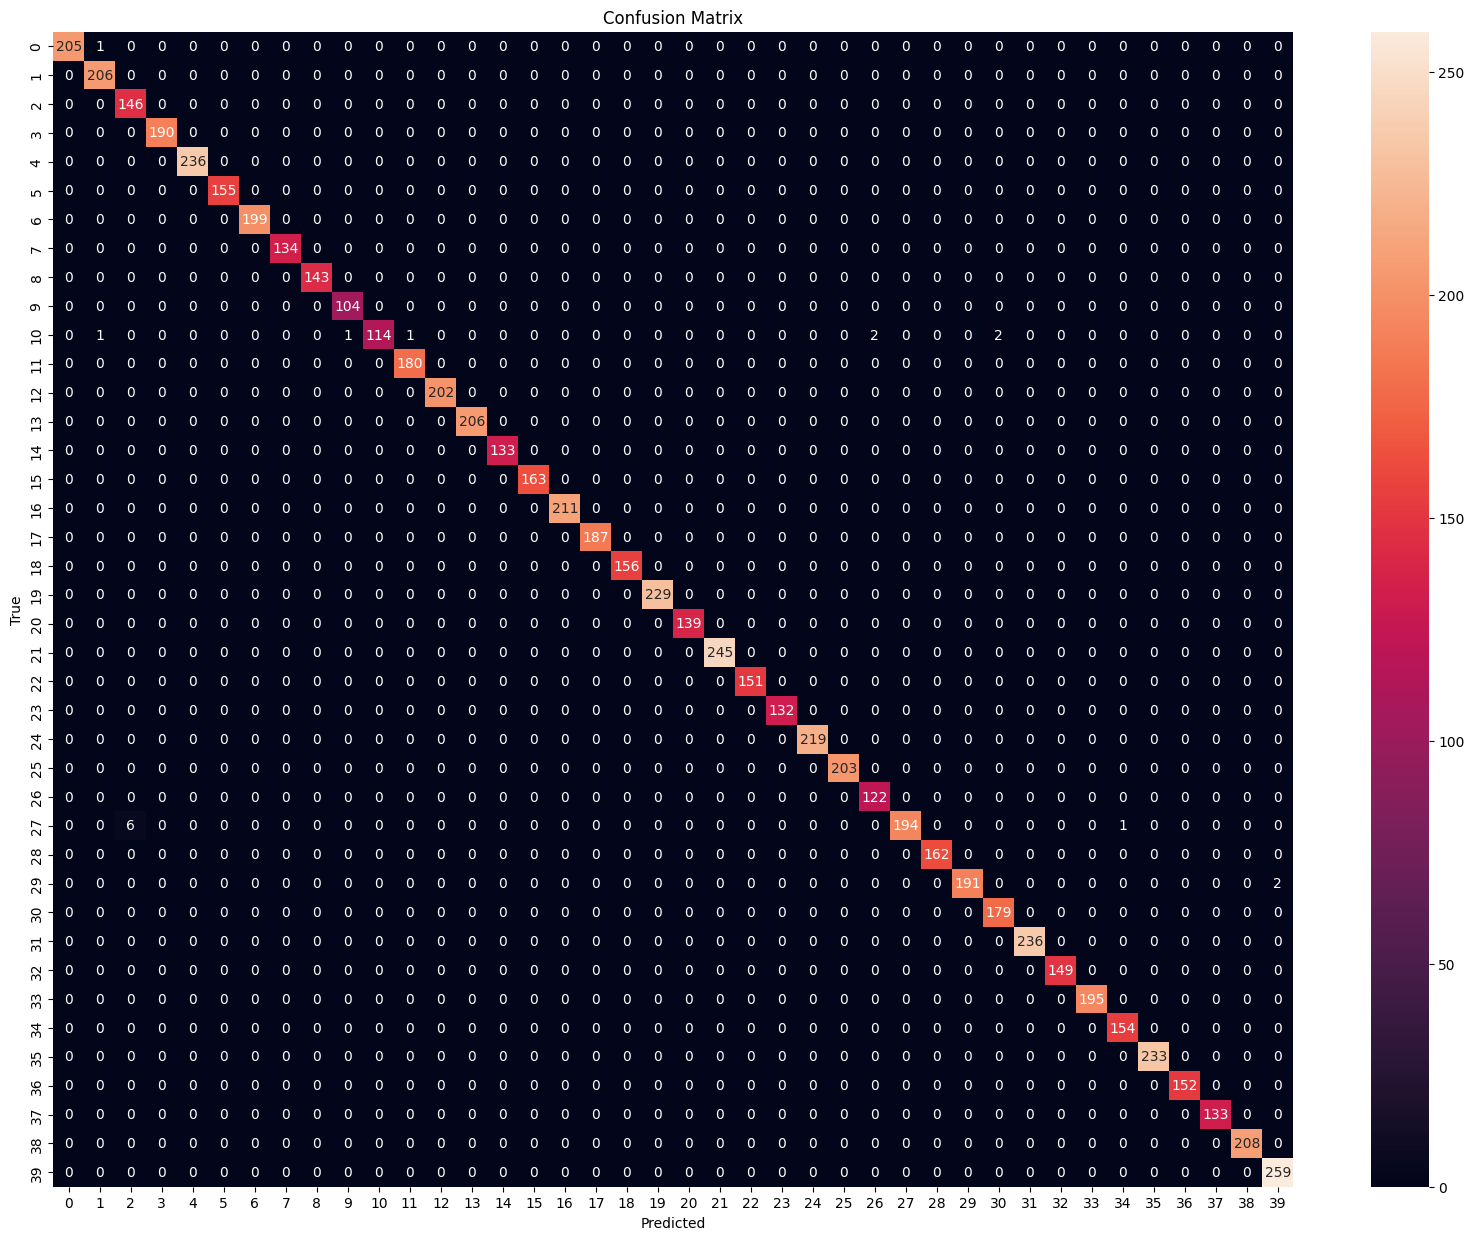

Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       206
           2       1.00      0.98      0.99       206
           3       0.96      1.00      0.98       146
           4       1.00      1.00      1.00       190
           5       1.00      1.00      1.00       236
           6       0.99      1.00      1.00       155
           7       1.00      1.00      1.00       199
           8       1.00      0.99      1.00       134
           9       0.99      1.00      1.00       143
          10       1.00      1.00      1.00       104
          11       1.00      0.98      0.99       121
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00       202
          14       1.00      1.00      1.00       206
          15       1.00      1.00      1.00       133
          16       1.00      1.00      1.00       163
          17       1.00      1.00      1.00       211
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    
    label = int(class_folder)

    
    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
      
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (50, 50))
        
        image = image.astype('float32') / 255.0
        
        images.append(image)
        labels.append(label)


images = np.array(images)
labels = np.array(labels)


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)


x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)


num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

batch_size = 128
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)

# Nadam 128

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 25, 25, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                      

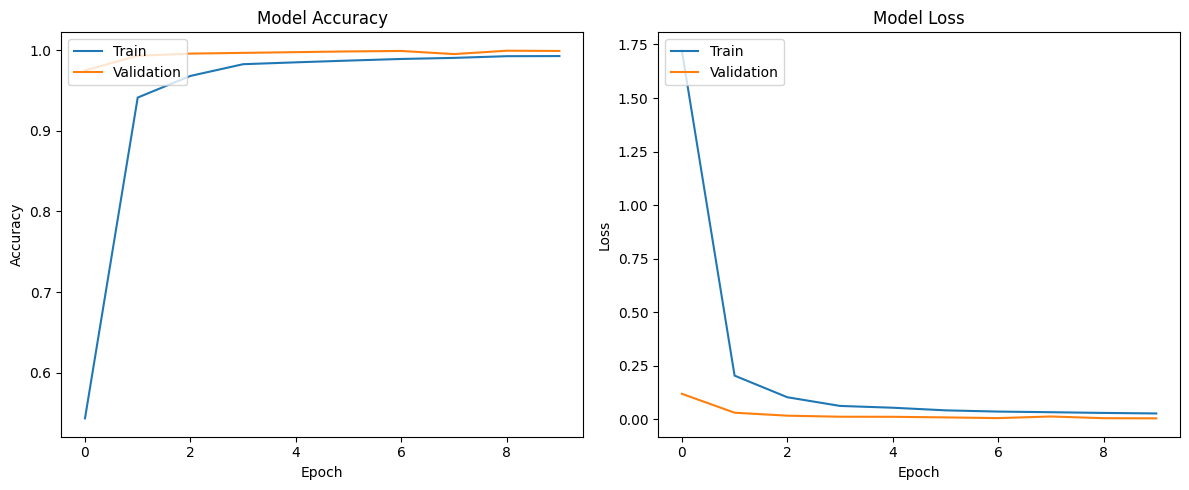

Test Loss: 0.011448035947978497
Test Accuracy: 0.9981874227523804
225/225 [==============================] - 0s 2ms/step


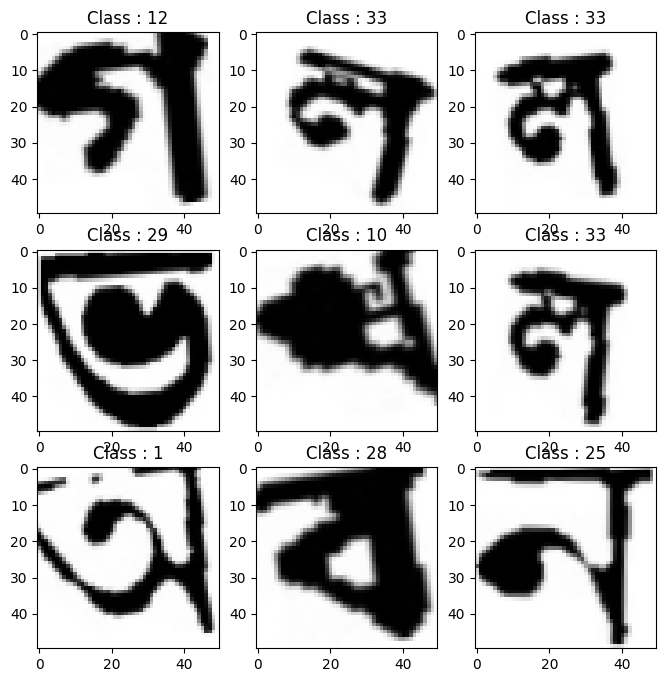

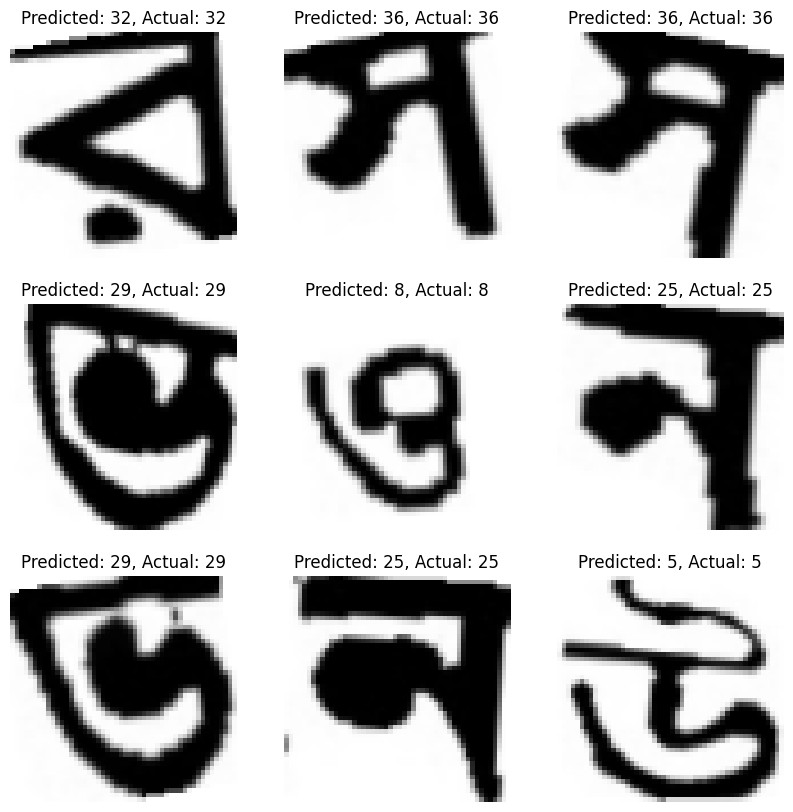

F1 Score: 0.9981404623400827


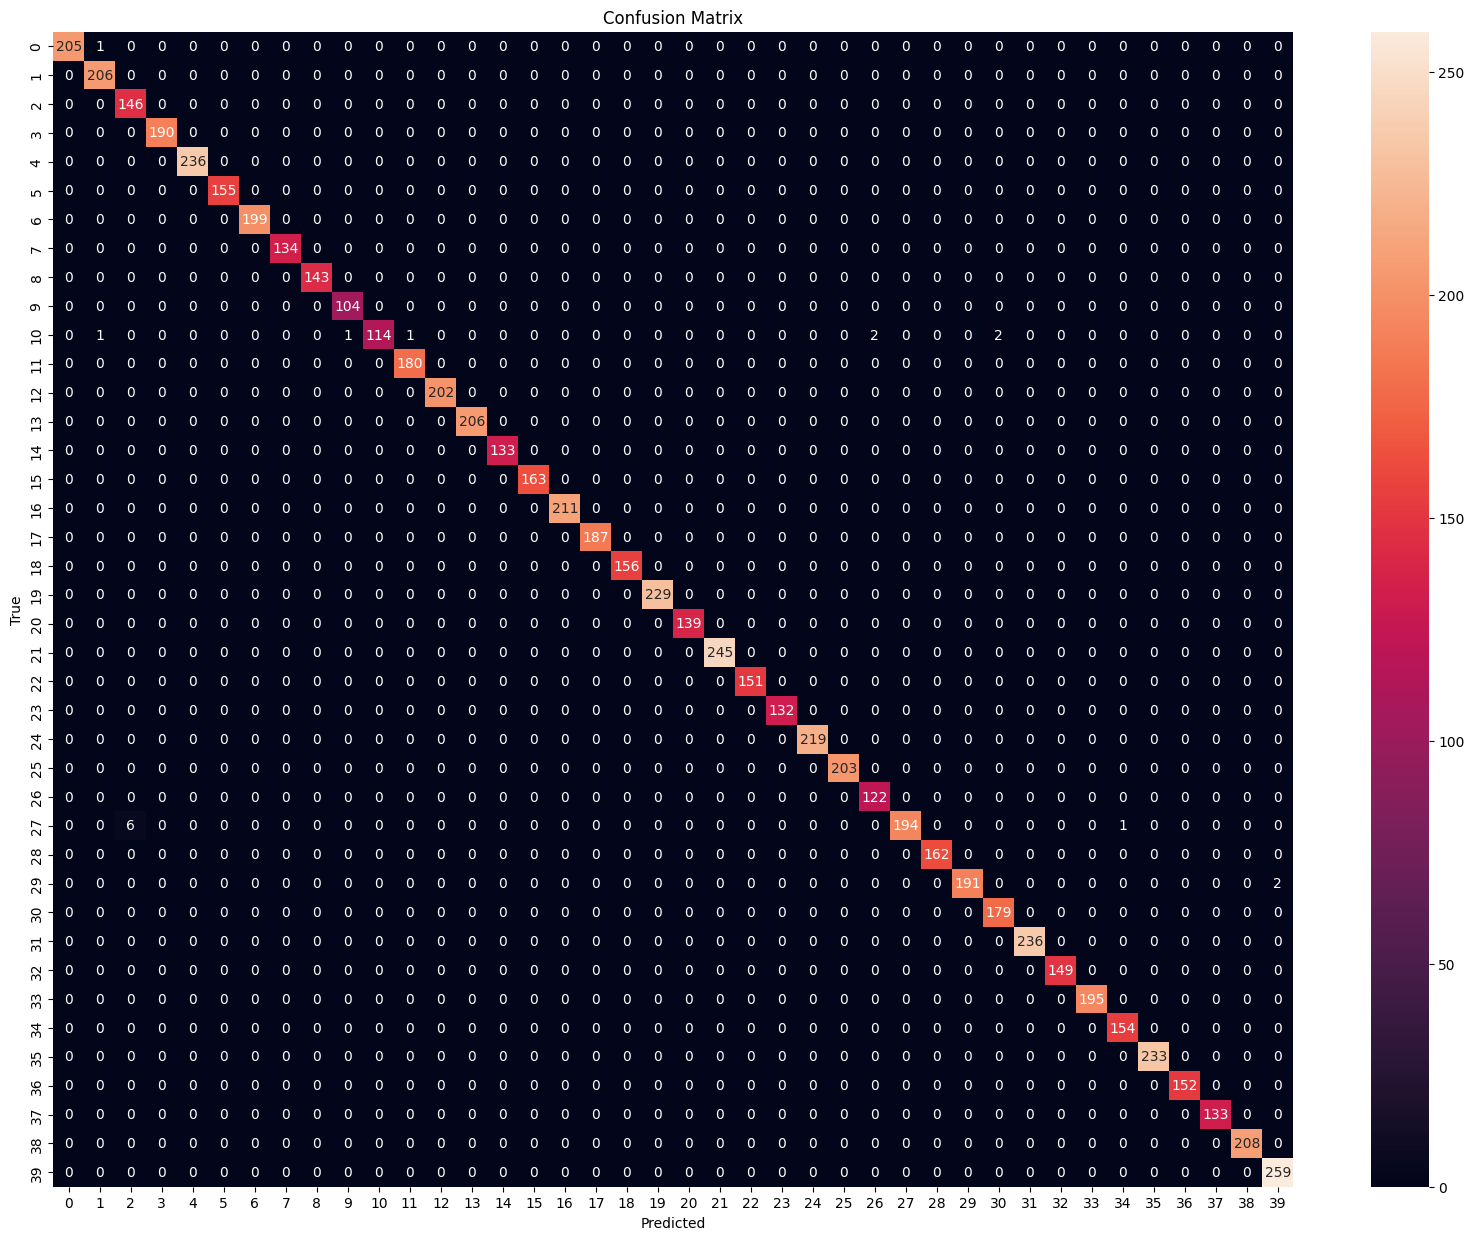

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       206
           3       0.96      1.00      0.98       146
           4       1.00      1.00      1.00       190
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       155
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       134
           9       1.00      1.00      1.00       143
          10       1.00      1.00      1.00       104
          11       1.00      0.98      0.99       121
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00       202
          14       1.00      1.00      1.00       206
          15       1.00      1.00      1.00       133
          16       1.00      1.00      1.00       163
          17       1.00      1.00      1.00       211
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns


dataset_dir = '/content/class40'


images = []
labels = []


for class_folder in os.listdir(dataset_dir):
    
    label = int(class_folder)

  
    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
    
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
    
        image = cv2.resize(image, (50, 50))
       
        image = image.astype('float32') / 255.0
      
        images.append(image)
        labels.append(label)


images = np.array(images)
labels = np.array(labels)


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)


x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

model.summary()

batch_size = 128
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_test, predicted_classes)

print("Classification Report:")
print(report)

# Nadam 64

Epoch 1/10
210/210 [==============================] - 5s 12ms/step - loss: 1.1855 - accuracy: 0.6803 - val_loss: 0.0660 - val_accuracy: 0.9866
Epoch 2/10
210/210 [==============================] - 2s 12ms/step - loss: 0.1492 - accuracy: 0.9535 - val_loss: 0.0207 - val_accuracy: 0.9952
Epoch 3/10
210/210 [==============================] - 2s 11ms/step - loss: 0.0848 - accuracy: 0.9745 - val_loss: 0.0095 - val_accuracy: 0.9982
Epoch 4/10
210/210 [==============================] - 2s 11ms/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.0090 - val_accuracy: 0.9967
Epoch 5/10
210/210 [==============================] - 2s 11ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0072 - val_accuracy: 0.9979
Epoch 6/10
210/210 [==============================] - 2s 11ms/step - loss: 0.0389 - accuracy: 0.9887 - val_loss: 0.0086 - val_accuracy: 0.9988
Epoch 7/10
210/210 [==============================] - 2s 11ms/step - loss: 0.0286 - accuracy: 0.9922 - val_loss: 0.0033 - val_accuracy: 0.9997

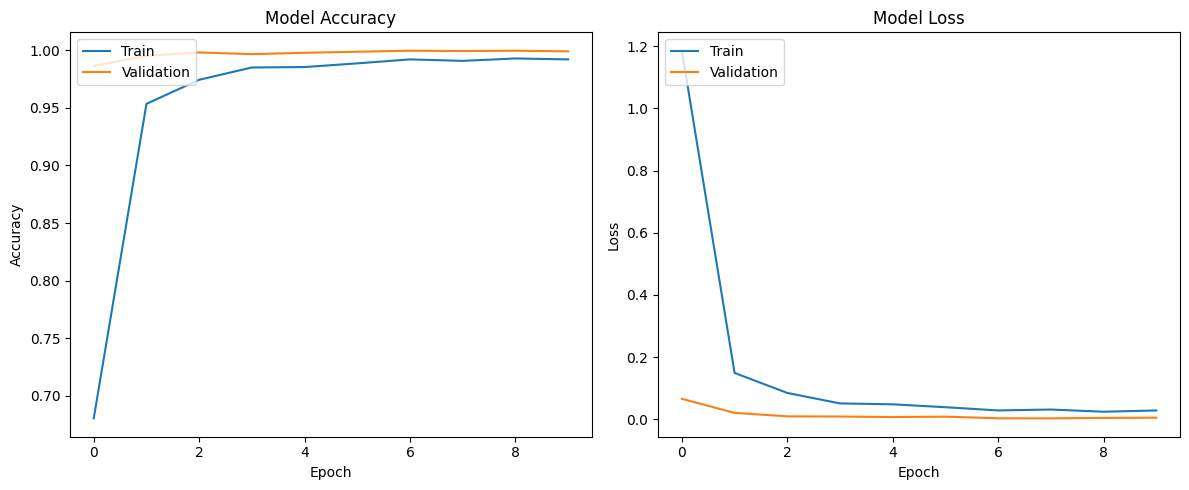

Test Loss: 0.008936784230172634
Test Accuracy: 0.9984662532806396
225/225 [==============================] - 0s 2ms/step


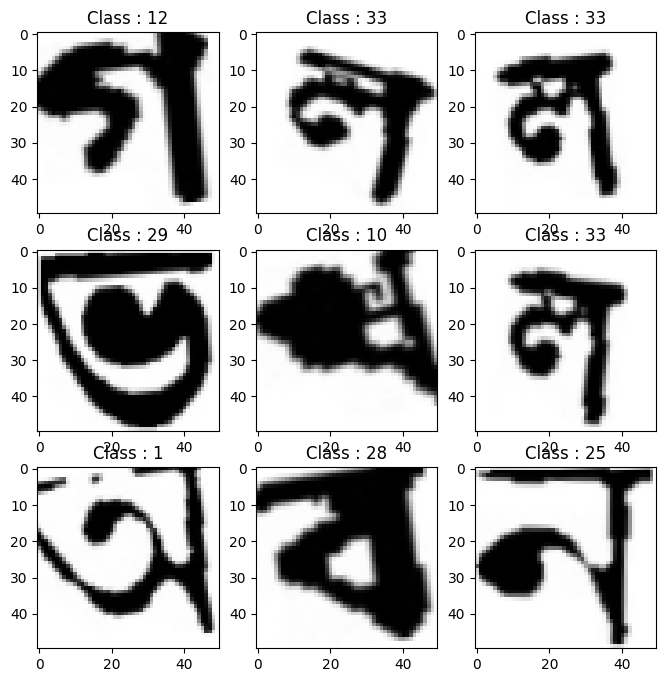

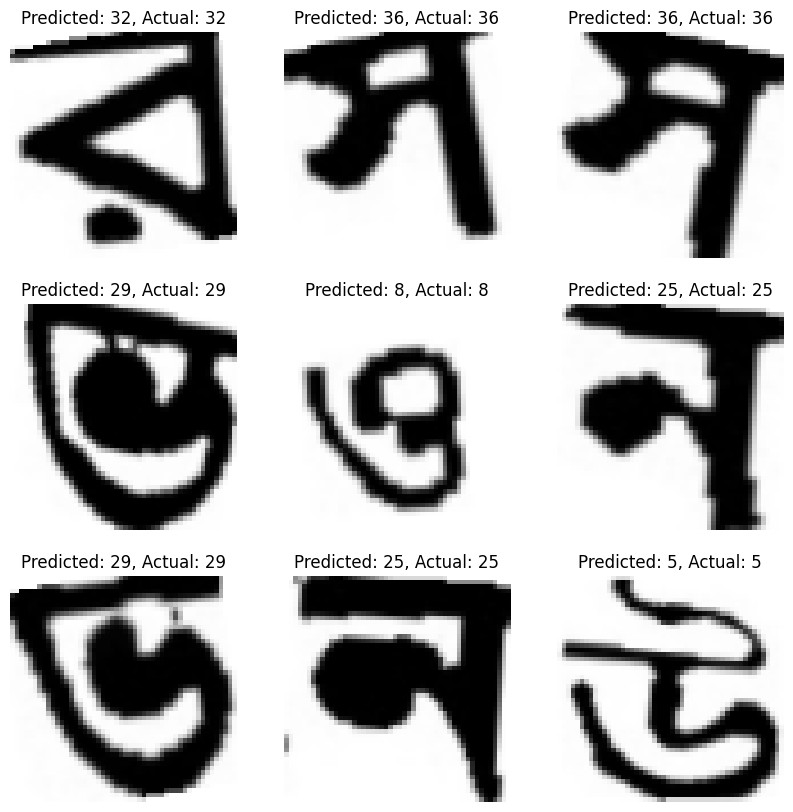

F1 Score: 0.998424878849052


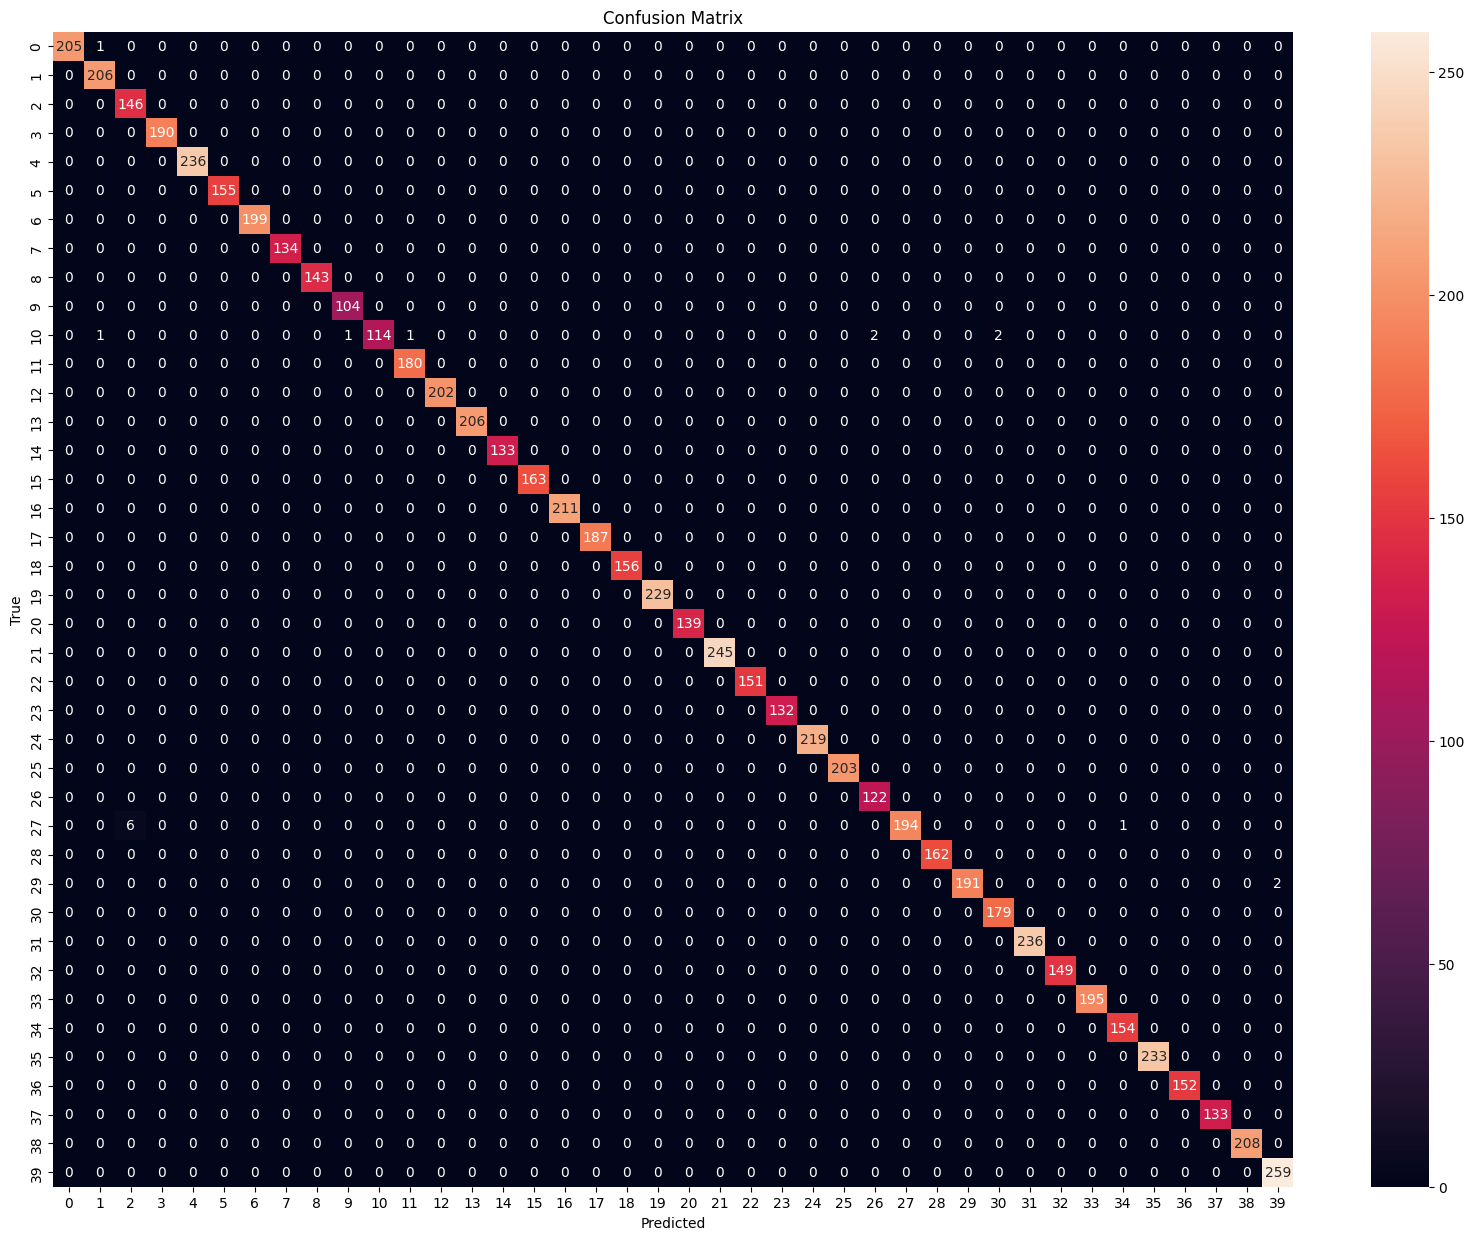

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       206
           2       1.00      1.00      1.00       206
           3       0.96      0.99      0.98       146
           4       1.00      1.00      1.00       190
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       155
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       134
           9       1.00      1.00      1.00       143
          10       1.00      1.00      1.00       104
          11       1.00      0.99      1.00       121
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00       202
          14       1.00      1.00      1.00       206
          15       0.99      1.00      1.00       133
          16       1.00      1.00      1.00       163
          17       1.00      1.00      1.00       211
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
      
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        
        image = cv2.resize(image, (50, 50))
        
        image = image.astype('float32') / 255.0
        
        images.append(image)
        labels.append(label)


images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)

# Nadam 32

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 25, 25, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 25, 25, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 25, 25, 64)        0         
                                                      

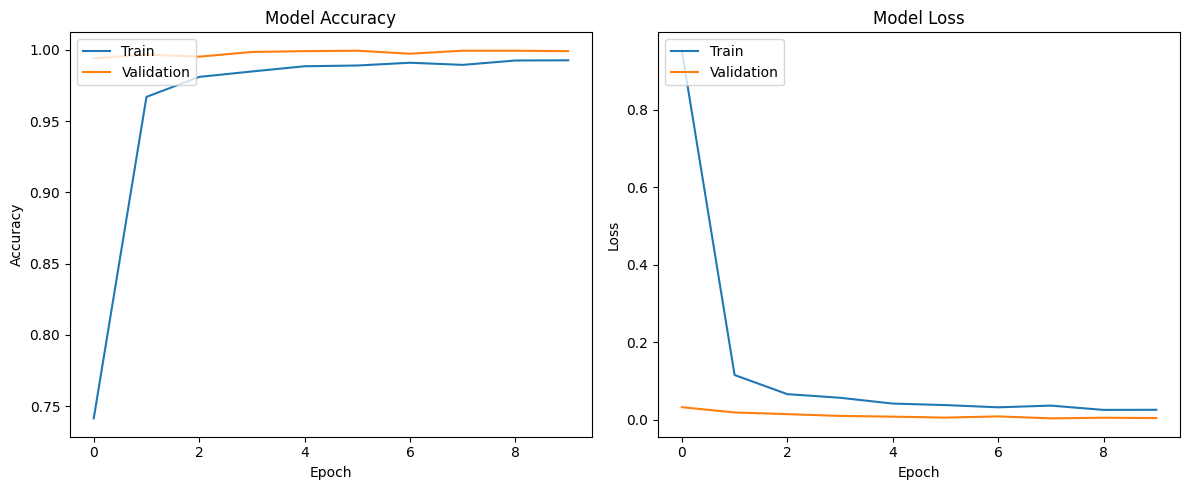

Test Loss: 0.014792445115745068
Test Accuracy: 0.99832683801651
225/225 [==============================] - 1s 2ms/step


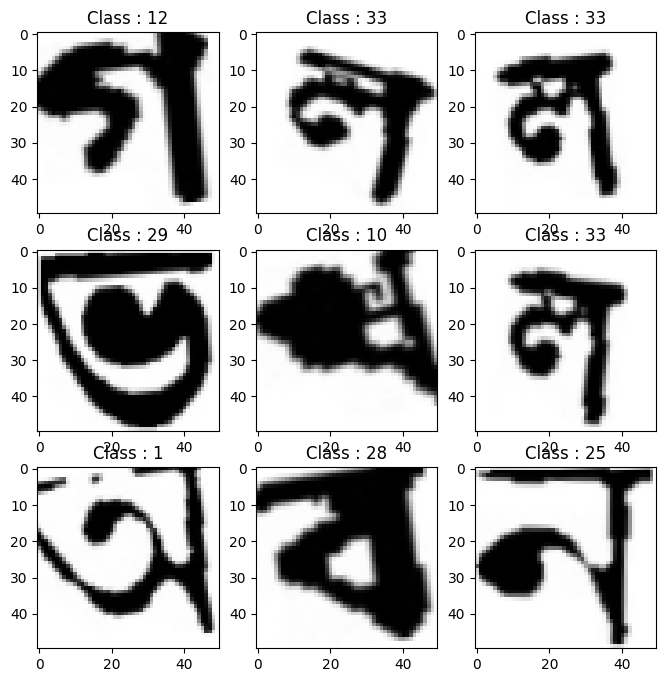

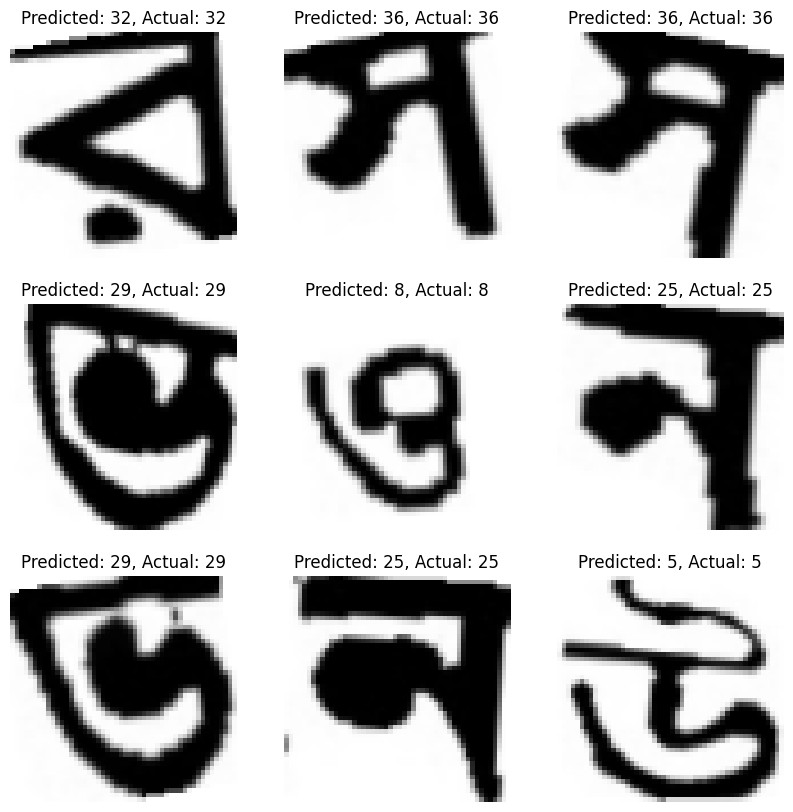

F1 Score: 0.9984060459042826


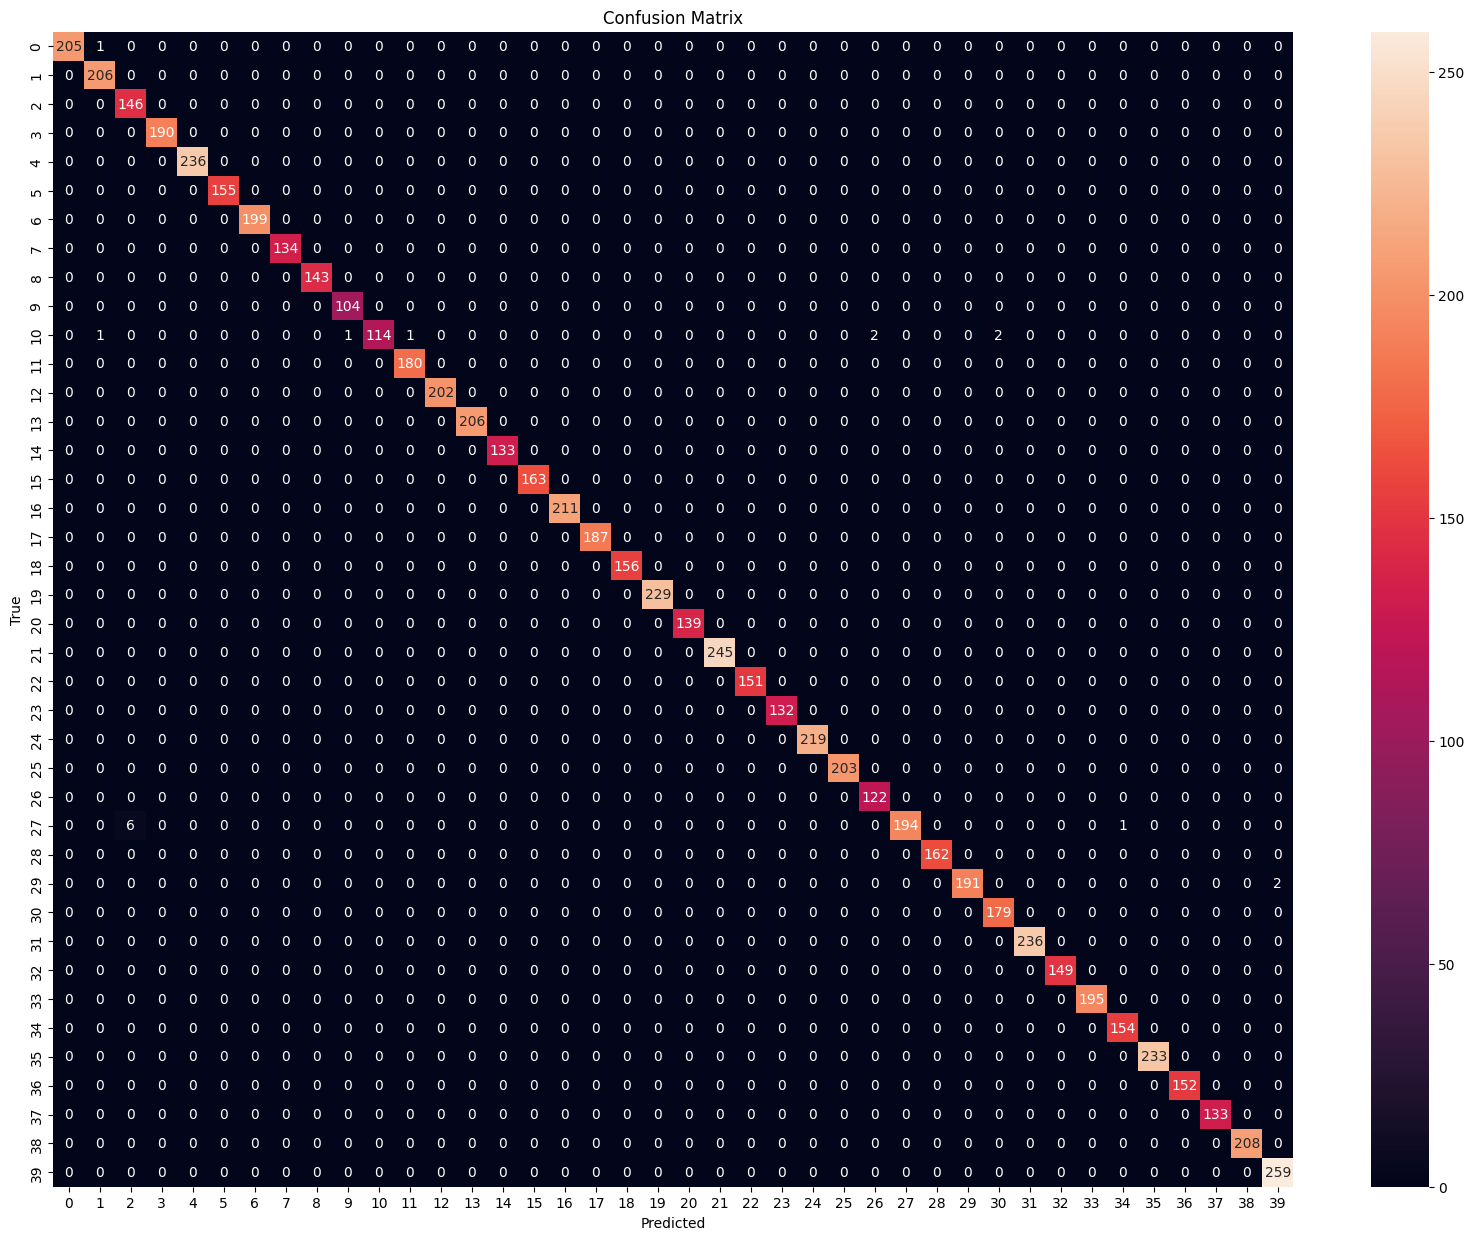

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       206
           2       1.00      0.99      0.99       206
           3       0.96      1.00      0.98       146
           4       1.00      1.00      1.00       190
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       155
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       134
           9       1.00      1.00      1.00       143
          10       1.00      1.00      1.00       104
          11       1.00      1.00      1.00       121
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00       202
          14       1.00      1.00      1.00       206
          15       1.00      1.00      1.00       133
          16       1.00      1.00      1.00       163
          17       1.00      1.00      1.00       211
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
       
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])
# Print Model Summary
model.summary()
# Train the model
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)

# Nadam 16

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 50, 50, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 25, 25, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 25, 25, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 25, 25, 64)        0         
                                                      

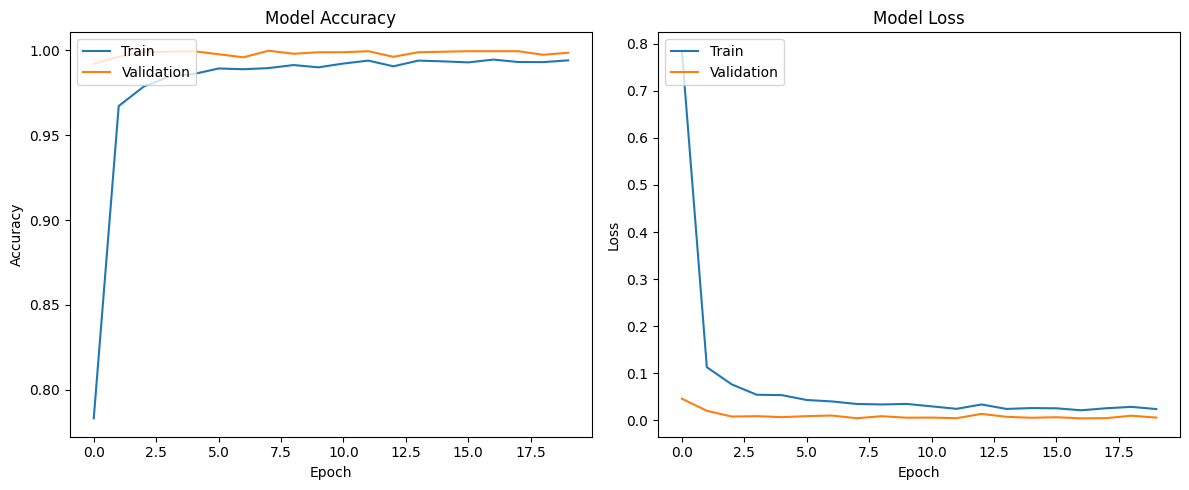

Test Loss: 0.013257704675197601
Test Accuracy: 0.99832683801651
225/225 [==============================] - 0s 2ms/step


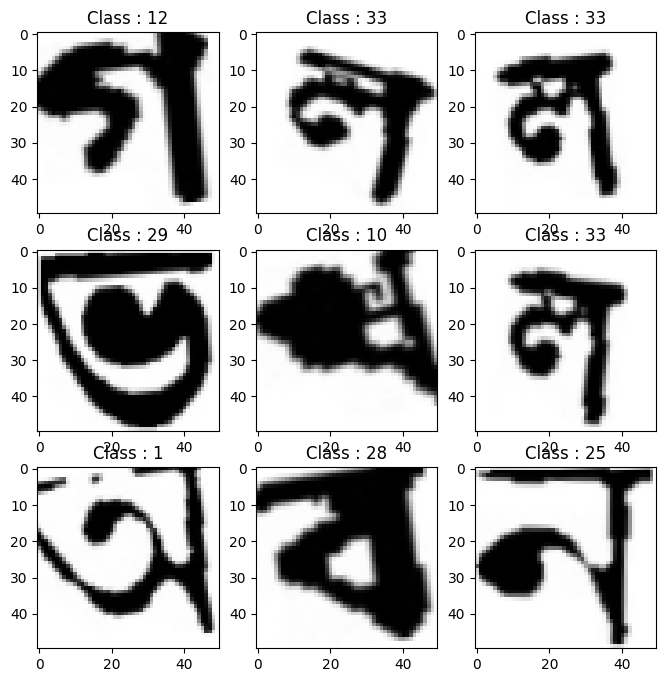

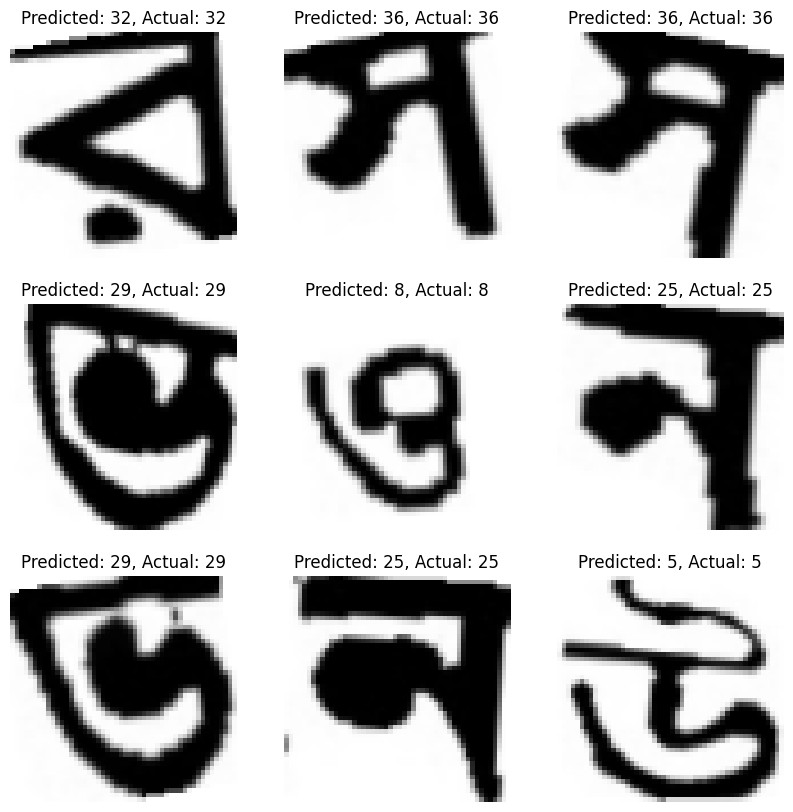

F1 Score: 0.9984060459042826


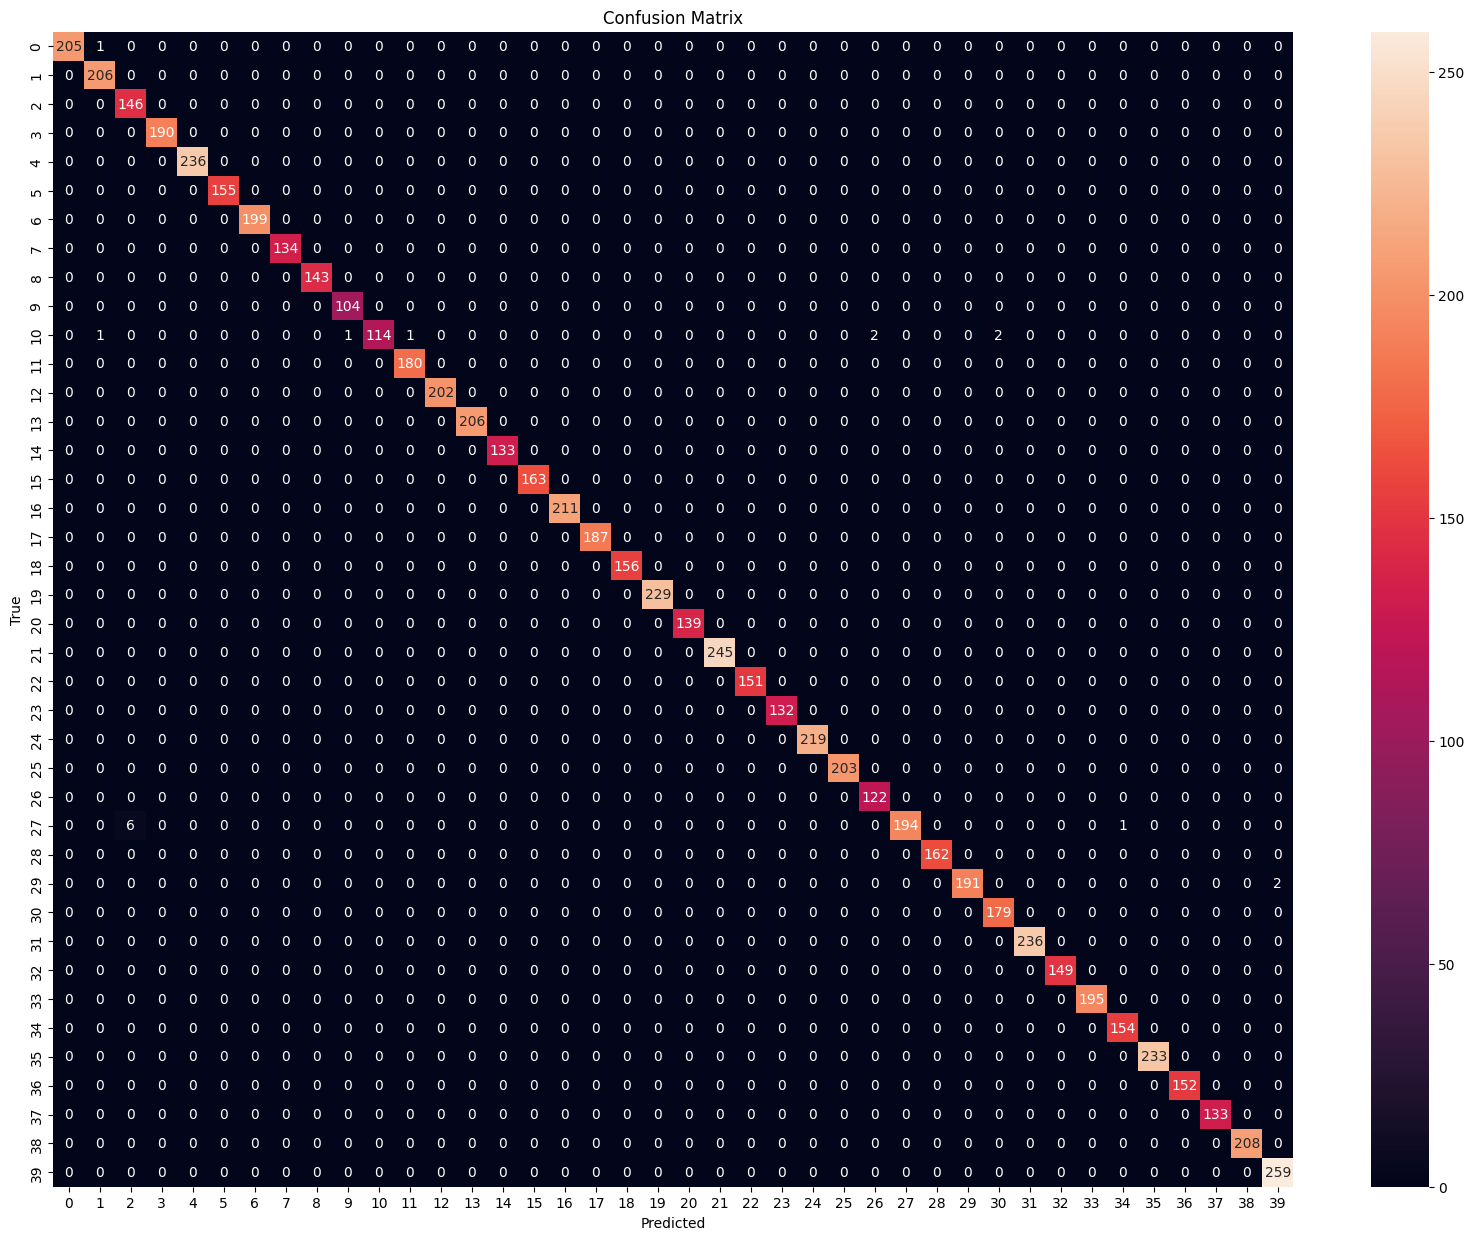

Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99       206
           2       1.00      0.99      0.99       206
           3       0.96      1.00      0.98       146
           4       1.00      1.00      1.00       190
           5       1.00      1.00      1.00       236
           6       1.00      1.00      1.00       155
           7       1.00      1.00      1.00       199
           8       1.00      1.00      1.00       134
           9       1.00      1.00      1.00       143
          10       1.00      1.00      1.00       104
          11       1.00      1.00      1.00       121
          12       1.00      1.00      1.00       180
          13       1.00      1.00      1.00       202
          14       1.00      1.00      1.00       206
          15       1.00      1.00      1.00       133
          16       1.00      1.00      1.00       163
          17       1.00      1.00      1.00       211
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])
# Print Model Summary
model.summary()
# Train the model
batch_size = 16
epochs = 20

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)

# Adagrad 64

Epoch 1/10
210/210 [==============================] - 19s 86ms/step - loss: 3.7060 - accuracy: 0.0318 - val_loss: 3.7018 - val_accuracy: 0.0341
Epoch 2/10
210/210 [==============================] - 17s 82ms/step - loss: 3.6848 - accuracy: 0.0381 - val_loss: 3.6876 - val_accuracy: 0.0403
Epoch 3/10
210/210 [==============================] - 17s 82ms/step - loss: 3.6637 - accuracy: 0.0450 - val_loss: 3.6705 - val_accuracy: 0.0475
Epoch 4/10
210/210 [==============================] - 18s 85ms/step - loss: 3.6316 - accuracy: 0.0542 - val_loss: 3.6407 - val_accuracy: 0.0780
Epoch 5/10
210/210 [==============================] - 19s 89ms/step - loss: 3.5844 - accuracy: 0.0698 - val_loss: 3.5796 - val_accuracy: 0.1213
Epoch 6/10
210/210 [==============================] - 18s 85ms/step - loss: 3.4965 - accuracy: 0.1007 - val_loss: 3.4607 - val_accuracy: 0.1631
Epoch 7/10
210/210 [==============================] - 18s 86ms/step - loss: 3.3279 - accuracy: 0.1401 - val_loss: 3.2256 - val_accuracy:

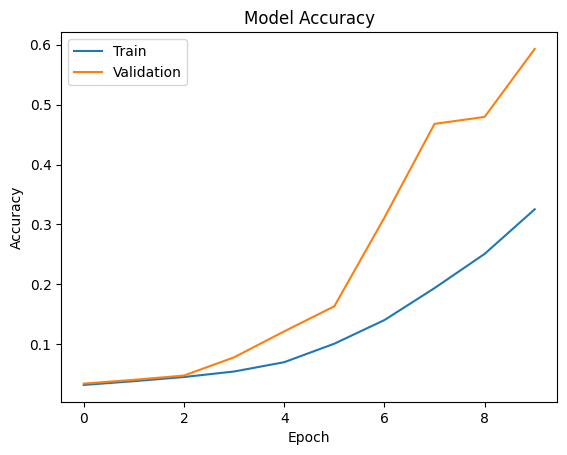

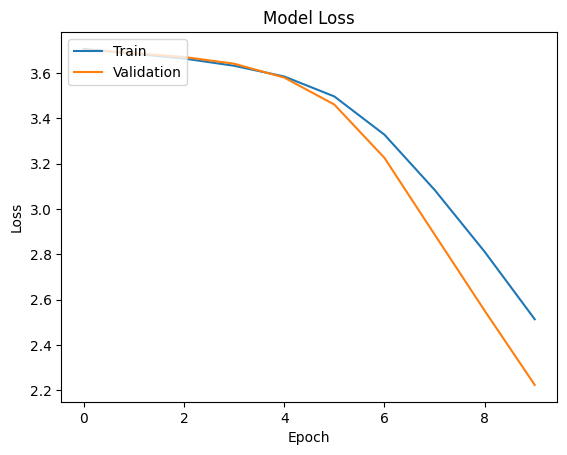

Test Loss: 2.201327085494995
Test Accuracy: 0.6105688810348511
225/225 [==============================] - 3s 13ms/step


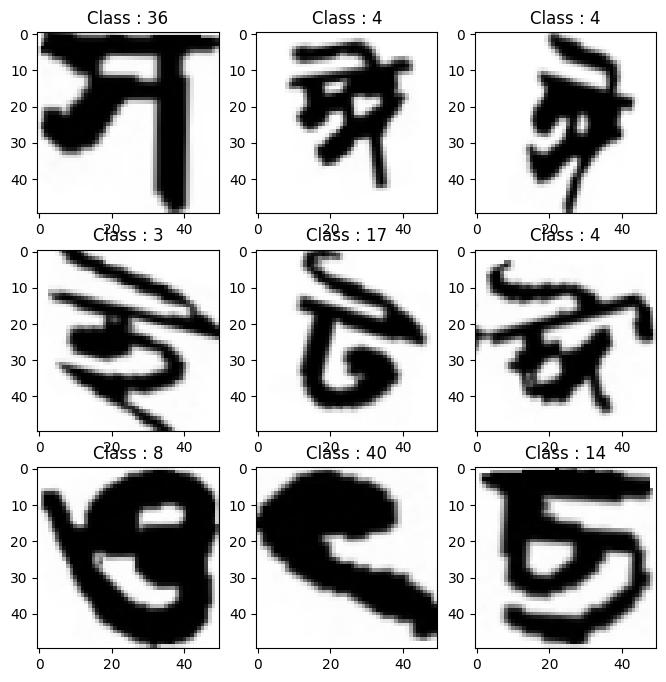

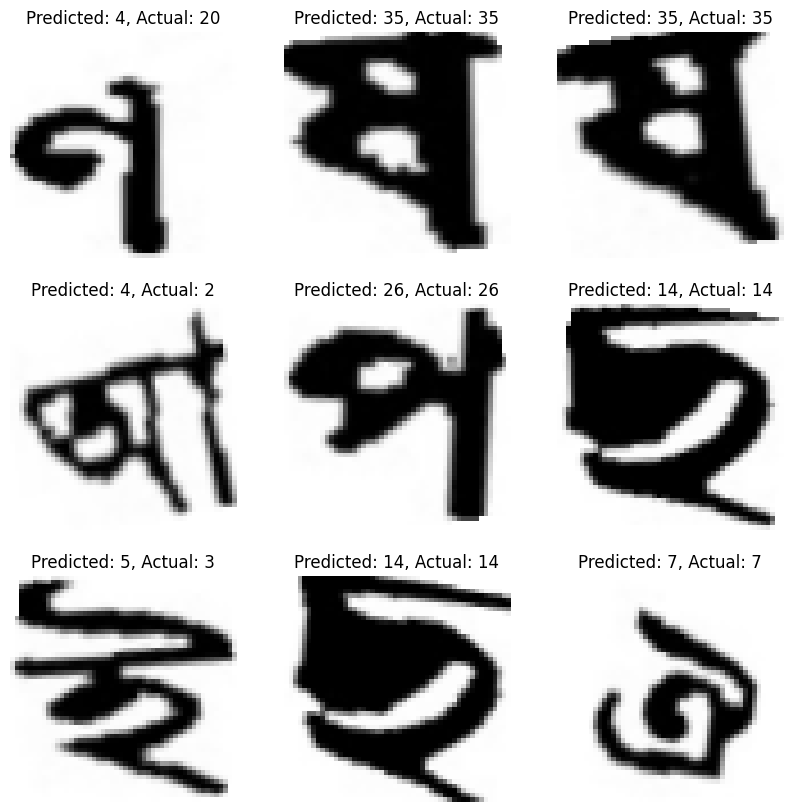

F1 Score: 0.5267974189127637


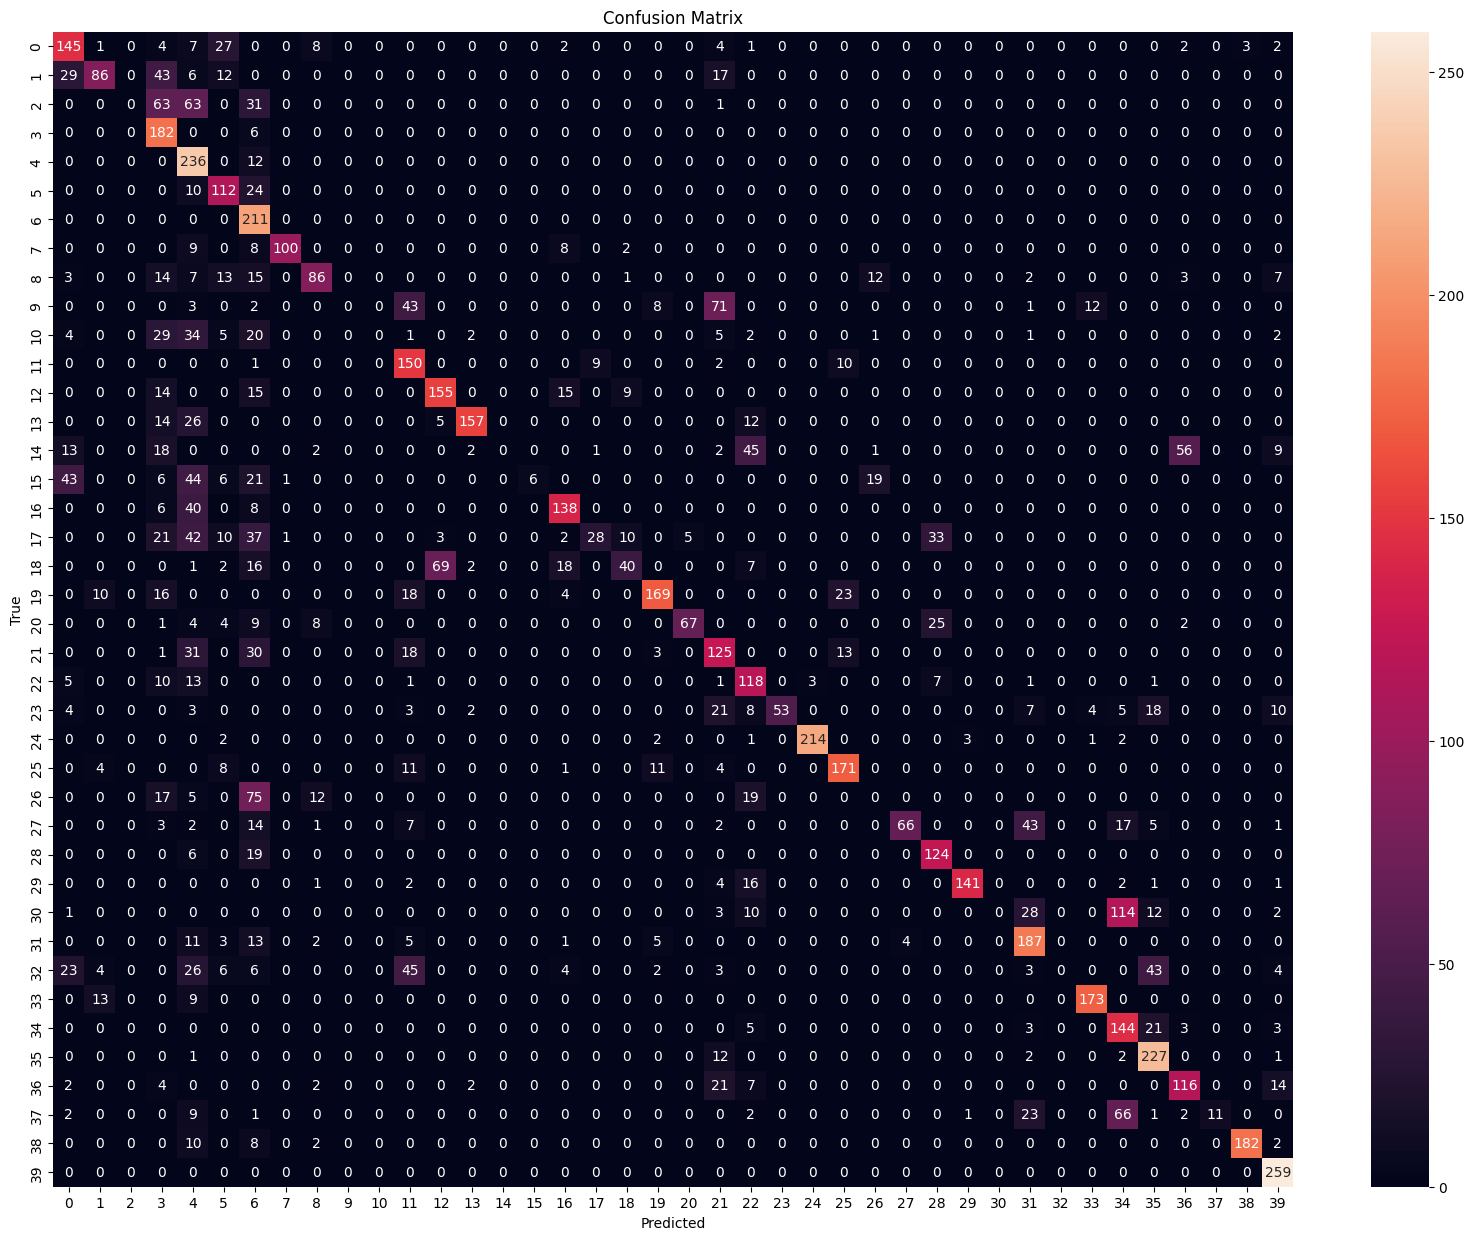

Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.70      0.60       206
           2       0.73      0.45      0.55       193
           3       0.00      0.00      0.00       158
           4       0.39      0.97      0.56       188
           5       0.36      0.95      0.52       248
           6       0.53      0.77      0.63       146
           7       0.35      1.00      0.52       211
           8       0.98      0.79      0.87       127
           9       0.69      0.53      0.60       163
          10       0.00      0.00      0.00       140
          11       0.00      0.00      0.00       106
          12       0.49      0.87      0.63       172
          13       0.67      0.75      0.70       208
          14       0.94      0.73      0.82       214
          15       0.00      0.00      0.00       149
          16       1.00      0.04      0.08       146
          17       0.72      0.72      0.72       192
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
       
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# Adagrad 32

Epoch 1/10
419/419 [==============================] - 21s 48ms/step - loss: 3.6864 - accuracy: 0.0389 - val_loss: 3.6681 - val_accuracy: 0.0520
Epoch 2/10
419/419 [==============================] - 20s 47ms/step - loss: 3.6041 - accuracy: 0.0697 - val_loss: 3.5692 - val_accuracy: 0.2247
Epoch 3/10
419/419 [==============================] - 20s 48ms/step - loss: 3.3981 - accuracy: 0.1288 - val_loss: 3.1965 - val_accuracy: 0.3899
Epoch 4/10
419/419 [==============================] - 20s 48ms/step - loss: 2.9163 - accuracy: 0.2429 - val_loss: 2.5170 - val_accuracy: 0.5605
Epoch 5/10
419/419 [==============================] - 20s 48ms/step - loss: 2.3638 - accuracy: 0.3690 - val_loss: 1.8753 - val_accuracy: 0.6976
Epoch 6/10
419/419 [==============================] - 20s 49ms/step - loss: 1.9031 - accuracy: 0.4808 - val_loss: 1.4321 - val_accuracy: 0.7535
Epoch 7/10
419/419 [==============================] - 20s 48ms/step - loss: 1.5718 - accuracy: 0.5662 - val_loss: 1.1004 - val_accuracy:

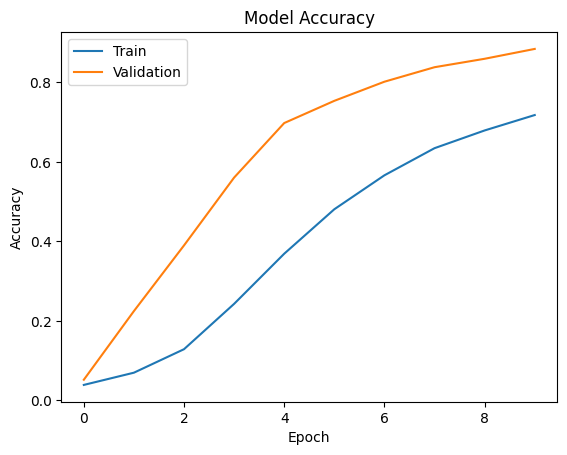

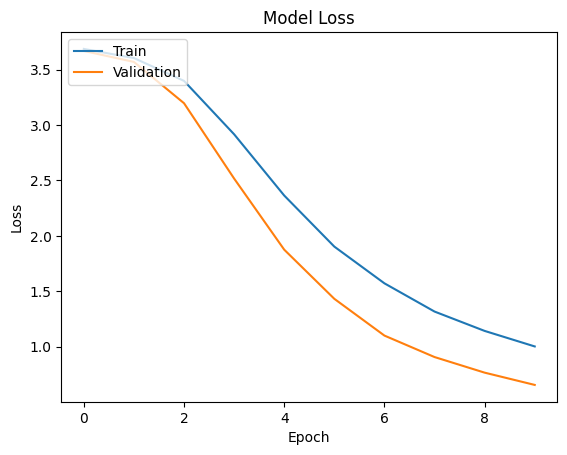

Test Loss: 0.630274772644043
Test Accuracy: 0.8898494243621826
225/225 [==============================] - 3s 14ms/step


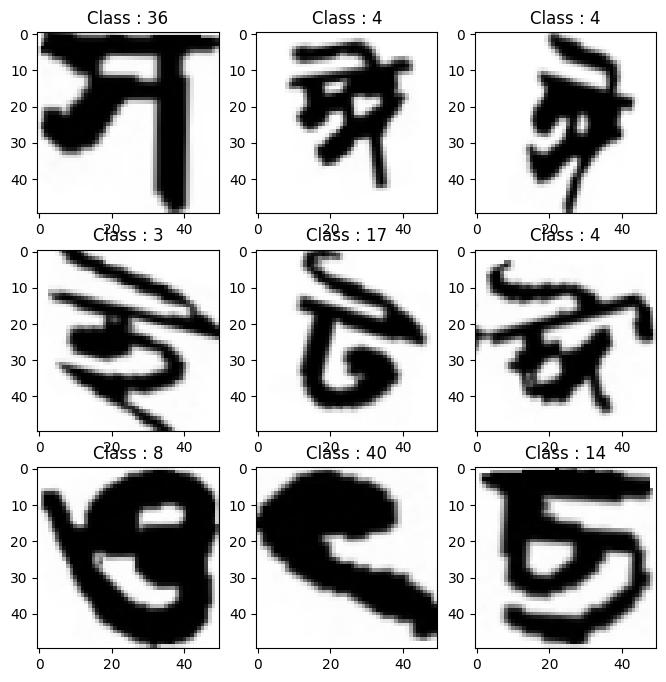

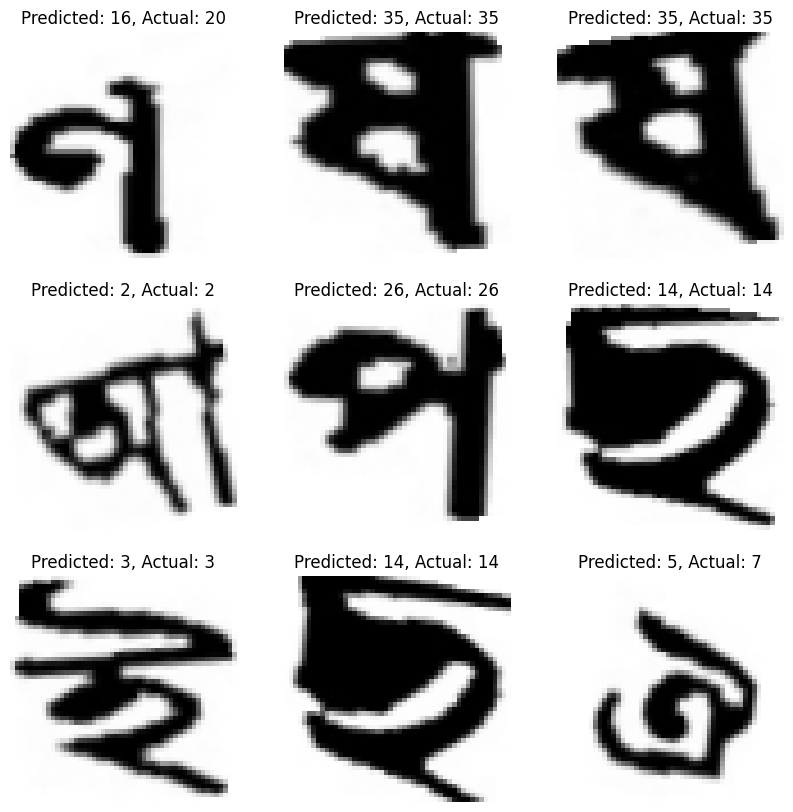

F1 Score: 0.8824400499108425


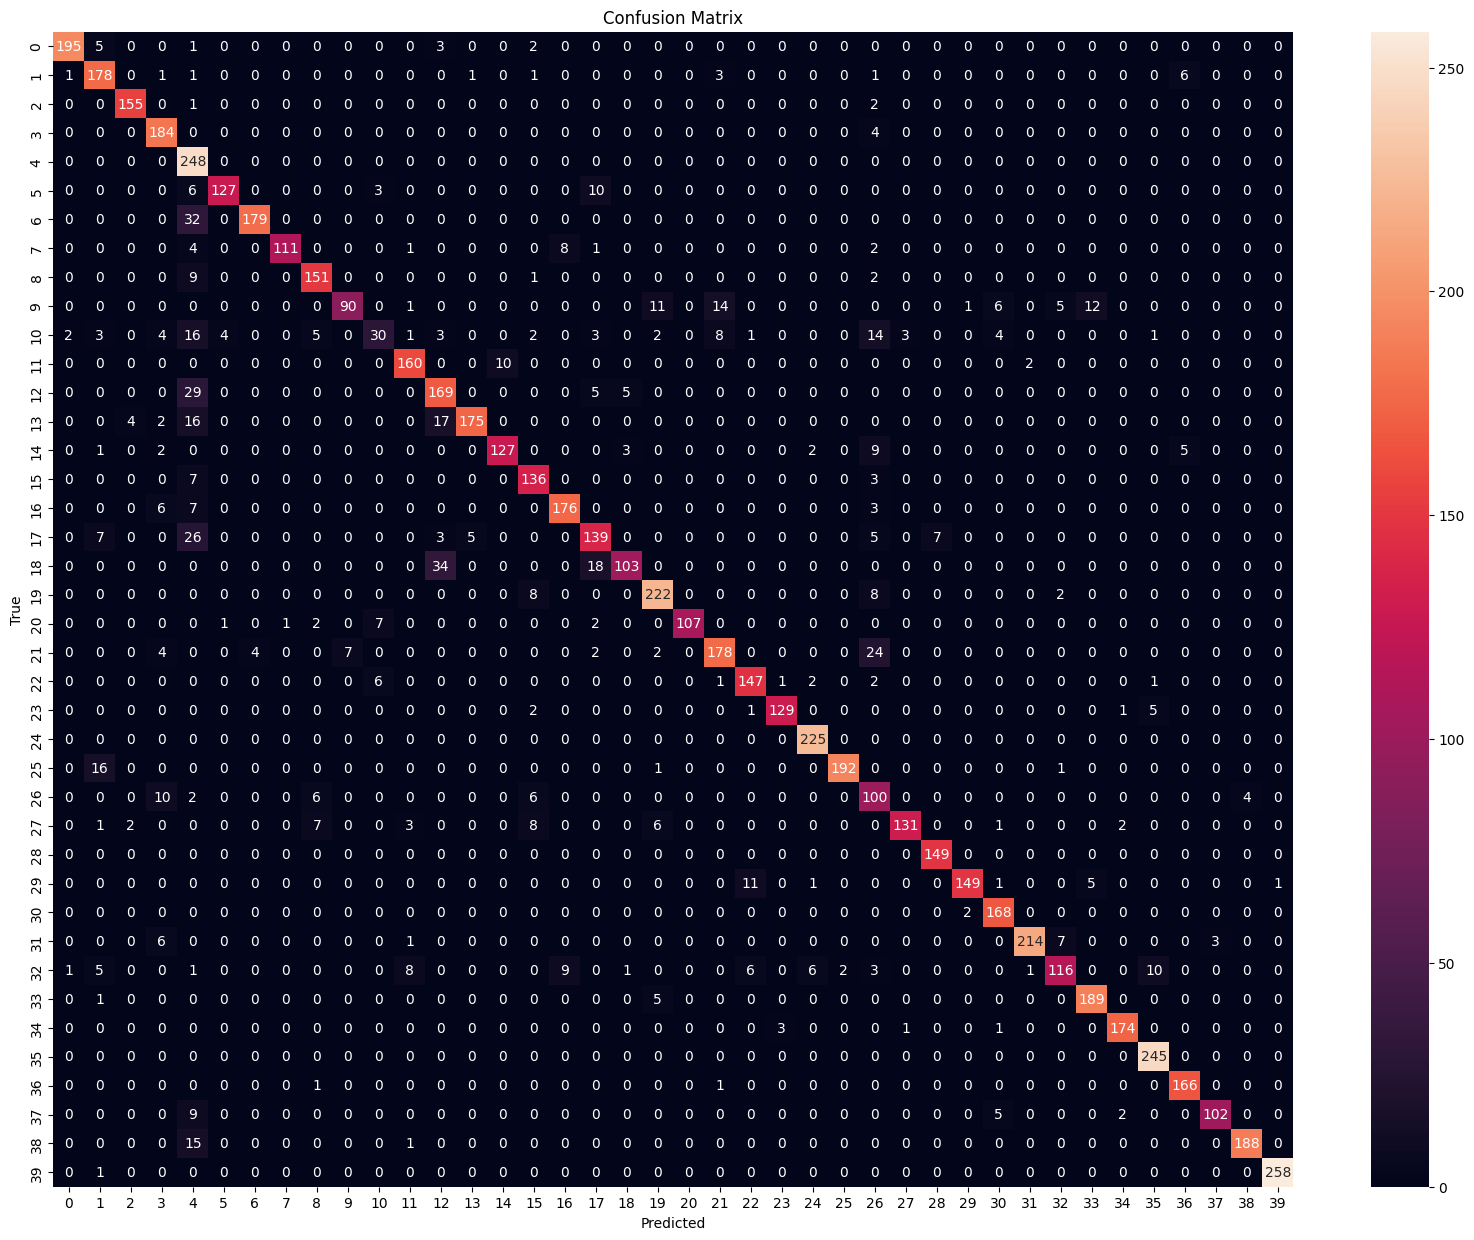

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.95      0.96       206
           2       0.82      0.92      0.87       193
           3       0.96      0.98      0.97       158
           4       0.84      0.98      0.90       188
           5       0.58      1.00      0.73       248
           6       0.96      0.87      0.91       146
           7       0.98      0.85      0.91       211
           8       0.99      0.87      0.93       127
           9       0.88      0.93      0.90       163
          10       0.93      0.64      0.76       140
          11       0.65      0.28      0.39       106
          12       0.91      0.93      0.92       172
          13       0.74      0.81      0.77       208
          14       0.97      0.82      0.89       214
          15       0.93      0.85      0.89       149
          16       0.82      0.93      0.87       146
          17       0.91      0.92      0.91       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        # Read the image
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# **Adagrad 16*

Epoch 1/10
837/837 [==============================] - 27s 31ms/step - loss: 3.6615 - accuracy: 0.0466 - val_loss: 3.6271 - val_accuracy: 0.1327
Epoch 2/10
837/837 [==============================] - 26s 31ms/step - loss: 3.4566 - accuracy: 0.1118 - val_loss: 3.1925 - val_accuracy: 0.3361
Epoch 3/10
837/837 [==============================] - 25s 30ms/step - loss: 2.7528 - accuracy: 0.2748 - val_loss: 2.1520 - val_accuracy: 0.6095
Epoch 4/10
837/837 [==============================] - 25s 30ms/step - loss: 1.9434 - accuracy: 0.4706 - val_loss: 1.3636 - val_accuracy: 0.7738
Epoch 5/10
837/837 [==============================] - 25s 30ms/step - loss: 1.4421 - accuracy: 0.6032 - val_loss: 0.9600 - val_accuracy: 0.8270
Epoch 6/10
837/837 [==============================] - 25s 30ms/step - loss: 1.1320 - accuracy: 0.6848 - val_loss: 0.7290 - val_accuracy: 0.8554
Epoch 7/10
837/837 [==============================] - 25s 30ms/step - loss: 0.9249 - accuracy: 0.7396 - val_loss: 0.5787 - val_accuracy:

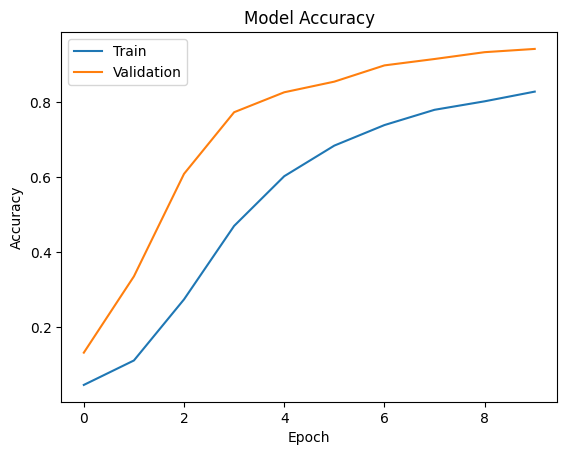

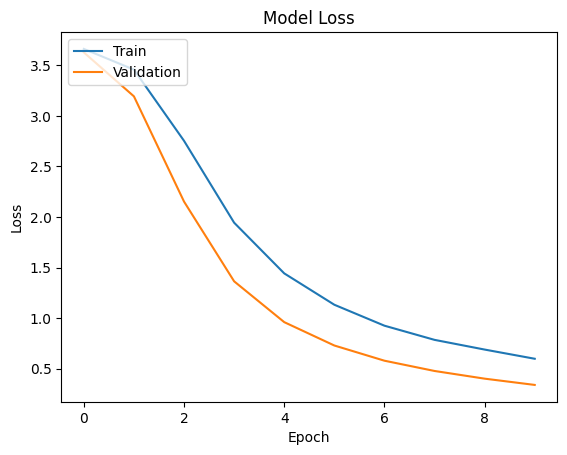

Test Loss: 0.3243430256843567
Test Accuracy: 0.9454824328422546
225/225 [==============================] - 3s 14ms/step


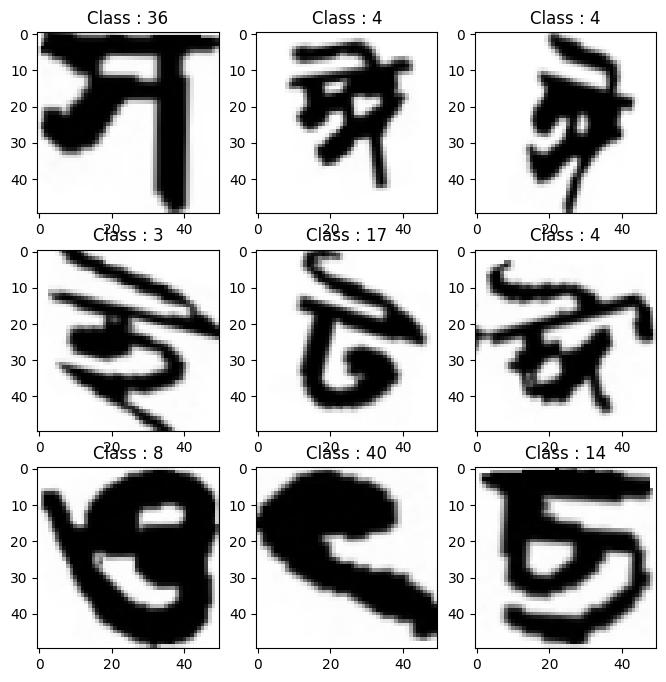

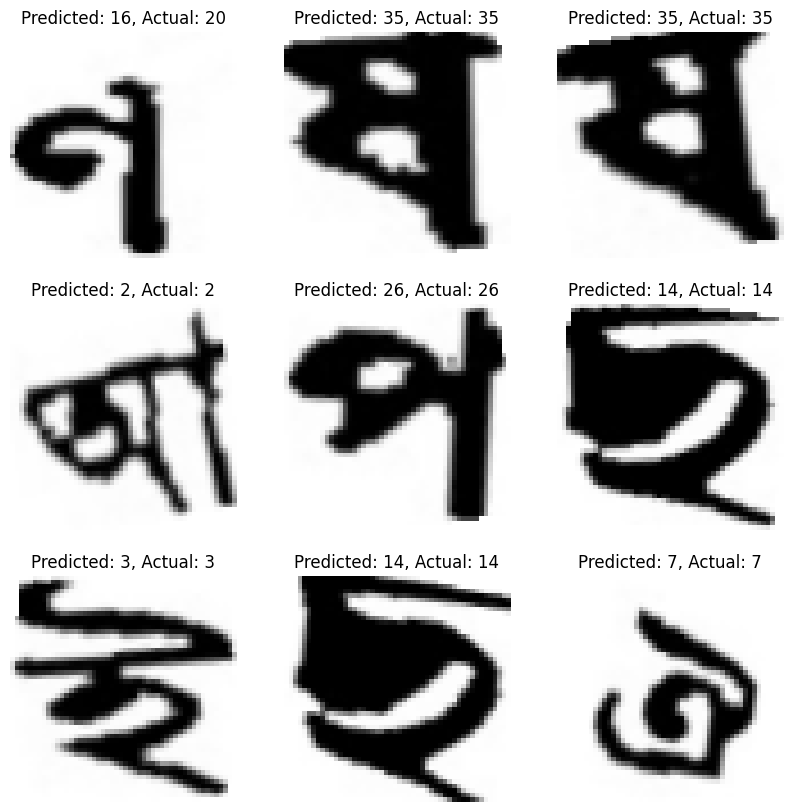

F1 Score: 0.9399419532917934


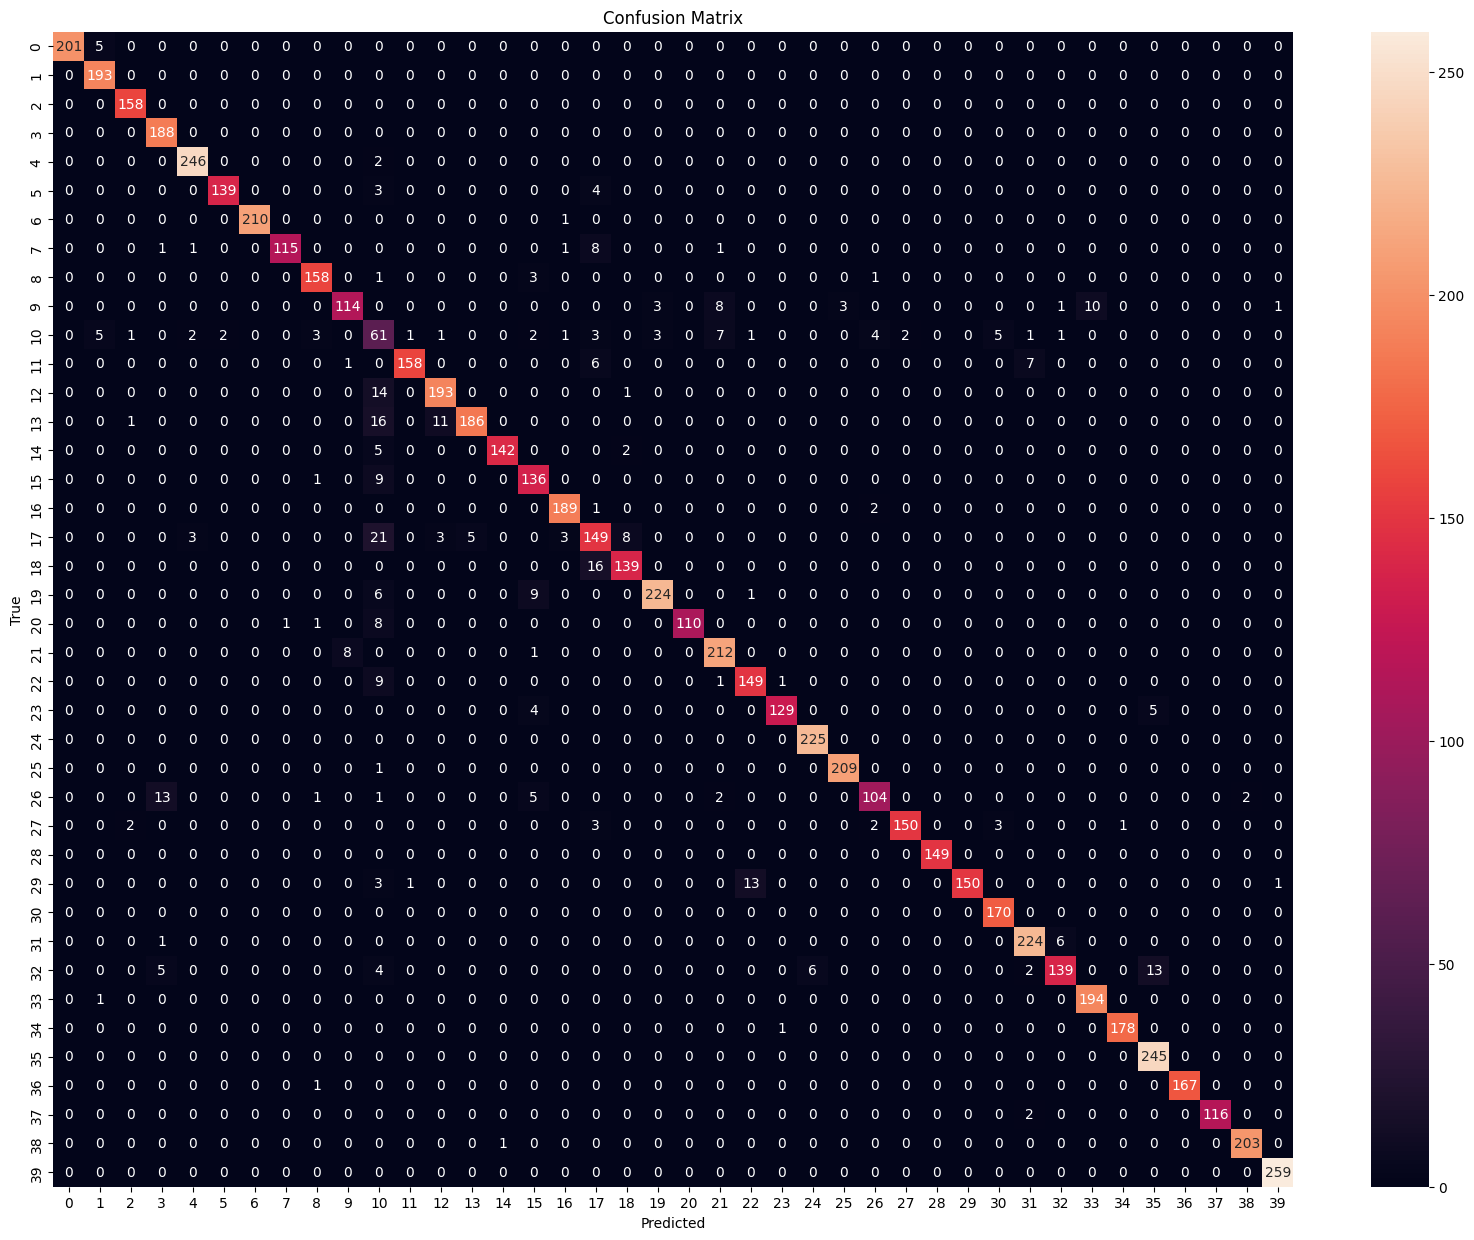

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.95      1.00      0.97       193
           3       0.98      1.00      0.99       158
           4       0.90      1.00      0.95       188
           5       0.98      0.99      0.98       248
           6       0.99      0.95      0.97       146
           7       1.00      1.00      1.00       211
           8       0.99      0.91      0.95       127
           9       0.96      0.97      0.96       163
          10       0.93      0.81      0.87       140
          11       0.37      0.58      0.45       106
          12       0.99      0.92      0.95       172
          13       0.93      0.93      0.93       208
          14       0.97      0.87      0.92       214
          15       0.99      0.95      0.97       149
          16       0.85      0.93      0.89       146
          17       0.97      0.98      0.98       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
       
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

# Train the model
batch_size = 16
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# **Adagrad 128**

Epoch 1/10
105/105 [==============================] - 7s 25ms/step - loss: 3.7095 - accuracy: 0.0290 - val_loss: 3.6988 - val_accuracy: 0.0284
Epoch 2/10
105/105 [==============================] - 2s 17ms/step - loss: 3.6908 - accuracy: 0.0323 - val_loss: 3.6899 - val_accuracy: 0.0412
Epoch 3/10
105/105 [==============================] - 2s 17ms/step - loss: 3.6767 - accuracy: 0.0387 - val_loss: 3.6806 - val_accuracy: 0.0382
Epoch 4/10
105/105 [==============================] - 2s 17ms/step - loss: 3.6662 - accuracy: 0.0418 - val_loss: 3.6706 - val_accuracy: 0.0484
Epoch 5/10
105/105 [==============================] - 2s 17ms/step - loss: 3.6531 - accuracy: 0.0469 - val_loss: 3.6590 - val_accuracy: 0.0639
Epoch 6/10
105/105 [==============================] - 2s 17ms/step - loss: 3.6372 - accuracy: 0.0530 - val_loss: 3.6426 - val_accuracy: 0.1001
Epoch 7/10
105/105 [==============================] - 2s 17ms/step - loss: 3.6147 - accuracy: 0.0631 - val_loss: 3.6207 - val_accuracy: 0.1216

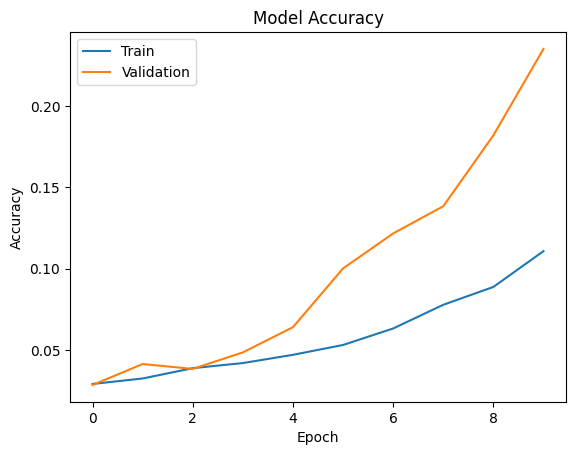

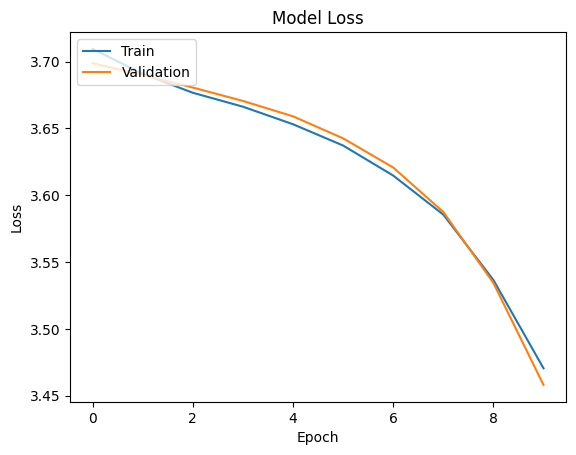

Test Loss: 3.459157943725586
Test Accuracy: 0.2352202981710434
225/225 [==============================] - 0s 2ms/step


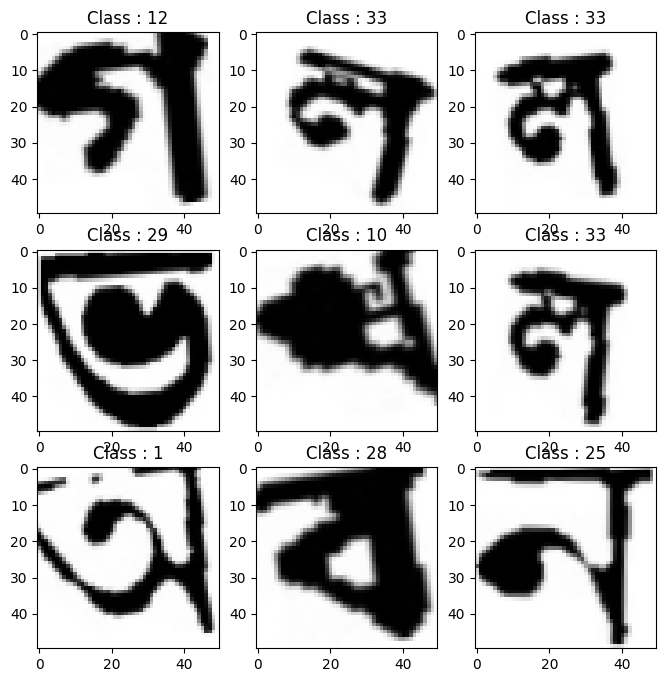

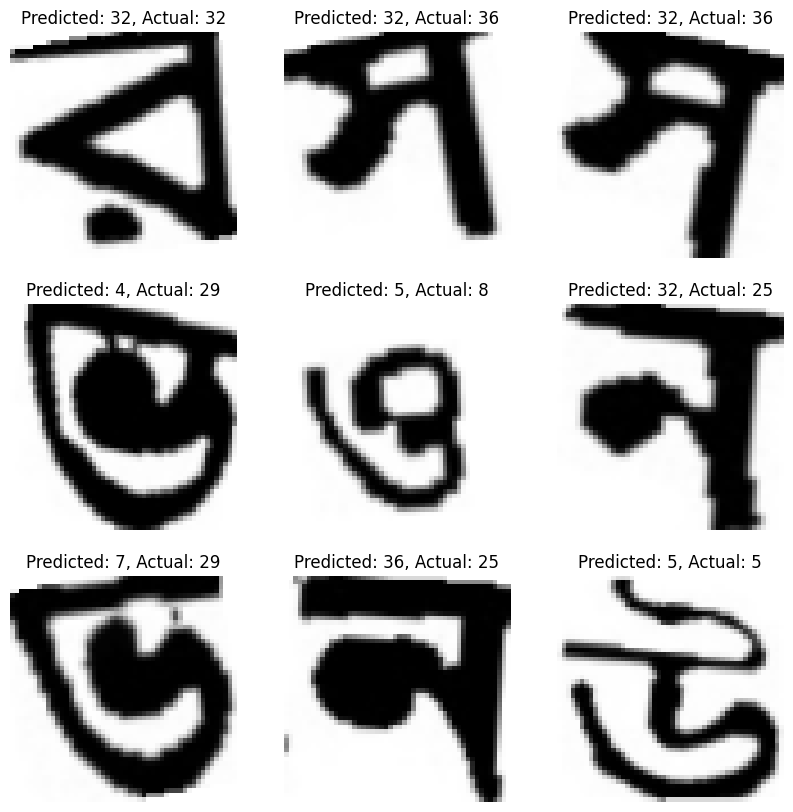

F1 Score: 0.14001740417127984


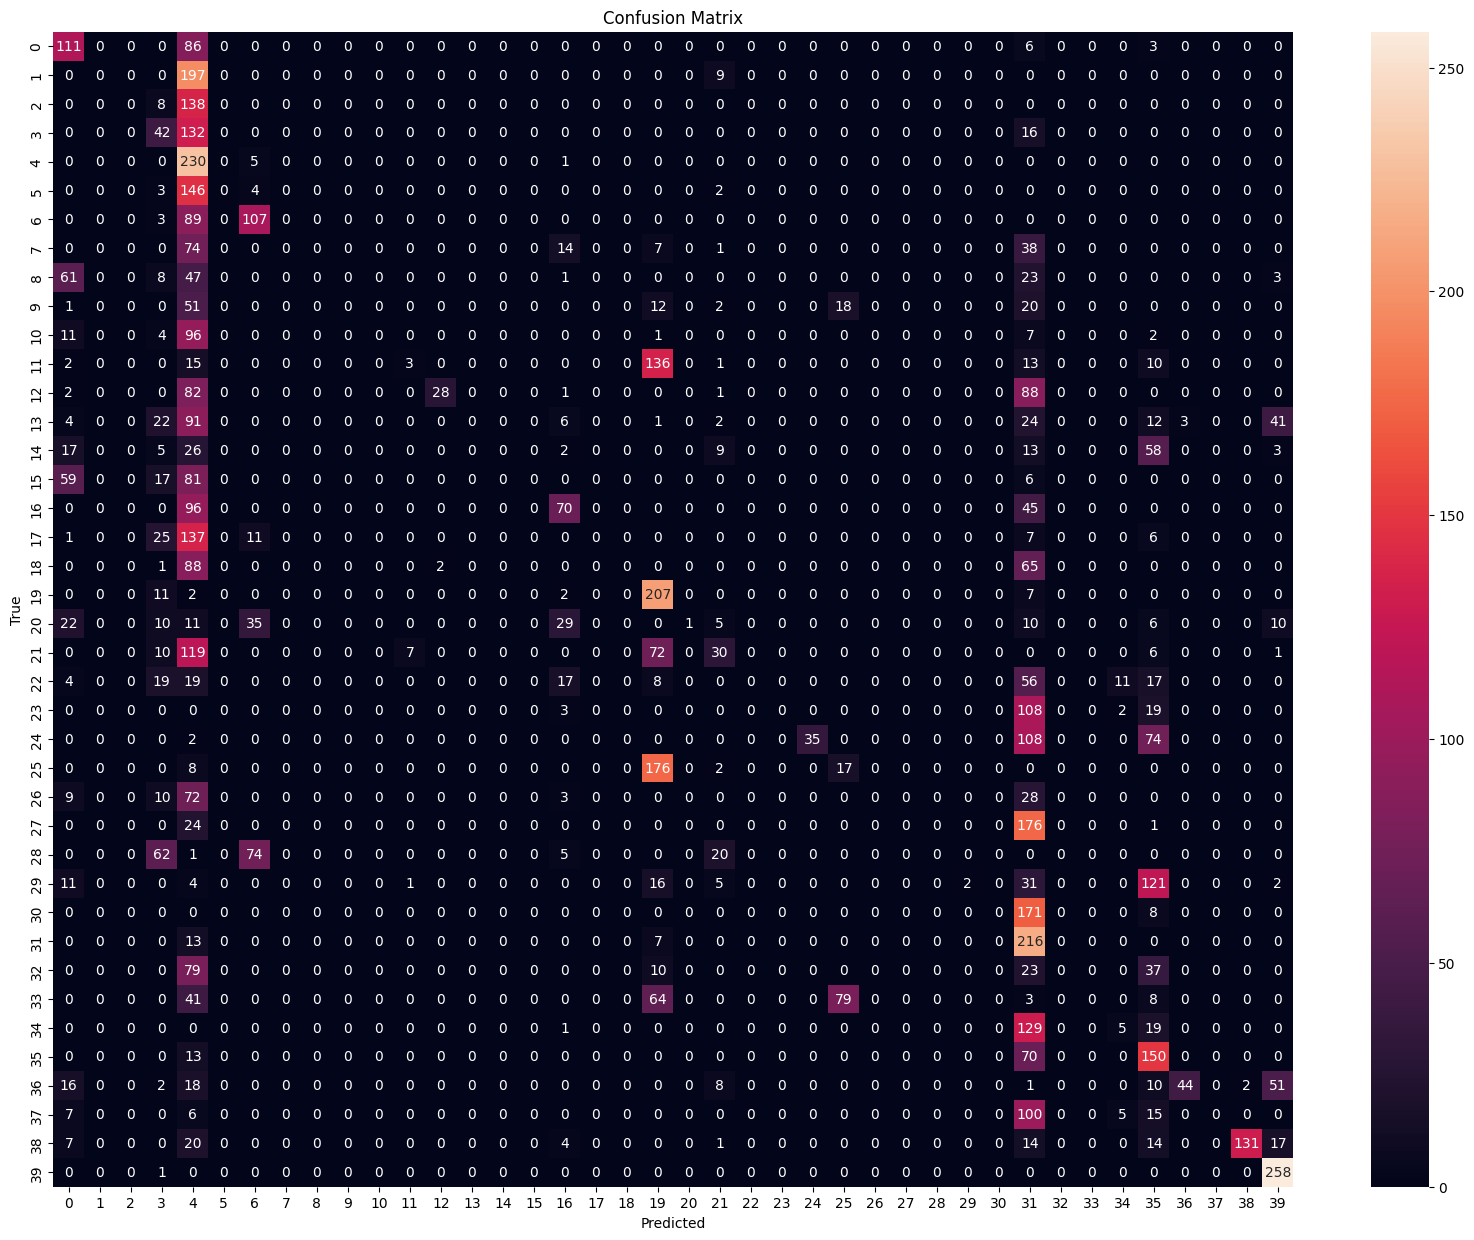

Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.54      0.40       206
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00       146
           4       0.16      0.22      0.19       190
           5       0.10      0.97      0.18       236
           6       0.00      0.00      0.00       155
           7       0.45      0.54      0.49       199
           8       0.00      0.00      0.00       134
           9       0.00      0.00      0.00       143
          10       0.00      0.00      0.00       104
          11       0.00      0.00      0.00       121
          12       0.27      0.02      0.03       180
          13       0.93      0.14      0.24       202
          14       0.00      0.00      0.00       206
          15       0.00      0.00      0.00       133
          16       0.00      0.00      0.00       163
          17       0.44      0.33      0.38       211
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# Adam 20 epoch

Epoch 1/20
419/419 [==============================] - 23s 53ms/step - loss: 0.8546 - accuracy: 0.7748 - val_loss: 0.0399 - val_accuracy: 0.9916
Epoch 2/20
419/419 [==============================] - 21s 49ms/step - loss: 0.0769 - accuracy: 0.9792 - val_loss: 0.0160 - val_accuracy: 0.9961
Epoch 3/20
419/419 [==============================] - 21s 51ms/step - loss: 0.0433 - accuracy: 0.9873 - val_loss: 0.0090 - val_accuracy: 0.9976
Epoch 4/20
419/419 [==============================] - 21s 50ms/step - loss: 0.0316 - accuracy: 0.9928 - val_loss: 0.0075 - val_accuracy: 0.9982
Epoch 5/20
419/419 [==============================] - 21s 50ms/step - loss: 0.0285 - accuracy: 0.9928 - val_loss: 0.0082 - val_accuracy: 0.9964
Epoch 6/20
419/419 [==============================] - 21s 50ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.0185 - val_accuracy: 0.9925
Epoch 7/20
419/419 [==============================] - 21s 50ms/step - loss: 0.0219 - accuracy: 0.9941 - val_loss: 0.0031 - val_accuracy:

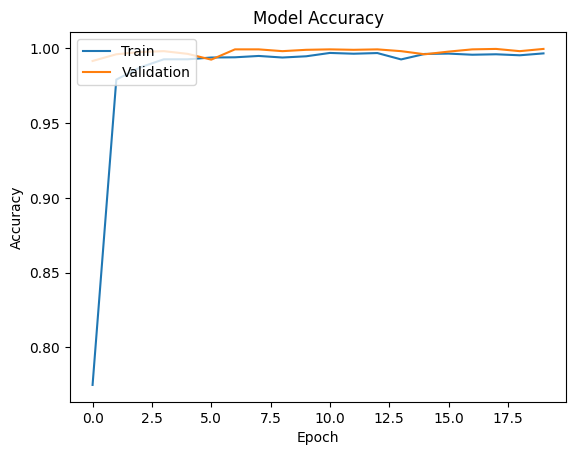

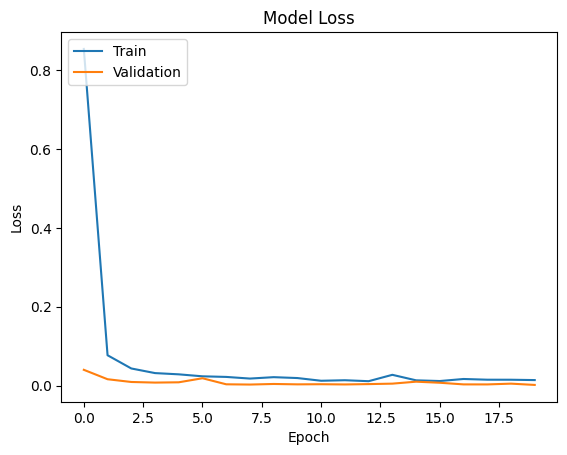

Test Loss: 0.012901775538921356
Test Accuracy: 0.9981874227523804
225/225 [==============================] - 3s 13ms/step


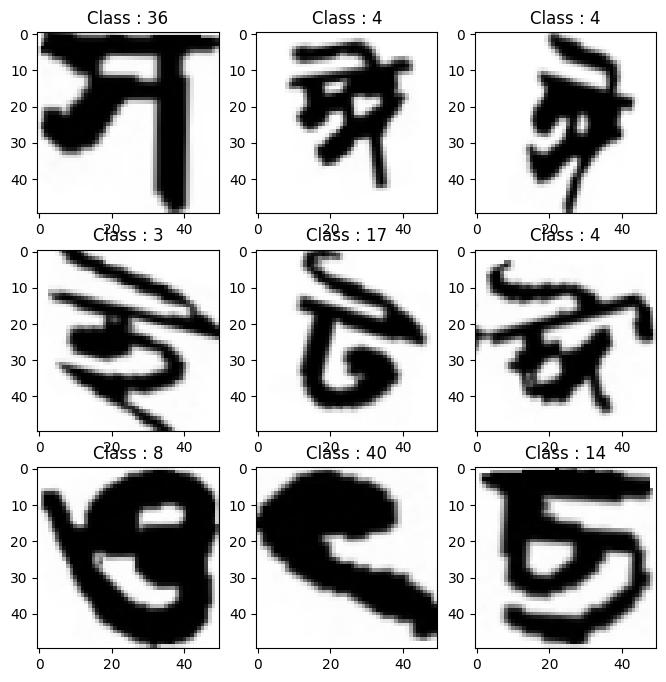

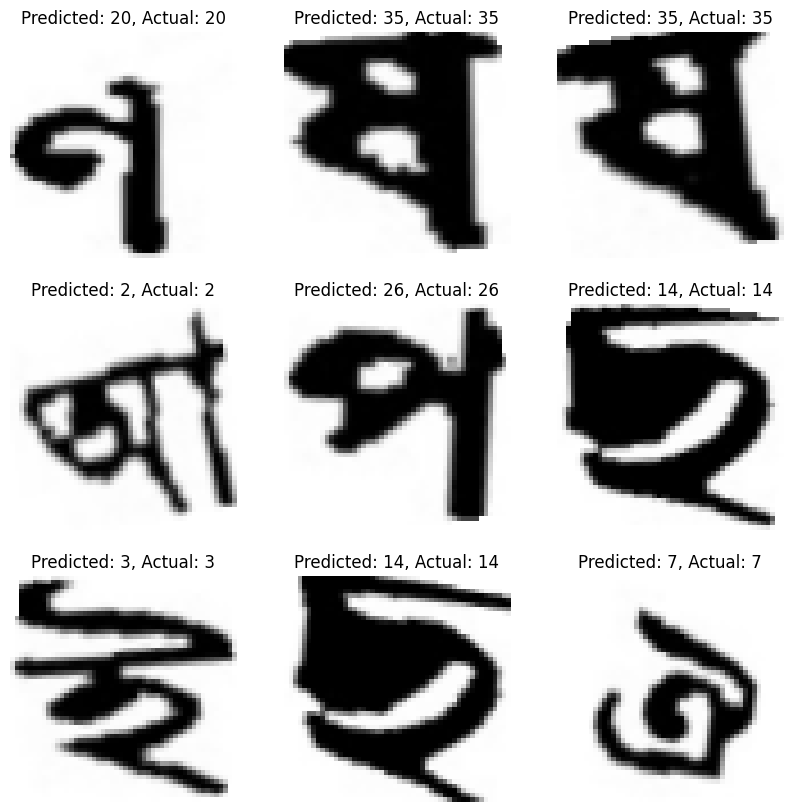

F1 Score: 0.9980377676153646


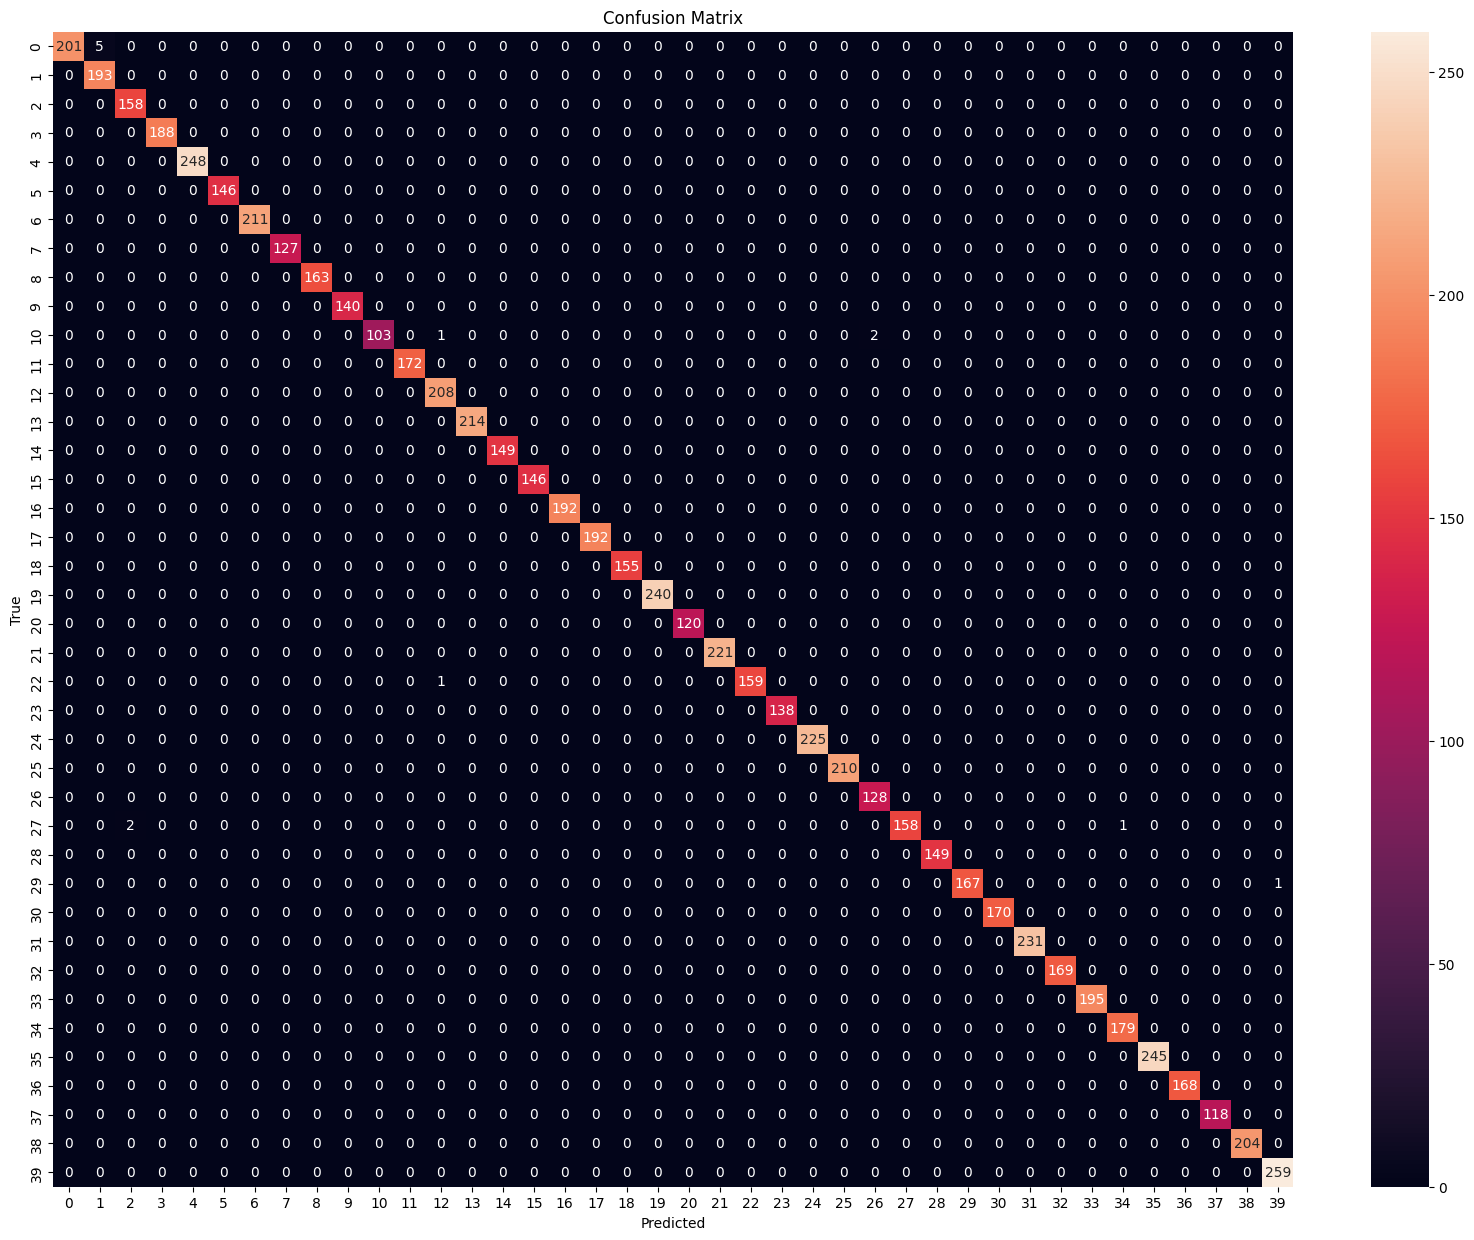

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      1.00      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       1.00      0.97      0.99       106
          12       1.00      1.00      1.00       172
          13       0.99      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
       
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 20

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)



Training with SGD optimizer and batch size 16...
Epoch 1/10
837/837 [==============================] - 28s 33ms/step - loss: 2.8969 - accuracy: 0.2377 - val_loss: 0.9026 - val_accuracy: 0.8121
Epoch 2/10
837/837 [==============================] - 27s 32ms/step - loss: 0.6475 - accuracy: 0.8129 - val_loss: 0.1921 - val_accuracy: 0.9641
Epoch 3/10
837/837 [==============================] - 26s 31ms/step - loss: 0.2705 - accuracy: 0.9194 - val_loss: 0.0797 - val_accuracy: 0.9845
Epoch 4/10
837/837 [==============================] - 26s 31ms/step - loss: 0.1549 - accuracy: 0.9541 - val_loss: 0.0432 - val_accuracy: 0.9922
Epoch 5/10
837/837 [==============================] - 27s 32ms/step - loss: 0.1081 - accuracy: 0.9694 - val_loss: 0.0289 - val_accuracy: 0.9934
Epoch 6/10
837/837 [==============================] - 27s 32ms/step - loss: 0.0765 - accuracy: 0.9782 - val_loss: 0.0200 - val_accuracy: 0.9961
Epoch 7/10
837/837 [==============================] - 28s 33ms/step - loss: 0.0622 - a

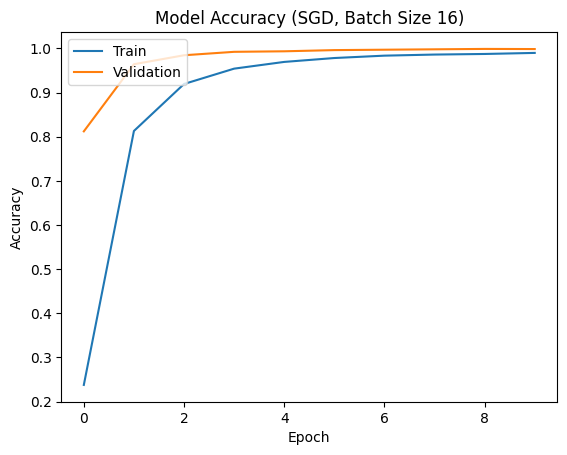

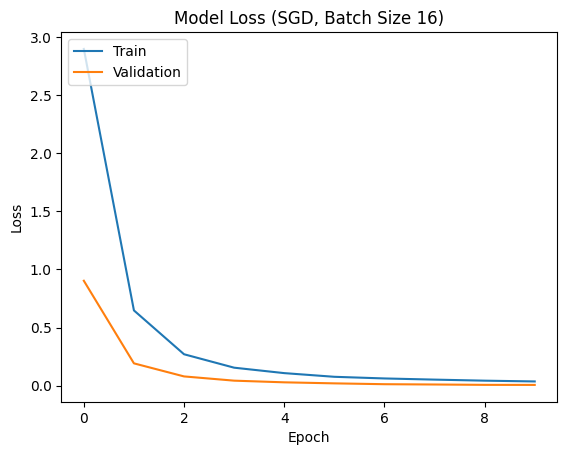

Test Loss: 0.013543731532990932
Test Accuracy: 0.997350811958313
225/225 [==============================] - 3s 15ms/step
F1 Score: 0.9968369132323488


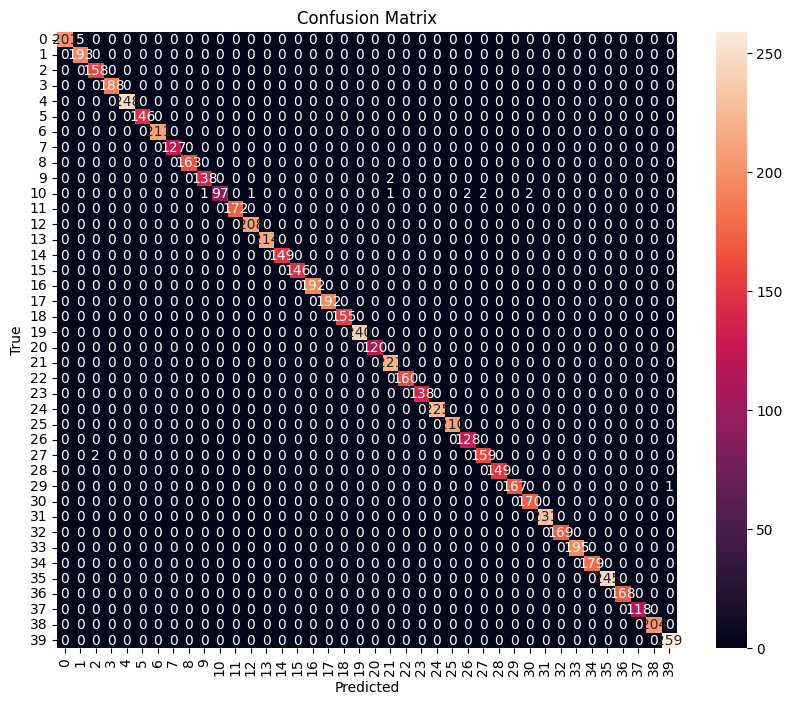

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      1.00      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       0.99      0.99      0.99       140
          11       1.00      0.92      0.96       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

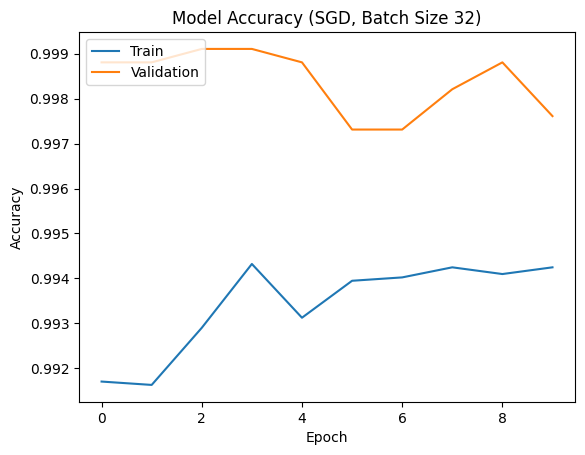

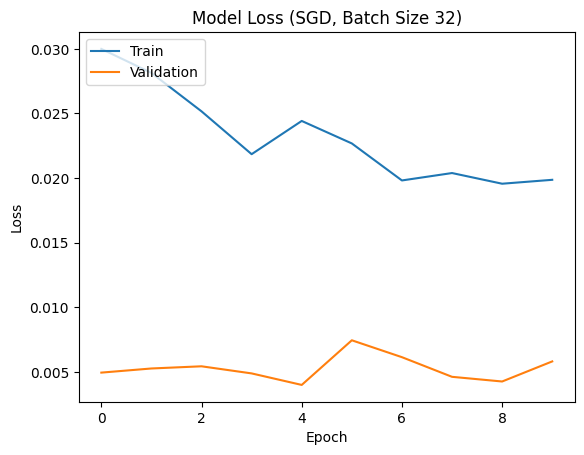

Test Loss: 0.010587609373033047
Test Accuracy: 0.9972113966941833
225/225 [==============================] - 3s 13ms/step
F1 Score: 0.9967483618149144


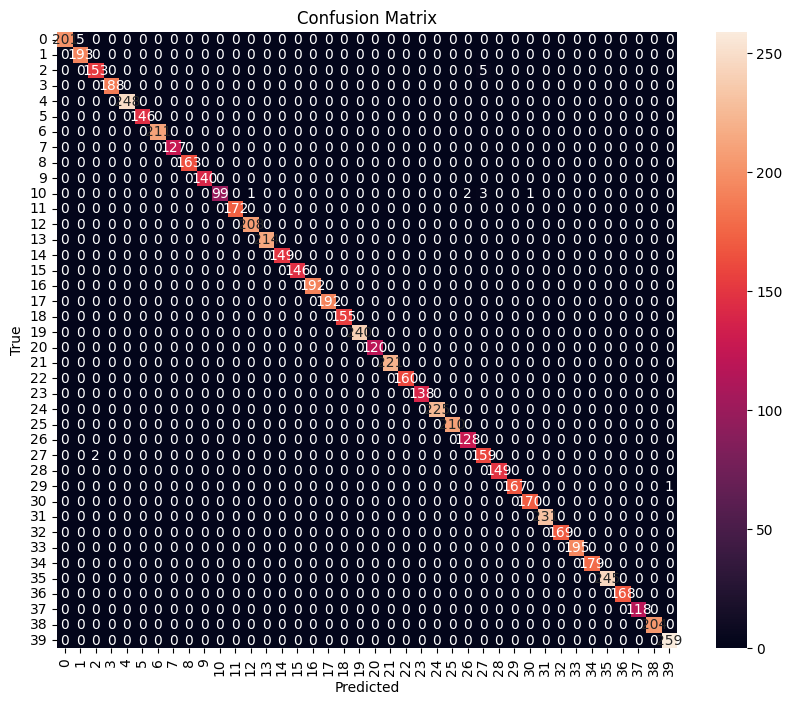

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      0.97      0.98       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       1.00      0.93      0.97       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

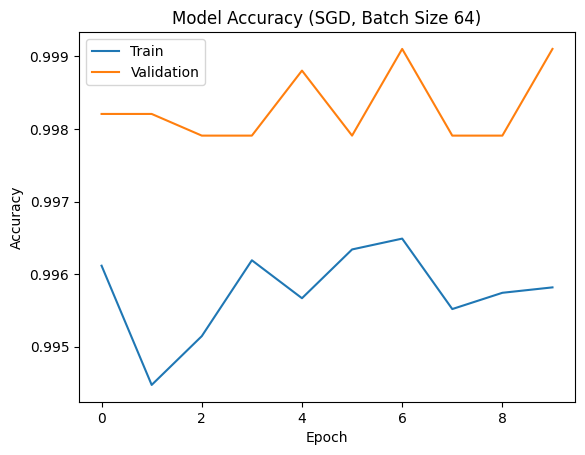

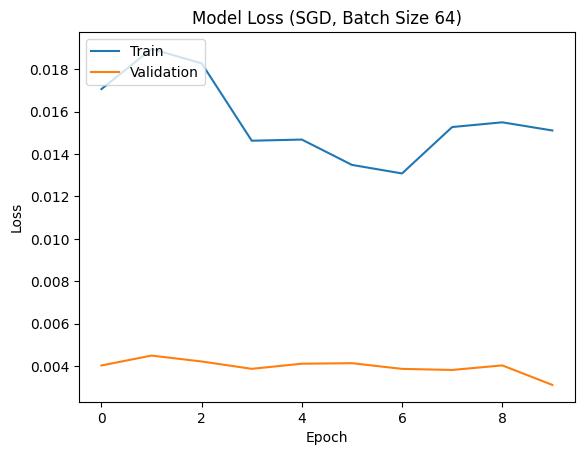

Test Loss: 0.008350539952516556
Test Accuracy: 0.9987451434135437
225/225 [==============================] - 3s 15ms/step
F1 Score: 0.9987584670206398


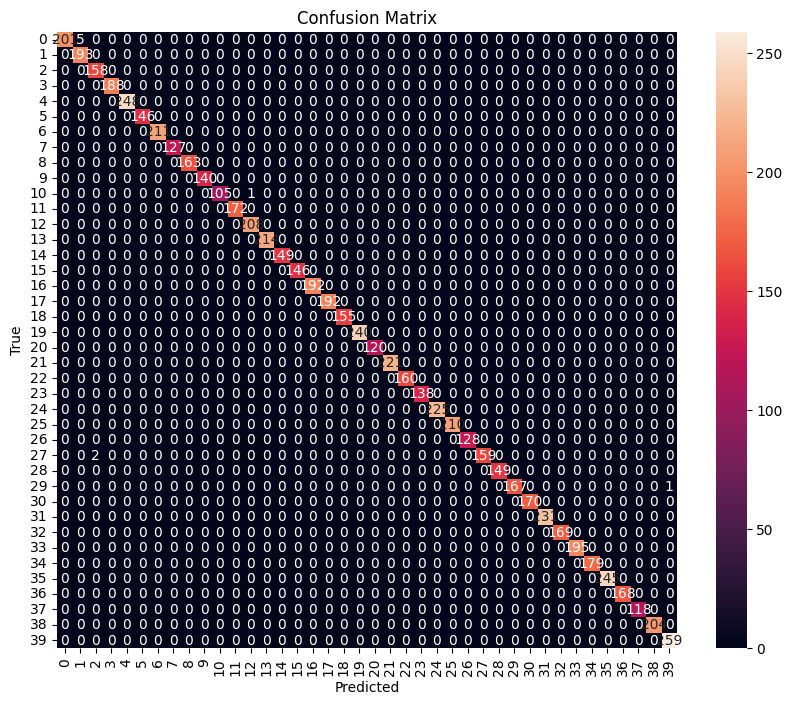

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      1.00      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       1.00      0.99      1.00       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

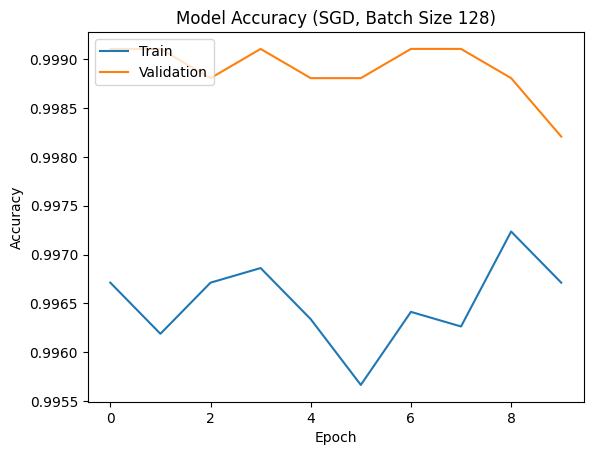

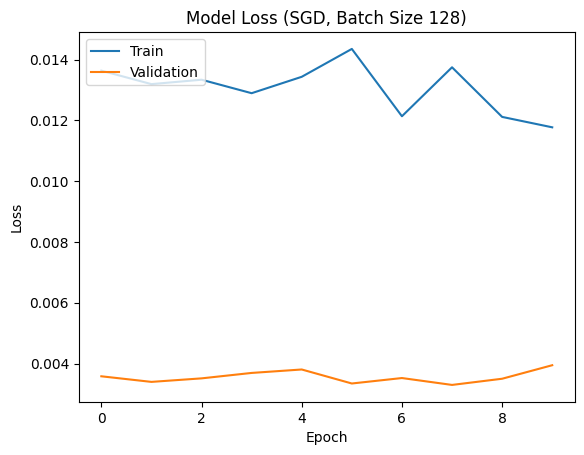

Test Loss: 0.00826785247772932
Test Accuracy: 0.9981874227523804
225/225 [==============================] - 3s 13ms/step
F1 Score: 0.9980521628035579


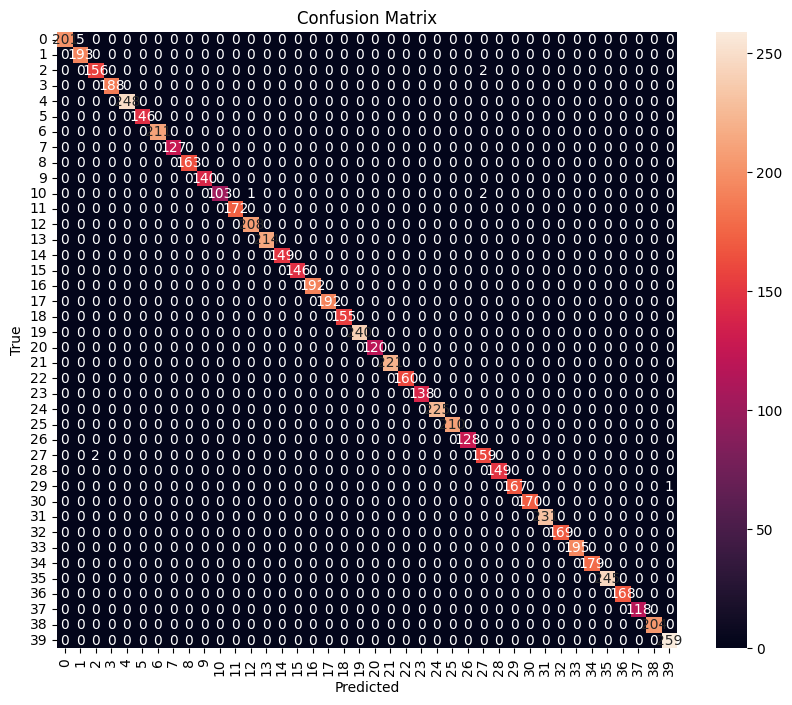

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      0.99      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       1.00      0.97      0.99       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

dataset_dir = '/content/class40'

images = []
labels = []

for class_folder in os.listdir(dataset_dir):
    label = int(class_folder)

    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (50, 50))
        image = image.astype('float32') / 255.0
        images.append(image)
        labels.append(label)

images = np.array(images)
labels = np.array(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

def plot_history(history, optimizer_name, batch_size):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy ({optimizer_name}, Batch Size {batch_size})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model Loss ({optimizer_name}, Batch Size {batch_size})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

def evaluate_model(model, x_test, y_test_encoded):
    test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate F1 score
    f1 = f1_score(y_test, predicted_classes, average='macro')
    print("F1 Score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Generate classification report
    report = classification_report(y_test, predicted_classes)

    # Print classification report
    print("Classification Report:")
    print(report)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Train and evaluate the model for different optimizers and batch sizes
optimizers = ['SGD', 'RMSprop']
batch_sizes = [16, 32, 64, 128]
epochs = 10

for optimizer in optimizers:
    for batch_size in batch_sizes:
        print(f"\nTraining with {optimizer} optimizer and batch size {batch_size}...")
        # Compile Model
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.SGD() if optimizer == 'SGD' else keras.optimizers.RMSprop(),
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(x_train, y_train_encoded,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.2)

        # Plot training history
        plot_history(history, optimizer, batch_size)

        # Evaluate the model
        evaluate_model(model, x_test, y_test_encoded)


# RMSPROP 16

Epoch 1/10
837/837 [==============================] - 26s 29ms/step - loss: 0.6180 - accuracy: 0.8351 - val_loss: 0.0249 - val_accuracy: 0.9946
Epoch 2/10
837/837 [==============================] - 24s 29ms/step - loss: 0.0629 - accuracy: 0.9849 - val_loss: 0.0129 - val_accuracy: 0.9970
Epoch 3/10
837/837 [==============================] - 25s 30ms/step - loss: 0.0385 - accuracy: 0.9903 - val_loss: 0.0181 - val_accuracy: 0.9967
Epoch 4/10
837/837 [==============================] - 25s 30ms/step - loss: 0.0358 - accuracy: 0.9927 - val_loss: 0.0083 - val_accuracy: 0.9979
Epoch 5/10
837/837 [==============================] - 25s 30ms/step - loss: 0.0265 - accuracy: 0.9954 - val_loss: 0.0084 - val_accuracy: 0.9991
Epoch 6/10
837/837 [==============================] - 26s 31ms/step - loss: 0.0268 - accuracy: 0.9956 - val_loss: 0.0080 - val_accuracy: 0.9988
Epoch 7/10
837/837 [==============================] - 26s 30ms/step - loss: 0.0228 - accuracy: 0.9962 - val_loss: 0.0045 - val_accuracy:

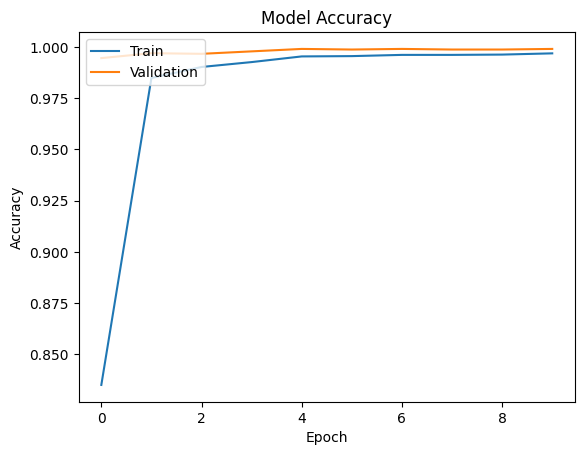

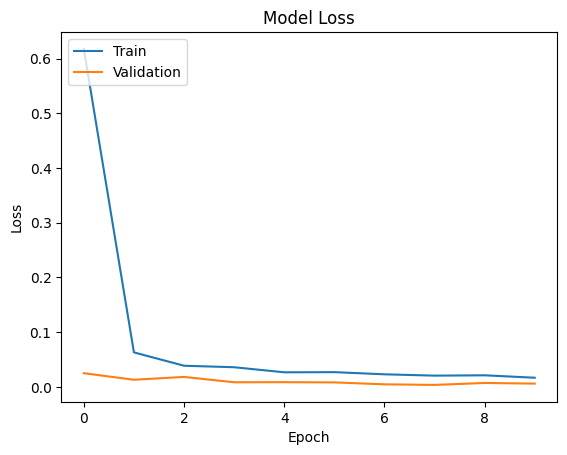

Test Loss: 0.02266097627580166
Test Accuracy: 0.99832683801651
225/225 [==============================] - 3s 14ms/step


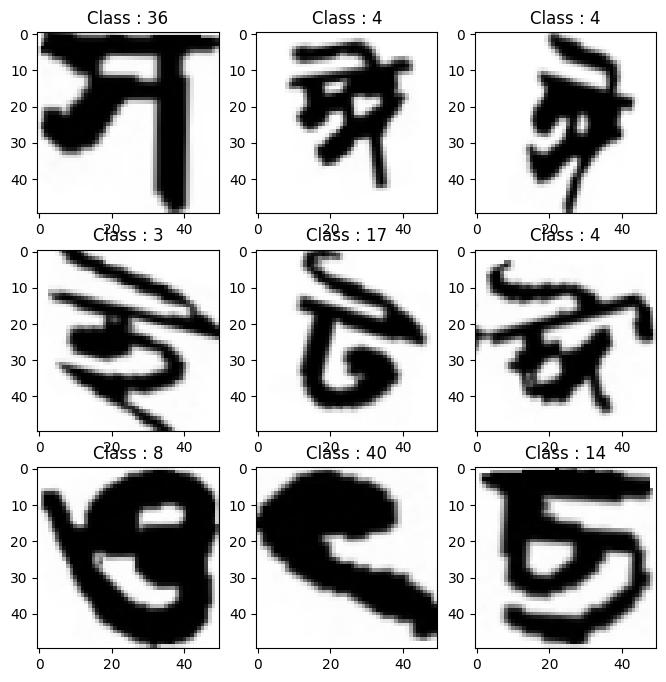

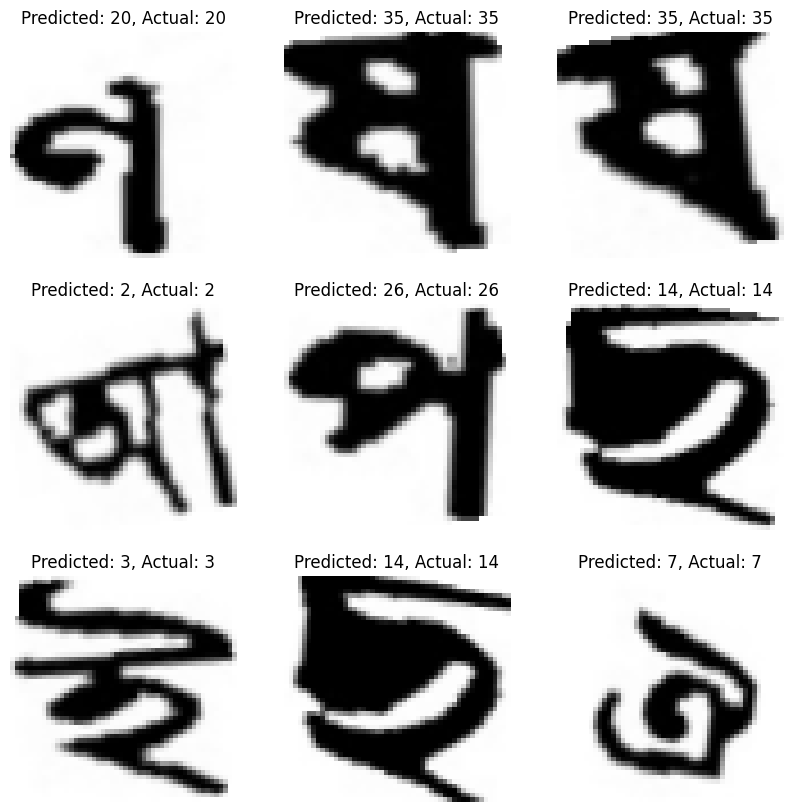

F1 Score: 0.9981764744042714


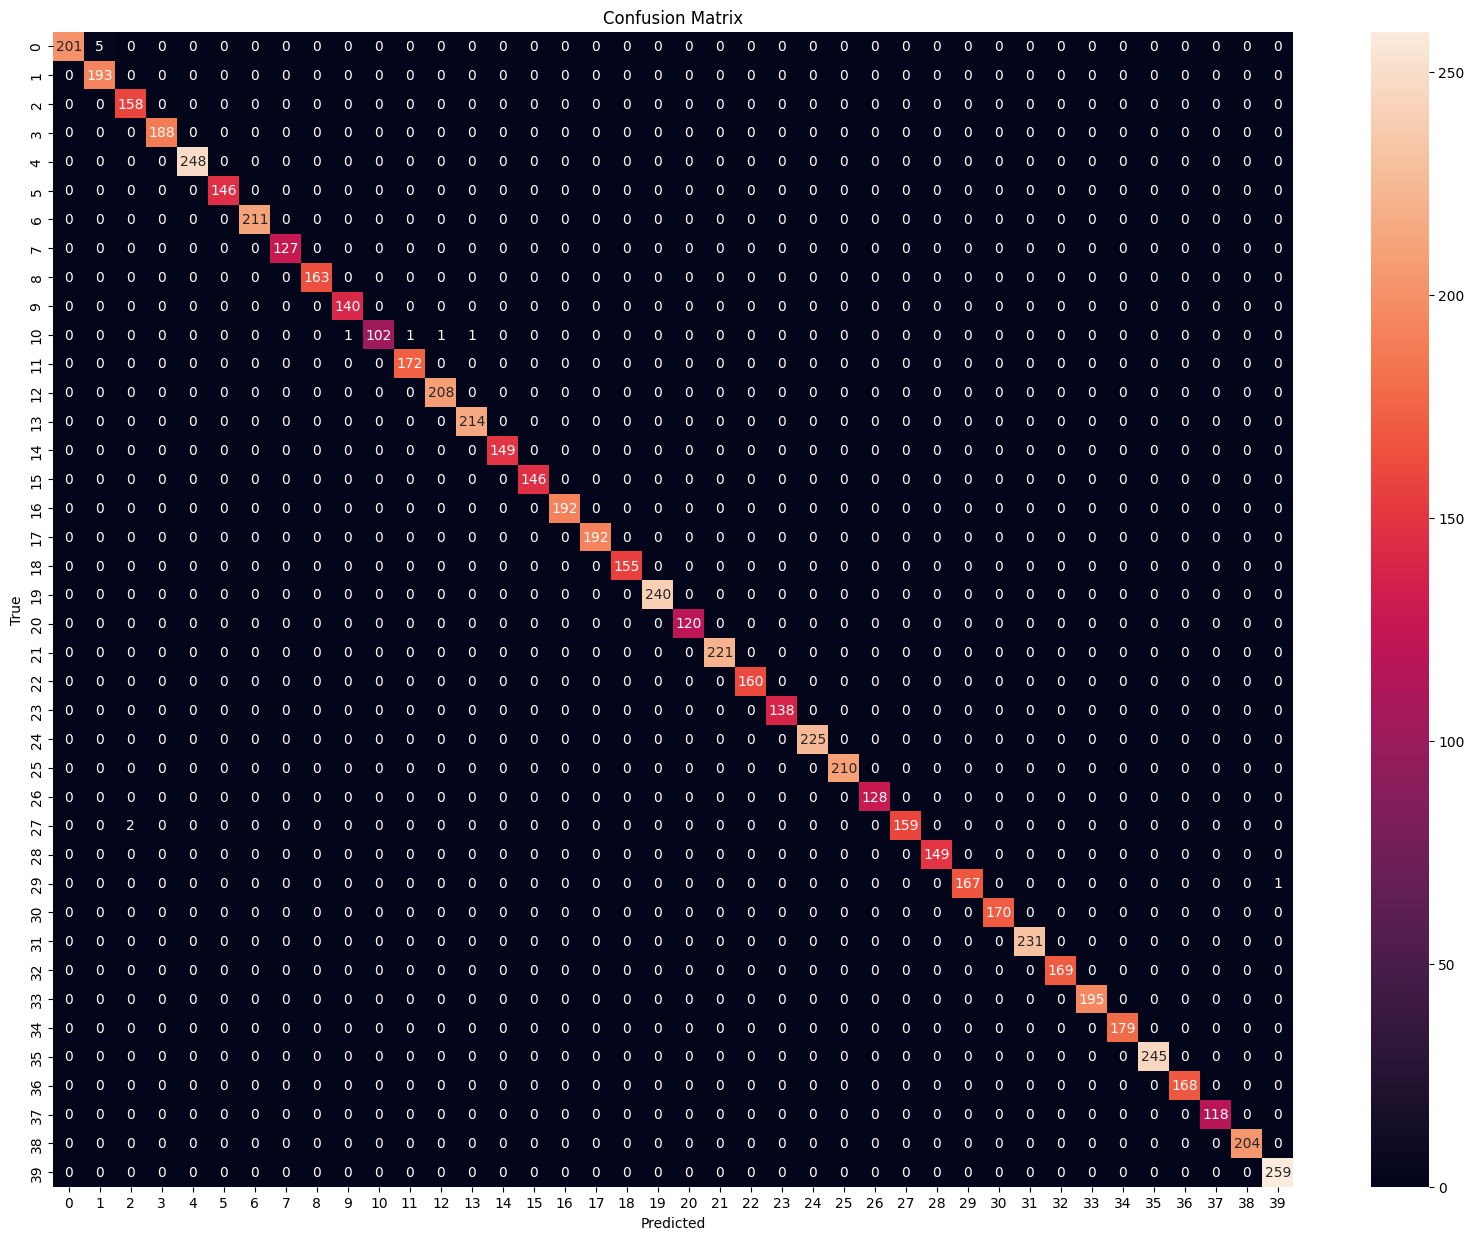

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      1.00      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       0.99      1.00      1.00       140
          11       1.00      0.96      0.98       106
          12       0.99      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

# Directory containing your dataset
dataset_dir = '/content/class40'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each class folder
for class_folder in os.listdir(dataset_dir):
    # Get the class label from the folder name
    label = int(class_folder)

    # Loop through each image in the class folder
    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        # Read the image
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        # Resize the image to 28x28 (assuming you want the same size as MNIST images)
        image = cv2.resize(image, (50, 50))
        # Normalize pixel values to be between 0 and 1
        image = image.astype('float32') / 255.0
        # Append the image and label to the lists
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Reshape the data for compatibility with CNN
x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

# One-hot encode the labels
num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# Train the model
batch_size = 16
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# Rmsprop 32

Epoch 1/10
419/419 [==============================] - 24s 56ms/step - loss: 0.7410 - accuracy: 0.8037 - val_loss: 0.0293 - val_accuracy: 0.9910
Epoch 2/10
419/419 [==============================] - 23s 54ms/step - loss: 0.0716 - accuracy: 0.9809 - val_loss: 0.0136 - val_accuracy: 0.9961
Epoch 3/10
419/419 [==============================] - 23s 55ms/step - loss: 0.0413 - accuracy: 0.9886 - val_loss: 0.0095 - val_accuracy: 0.9982
Epoch 4/10
419/419 [==============================] - 22s 53ms/step - loss: 0.0330 - accuracy: 0.9925 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 5/10
419/419 [==============================] - 21s 51ms/step - loss: 0.0212 - accuracy: 0.9950 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 6/10
419/419 [==============================] - 22s 52ms/step - loss: 0.0195 - accuracy: 0.9959 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 7/10
419/419 [==============================] - 22s 53ms/step - loss: 0.0183 - accuracy: 0.9964 - val_loss: 0.0029 - val_accuracy:

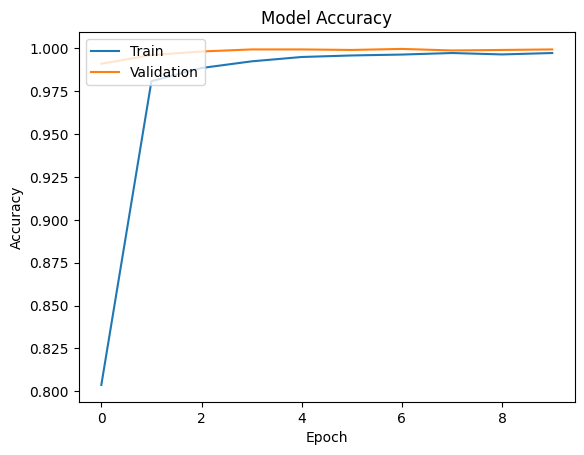

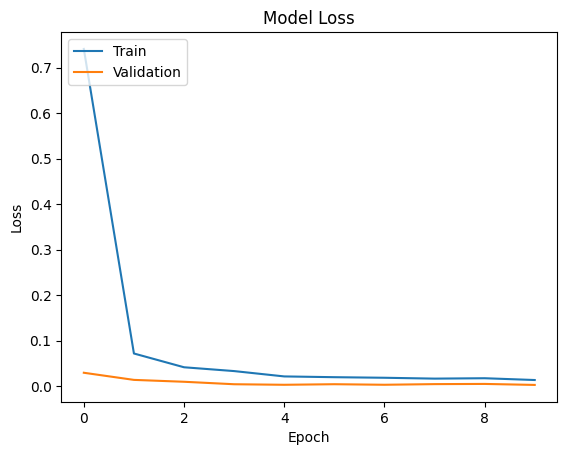

Test Loss: 0.011767441406846046
Test Accuracy: 0.9984662532806396
225/225 [==============================] - 3s 14ms/step


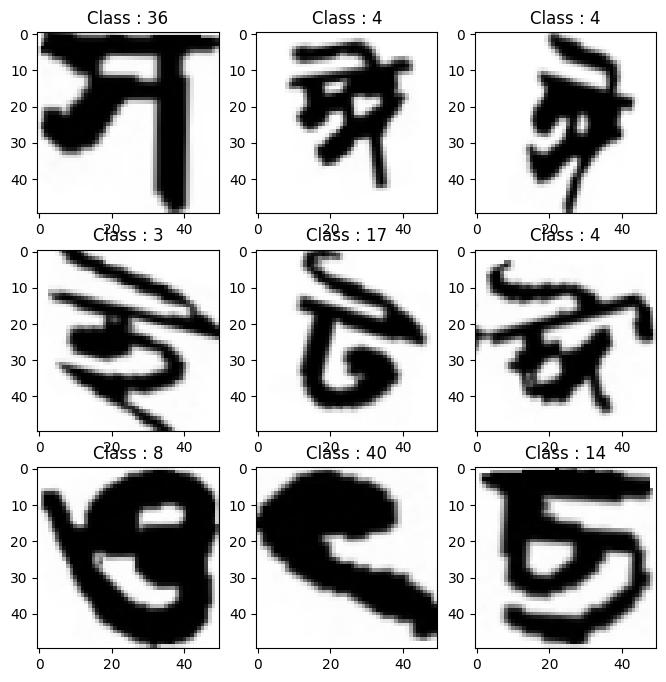

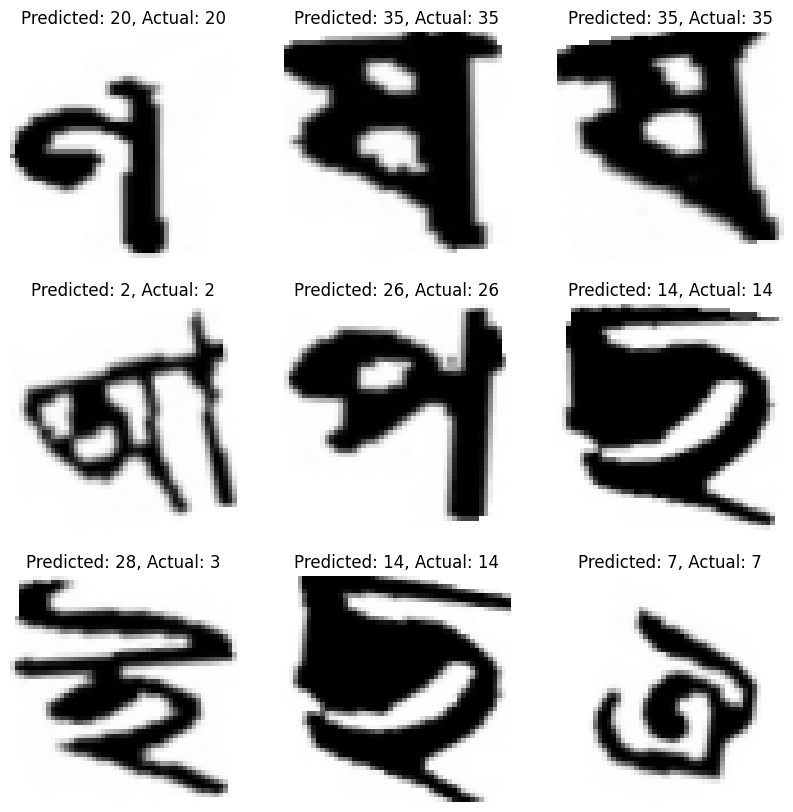

F1 Score: 0.9984748834968343


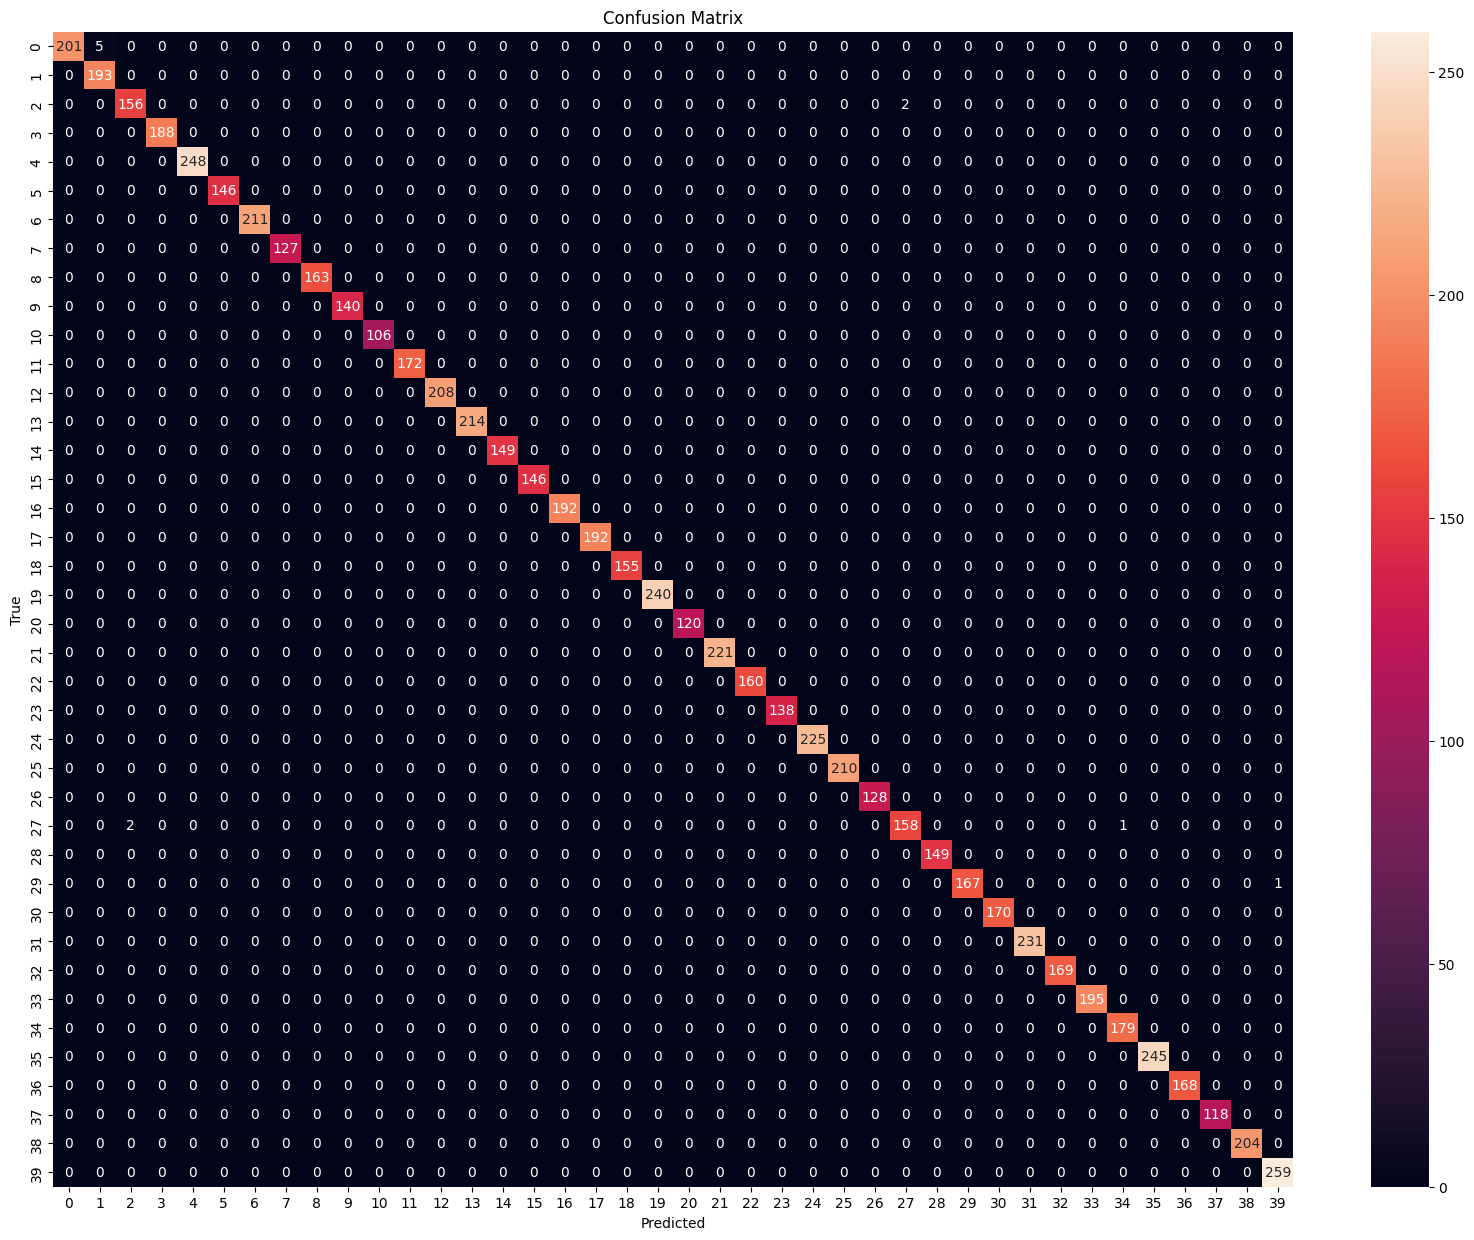

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      0.99      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       1.00      1.00      1.00       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

# Directory containing your dataset
dataset_dir = '/content/class40'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each class folder
for class_folder in os.listdir(dataset_dir):
    # Get the class label from the folder name
    label = int(class_folder)

    # Loop through each image in the class folder
    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        # Read the image
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        # Resize the image to 28x28 (assuming you want the same size as MNIST images)
        image = cv2.resize(image, (50, 50))
        # Normalize pixel values to be between 0 and 1
        image = image.astype('float32') / 255.0
        # Append the image and label to the lists
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Reshape the data for compatibility with CNN
x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

# One-hot encode the labels
num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# Rmsprop 64

Epoch 1/10
210/210 [==============================] - 20s 93ms/step - loss: 0.9823 - accuracy: 0.7348 - val_loss: 0.0496 - val_accuracy: 0.9872
Epoch 2/10
210/210 [==============================] - 19s 89ms/step - loss: 0.0985 - accuracy: 0.9733 - val_loss: 0.0107 - val_accuracy: 0.9979
Epoch 3/10
210/210 [==============================] - 20s 96ms/step - loss: 0.0506 - accuracy: 0.9880 - val_loss: 0.0062 - val_accuracy: 0.9988
Epoch 4/10
210/210 [==============================] - 18s 86ms/step - loss: 0.0342 - accuracy: 0.9926 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 5/10
210/210 [==============================] - 19s 89ms/step - loss: 0.0262 - accuracy: 0.9933 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 6/10
210/210 [==============================] - 18s 87ms/step - loss: 0.0229 - accuracy: 0.9943 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/10
210/210 [==============================] - 18s 86ms/step - loss: 0.0190 - accuracy: 0.9958 - val_loss: 0.0044 - val_accuracy:

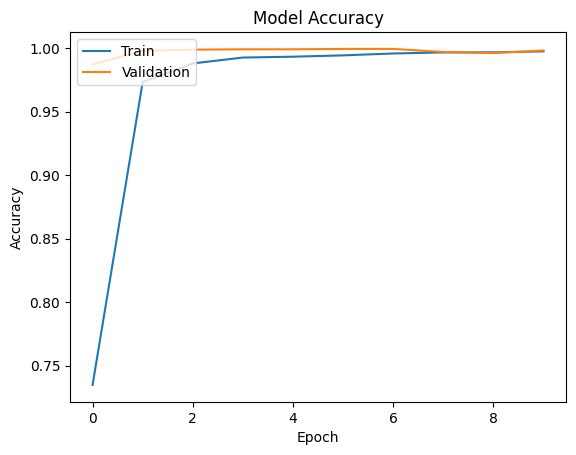

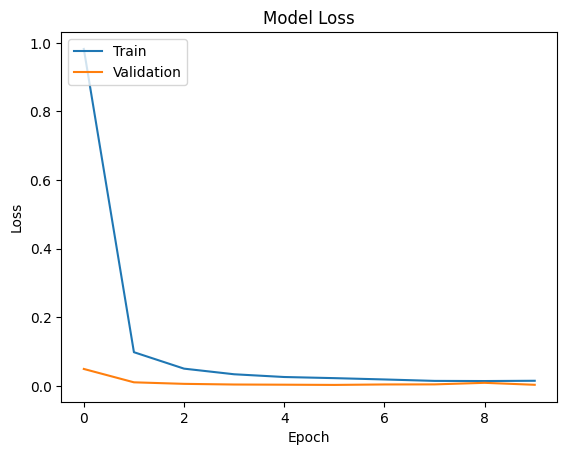

Test Loss: 0.015309867449104786
Test Accuracy: 0.9979085326194763
225/225 [==============================] - 3s 14ms/step


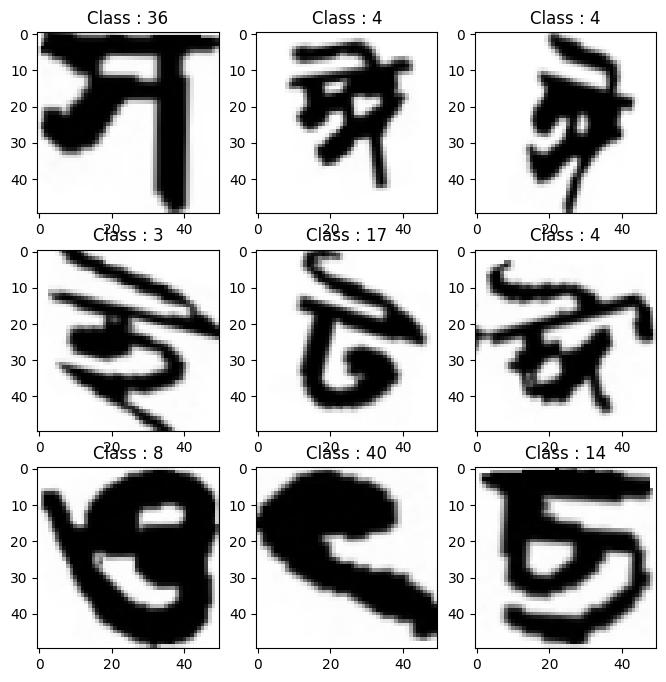

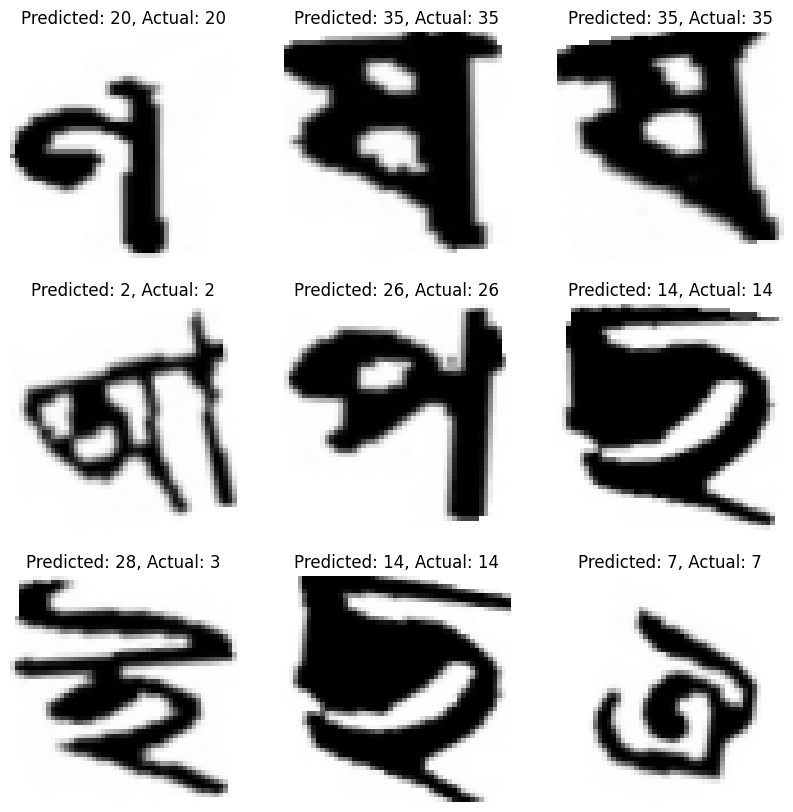

F1 Score: 0.997847413959392


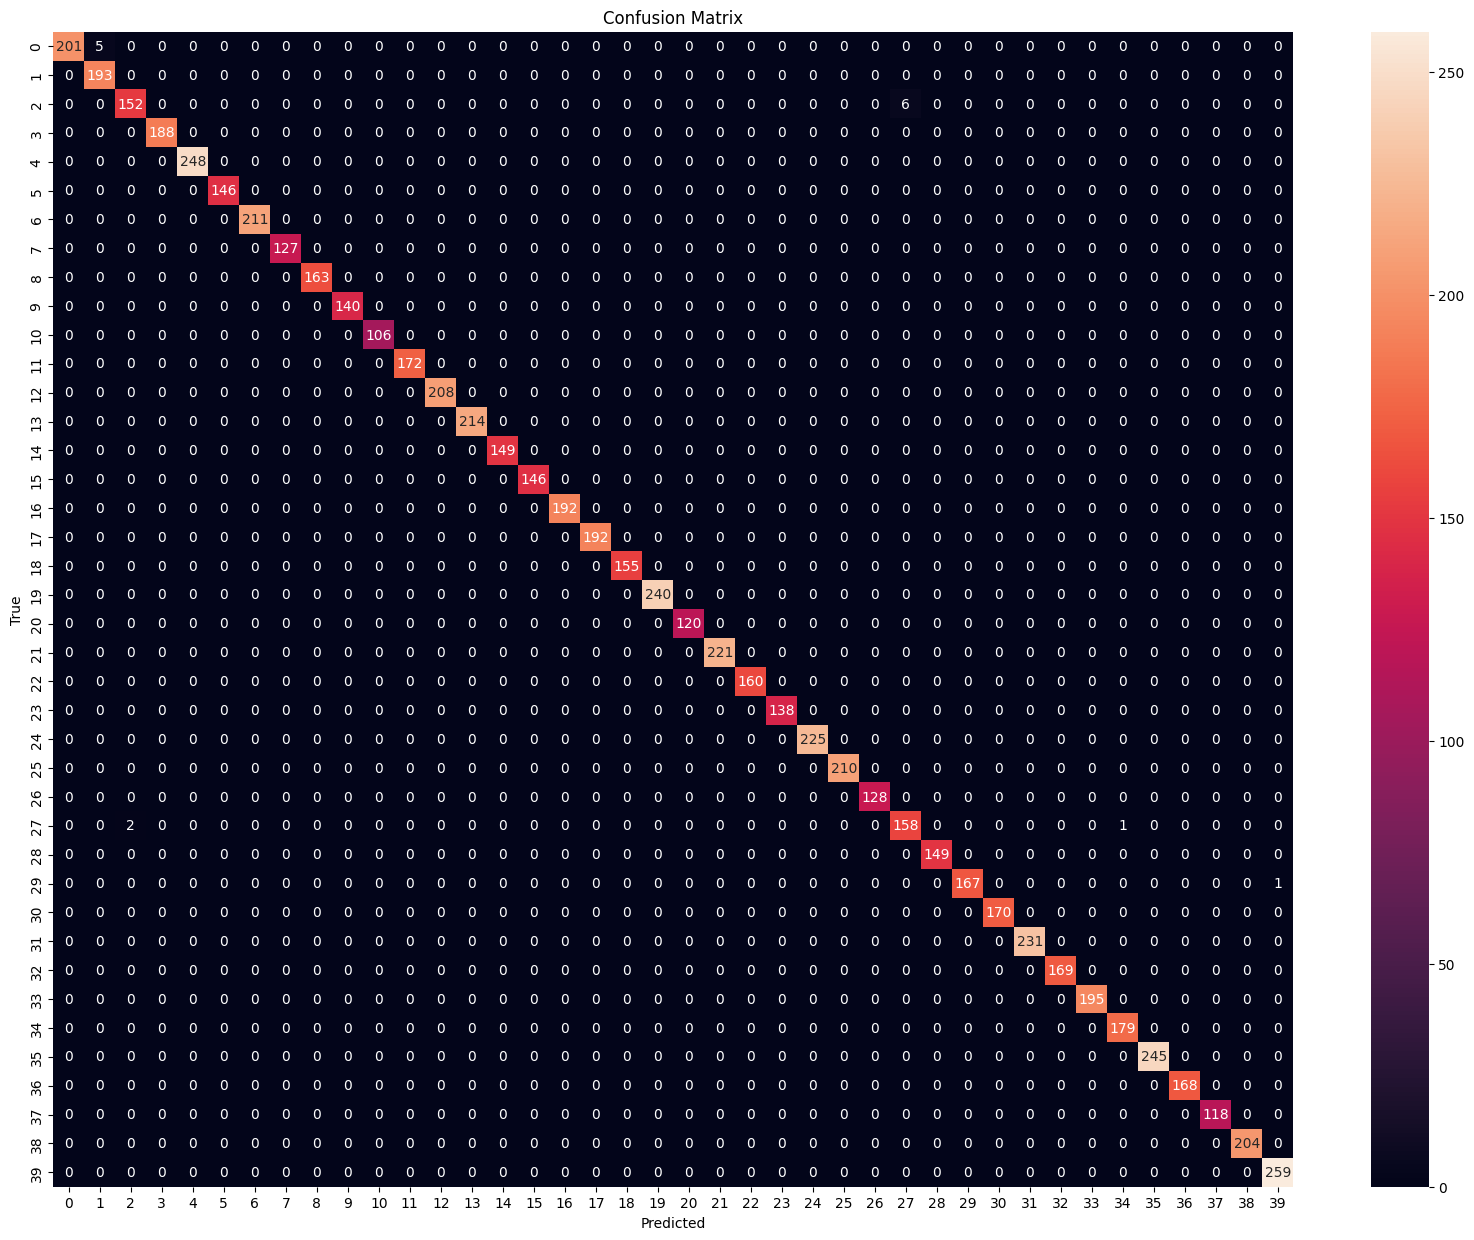

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      0.96      0.97       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       1.00      1.00      1.00       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

# Directory containing your dataset
dataset_dir = '/content/class40'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each class folder
for class_folder in os.listdir(dataset_dir):
    # Get the class label from the folder name
    label = int(class_folder)

    # Loop through each image in the class folder
    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        # Read the image
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        # Resize the image to 28x28 (assuming you want the same size as MNIST images)
        image = cv2.resize(image, (50, 50))
        # Normalize pixel values to be between 0 and 1
        image = image.astype('float32') / 255.0
        # Append the image and label to the lists
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Reshape the data for compatibility with CNN
x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

# One-hot encode the labels
num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)


# Rmsprop 128

Epoch 1/10
105/105 [==============================] - 18s 163ms/step - loss: 1.3836 - accuracy: 0.6385 - val_loss: 0.1116 - val_accuracy: 0.9674
Epoch 2/10
105/105 [==============================] - 17s 163ms/step - loss: 0.1337 - accuracy: 0.9639 - val_loss: 0.0236 - val_accuracy: 0.9946
Epoch 3/10
105/105 [==============================] - 18s 176ms/step - loss: 0.0587 - accuracy: 0.9839 - val_loss: 0.0269 - val_accuracy: 0.9904
Epoch 4/10
105/105 [==============================] - 18s 172ms/step - loss: 0.0390 - accuracy: 0.9892 - val_loss: 0.0076 - val_accuracy: 0.9982
Epoch 5/10
105/105 [==============================] - 17s 160ms/step - loss: 0.0263 - accuracy: 0.9936 - val_loss: 0.0052 - val_accuracy: 0.9991
Epoch 6/10
105/105 [==============================] - 17s 166ms/step - loss: 0.0256 - accuracy: 0.9939 - val_loss: 0.0069 - val_accuracy: 0.9967
Epoch 7/10
105/105 [==============================] - 18s 175ms/step - loss: 0.0191 - accuracy: 0.9955 - val_loss: 0.0102 - val_ac

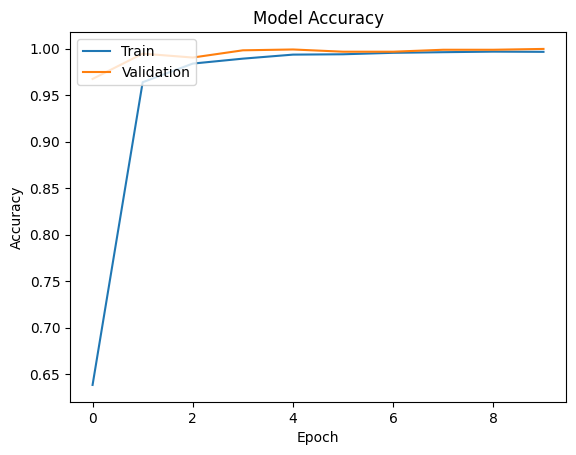

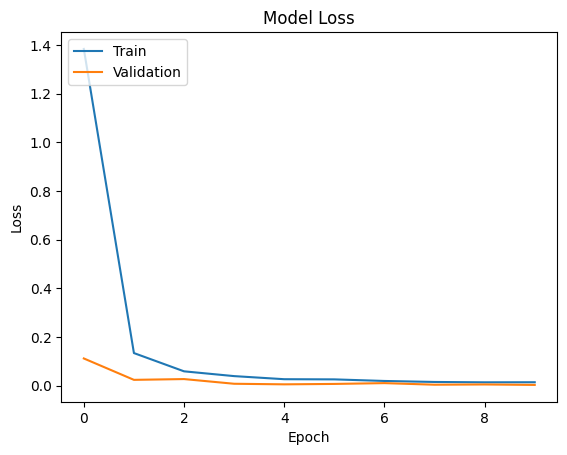

Test Loss: 0.012099848128855228
Test Accuracy: 0.9984662532806396
225/225 [==============================] - 3s 13ms/step


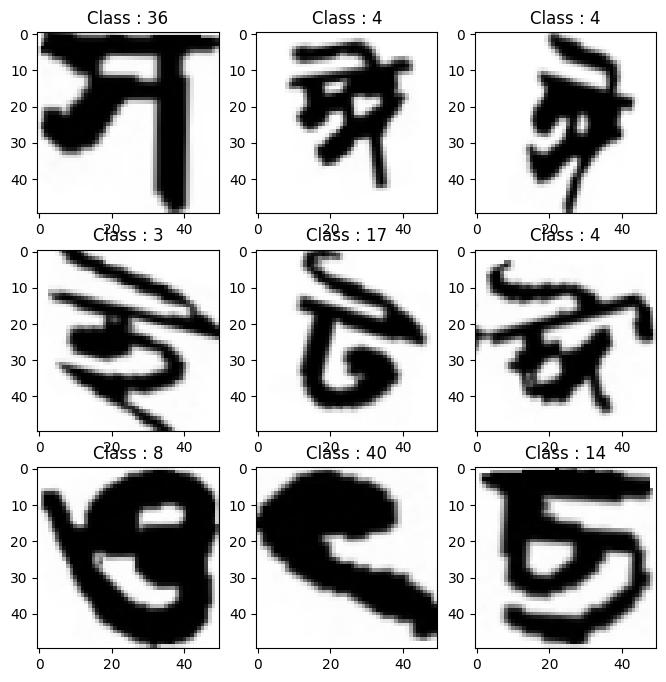

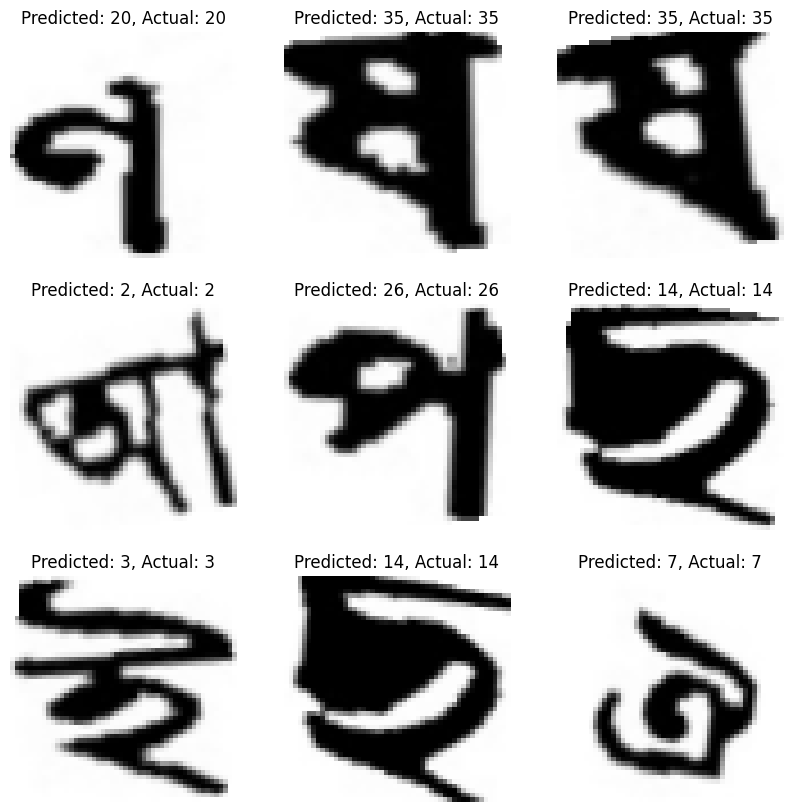

F1 Score: 0.9983434276339164


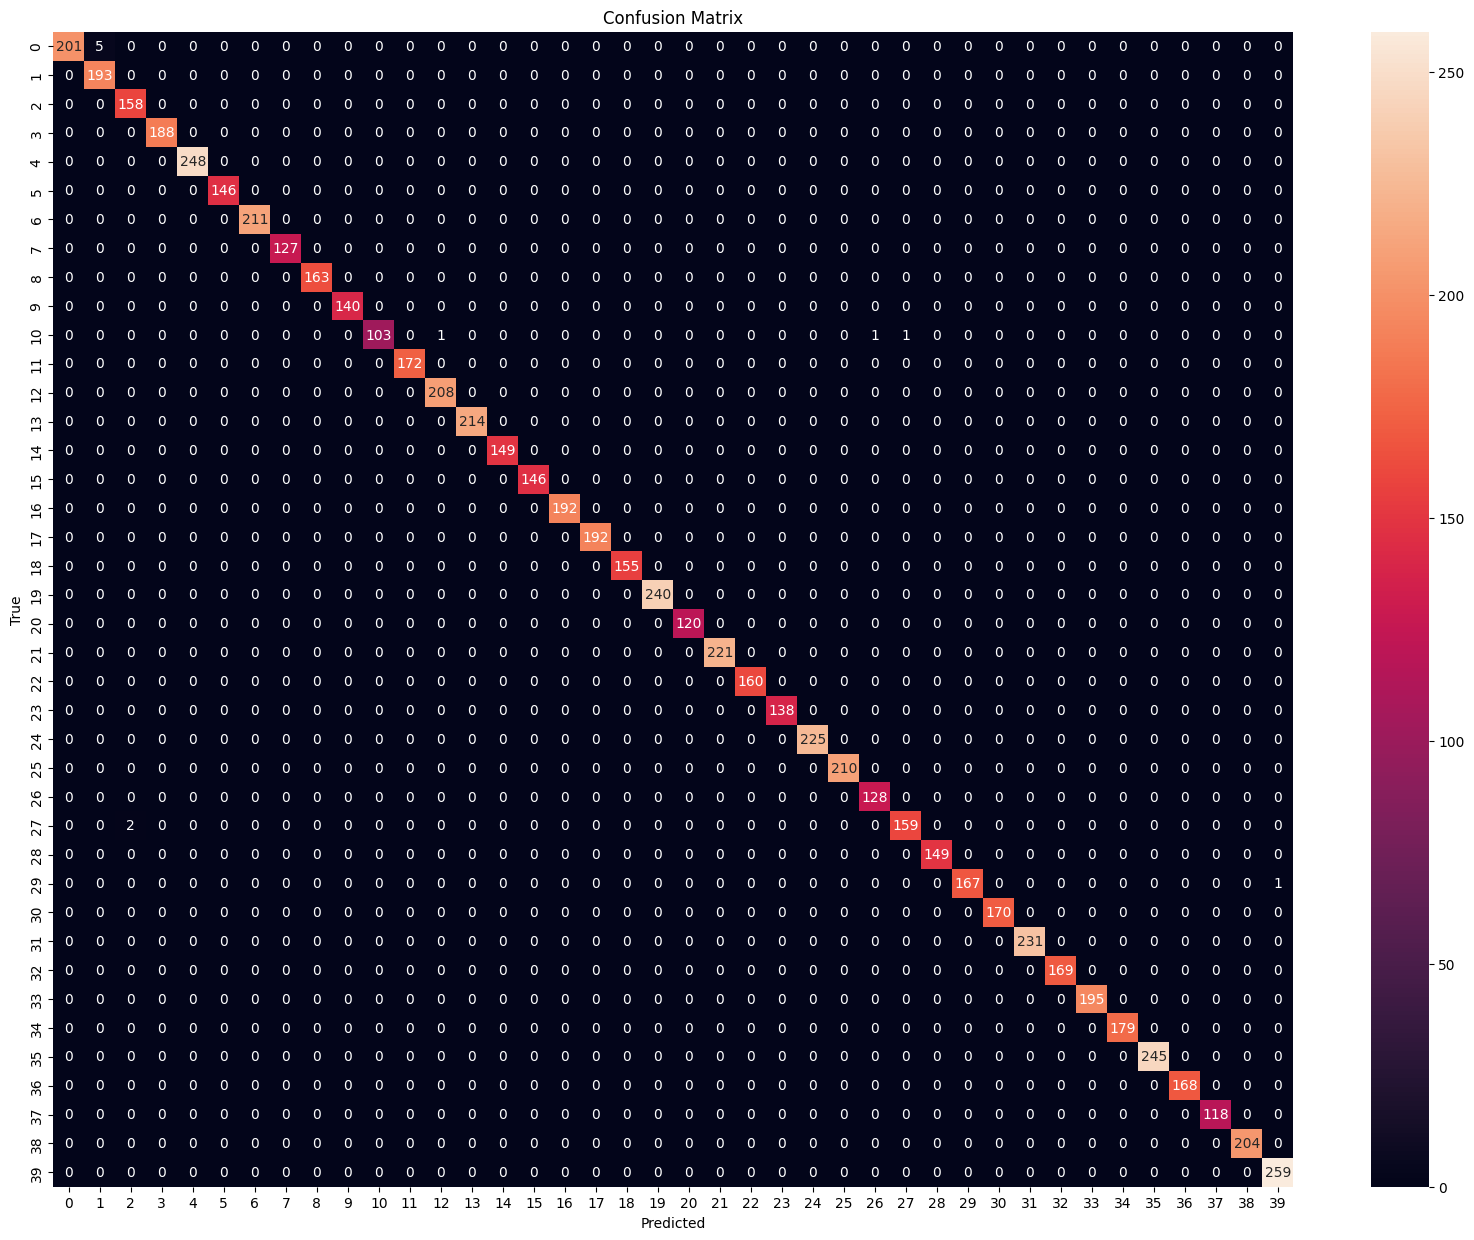

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       206
           2       0.97      1.00      0.99       193
           3       0.99      1.00      0.99       158
           4       1.00      1.00      1.00       188
           5       1.00      1.00      1.00       248
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       211
           8       1.00      1.00      1.00       127
           9       1.00      1.00      1.00       163
          10       1.00      1.00      1.00       140
          11       1.00      0.97      0.99       106
          12       1.00      1.00      1.00       172
          13       1.00      1.00      1.00       208
          14       1.00      1.00      1.00       214
          15       1.00      1.00      1.00       149
          16       1.00      1.00      1.00       146
          17       1.00      1.00      1.00       192
    

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

# Directory containing your dataset
dataset_dir = '/content/class40'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each class folder
for class_folder in os.listdir(dataset_dir):
    # Get the class label from the folder name
    label = int(class_folder)

    # Loop through each image in the class folder
    for image_name in os.listdir(os.path.join(dataset_dir, class_folder)):
        # Read the image
        image = cv2.imread(os.path.join(dataset_dir, class_folder, image_name), cv2.IMREAD_GRAYSCALE)
        # Resize the image to 28x28 (assuming you want the same size as MNIST images)
        image = cv2.resize(image, (50, 50))
        # Normalize pixel values to be between 0 and 1
        image = image.astype('float32') / 255.0
        # Append the image and label to the lists
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Reshape the data for compatibility with CNN
x_train = x_train.reshape(x_train.shape[0], 50, 50, 1)
x_test = x_test.reshape(x_test.shape[0], 50, 50, 1)

# One-hot encode the labels
num_classes = 41
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Model Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize sample images
plt.figure(figsize=[8, 8])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].reshape(50, 50), cmap='gray')
    plt.title("Class : {}".format(y_train[i]))
plt.show()

# Visualize actual vs predicted images
plt.figure(figsize=[10, 10])
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(50, 50), cmap='gray')
    plt.title("Predicted: {}, Actual: {}".format(predicted_classes[i], y_test[i]))
    plt.axis('off')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, predicted_classes, average='macro')
print("F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate classification report
report = classification_report(y_test, predicted_classes)

# Print classification report
print("Classification Report:")
print(report)
